In [87]:
import os
from archetypes import *
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [88]:
class ChemicalCase:
    def __init__(self, filename):
        self.filename = filename
        self.parse_file()

    def parse_file(self):
        with open(self.filename, 'r') as f:
            lines = f.readlines()
            for i, line in enumerate(lines):
                if line.startswith('Meteorological Fields'):
                    self.parse_meteorological_fields(lines[i+1:])
                elif line.startswith('Integrator-specific parameters'):
                    self.parse_integrator_specific_parameters(lines[i+1:])
                elif line.startswith('Chemical state'):
                    self.parse_chemical_state(lines[i+1:])

    def parse_meteorological_fields(self, lines):
        self.timestamp = lines[0].split('Timestamp:')[1].strip()
        self.longitude = float(lines[1].split(':')[1].strip())
        self.latitude = float(lines[2].split(':')[1].strip())
        self.level = int(lines[3].split(':')[1].strip())
        self.temperature = float(lines[4].split(':')[1].strip())
        self.pressure = float(lines[5].split(':')[1].strip())
        self.air_number_density = float(lines[6].split(':')[1].strip())
        self.average_water = float(lines[7].split(':')[1].strip())
        self.cloud_fraction = float(lines[8].split(':')[1].strip())
        self.cos_sza = float(lines[9].split(':')[1].strip())

    def parse_integrator_specific_parameters(self, lines):
        self.kpp_h_val = float(lines[0].split(':')[1].strip())
        self.internal_timesteps = int(float(lines[0-1].split(':')[1].strip()))
    
    def parse_chemical_state(self, lines):
        # obin: Based on Emy's code for parsing all values
        self.concentrations = []
        self.rate_constants = []
        self.reaction_rates = []
        for line in lines:
            if line.startswith(' C('):
                parts = line.split('=')
                value = float(parts[1].strip())
                self.concentrations.append(value)
            elif line.startswith(' R('):
                parts = line.split('=')
                value = float(parts[1].strip())
                self.rate_constants.append(value)
            elif line.startswith(' A('):
                parts = line.split('=')
                value = float(parts[1].strip())
                self.reaction_rates.append(value)

In [89]:
folder_path = 'samples/'

# Create a dictionary with filename as keys and concentrations as objects
data = {}
# List all files in the folder and subdirectories
for root, dirs, files in os.walk(folder_path):
    for file in files:
        print(os.path.join(root, file))
        chemical_case = ChemicalCase(os.path.join(root,file))
        concentrations = chemical_case.concentrations
        data[file] = concentrations

# Convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict(data, orient='index')

# Rename columns as C1, C2, ...C291
df.columns = ['C' + str(i + 1) for i in range(len(df.columns))]

# Set the filename as the index
df.index.name = 'filename'

samples/AmazonTwilight_L10_20180101_2215.txt
samples/AmazonTwilight_L10_20180101_2230.txt
samples/AmazonTwilight_L10_20180401_2130.txt
samples/AmazonTwilight_L10_20180402_1015.txt
samples/AmazonTwilight_L10_20180702_0945.txt
samples/AmazonTwilight_L1_20180101_2145.txt
samples/AmazonTwilight_L1_20180102_0930.txt
samples/AmazonTwilight_L1_20180102_1000.txt
samples/AmazonTwilight_L1_20180401_2145.txt
samples/AmazonTwilight_L1_20180401_2200.txt
samples/AmazonTwilight_L1_20180402_0945.txt
samples/AmazonTwilight_L1_20180702_1030.txt
samples/AmazonTwilight_L1_20180930_2230.txt
samples/AmazonTwilight_L1_20181001_0945.txt
samples/AmazonTwilight_L23_20180101_2200.txt
samples/AmazonTwilight_L23_20180102_0930.txt
samples/AmazonTwilight_L23_20180402_1030.txt
samples/AmazonTwilight_L23_20180701_2130.txt
samples/AmazonTwilight_L23_20180701_2215.txt
samples/AmazonTwilight_L23_20180701_2230.txt
samples/AmazonTwilight_L23_20180702_0945.txt
samples/AmazonTwilight_L23_20180702_1030.txt
samples/AmazonTwili

samples/Amazon_L23_20180402_0830.txt
samples/Amazon_L23_20180402_0845.txt
samples/Amazon_L23_20180402_1045.txt
samples/Amazon_L23_20180402_1100.txt
samples/Amazon_L23_20180402_1500.txt
samples/Amazon_L23_20180402_1515.txt
samples/Amazon_L23_20180402_1530.txt
samples/Amazon_L23_20180402_1630.txt
samples/Amazon_L23_20180402_1700.txt
samples/Amazon_L23_20180402_1745.txt
samples/Amazon_L23_20180402_1830.txt
samples/Amazon_L23_20180402_1915.txt
samples/Amazon_L23_20180701_2315.txt
samples/Amazon_L23_20180701_2345.txt
samples/Amazon_L23_20180702_0030.txt
samples/Amazon_L23_20180702_0100.txt
samples/Amazon_L23_20180702_0130.txt
samples/Amazon_L23_20180702_0215.txt
samples/Amazon_L23_20180702_0230.txt
samples/Amazon_L23_20180702_0245.txt
samples/Amazon_L23_20180702_0300.txt
samples/Amazon_L23_20180702_0400.txt
samples/Amazon_L23_20180702_0430.txt
samples/Amazon_L23_20180702_0515.txt
samples/Amazon_L23_20180702_0600.txt
samples/Amazon_L23_20180702_0815.txt
samples/Amazon_L23_20180702_0900.txt
s

samples/Amazon_L56_20180402_0015.txt
samples/Amazon_L56_20180402_0030.txt
samples/Amazon_L56_20180402_0145.txt
samples/Amazon_L56_20180402_0230.txt
samples/Amazon_L56_20180402_0245.txt
samples/Amazon_L56_20180402_0430.txt
samples/Amazon_L56_20180402_0445.txt
samples/Amazon_L56_20180402_0515.txt
samples/Amazon_L56_20180402_0545.txt
samples/Amazon_L56_20180402_0630.txt
samples/Amazon_L56_20180402_0745.txt
samples/Amazon_L56_20180402_1045.txt
samples/Amazon_L56_20180402_1215.txt
samples/Amazon_L56_20180402_1230.txt
samples/Amazon_L56_20180402_1245.txt
samples/Amazon_L56_20180402_1300.txt
samples/Amazon_L56_20180402_1400.txt
samples/Amazon_L56_20180402_1430.txt
samples/Amazon_L56_20180402_1545.txt
samples/Amazon_L56_20180402_1645.txt
samples/Amazon_L56_20180402_1900.txt
samples/Amazon_L56_20180402_1945.txt
samples/Amazon_L56_20180402_2000.txt
samples/Amazon_L56_20180402_2015.txt
samples/Amazon_L56_20180702_0000.txt
samples/Amazon_L56_20180702_0145.txt
samples/Amazon_L56_20180702_0215.txt
s

samples/AtlanticOcean_L10_20181001_0215.txt
samples/AtlanticOcean_L10_20181001_0300.txt
samples/AtlanticOcean_L10_20181001_0345.txt
samples/AtlanticOcean_L10_20181001_0415.txt
samples/AtlanticOcean_L10_20181001_0630.txt
samples/AtlanticOcean_L10_20181001_0645.txt
samples/AtlanticOcean_L10_20181001_0715.txt
samples/AtlanticOcean_L10_20181001_0930.txt
samples/AtlanticOcean_L10_20181001_0945.txt
samples/AtlanticOcean_L10_20181001_1000.txt
samples/AtlanticOcean_L10_20181001_1015.txt
samples/AtlanticOcean_L10_20181001_1030.txt
samples/AtlanticOcean_L10_20181001_1115.txt
samples/AtlanticOcean_L10_20181001_1245.txt
samples/AtlanticOcean_L10_20181001_1345.txt
samples/AtlanticOcean_L10_20181001_1400.txt
samples/AtlanticOcean_L10_20181001_1500.txt
samples/AtlanticOcean_L10_20181001_1530.txt
samples/AtlanticOcean_L10_20181001_1600.txt
samples/AtlanticOcean_L10_20181001_1615.txt
samples/AtlanticOcean_L10_20181001_1630.txt
samples/AtlanticOcean_L10_20181001_1645.txt
samples/AtlanticOcean_L10_201810

samples/AtlanticOcean_L35_20180102_0015.txt
samples/AtlanticOcean_L35_20180102_0345.txt
samples/AtlanticOcean_L35_20180102_0430.txt
samples/AtlanticOcean_L35_20180102_0530.txt
samples/AtlanticOcean_L35_20180102_0715.txt
samples/AtlanticOcean_L35_20180102_0745.txt
samples/AtlanticOcean_L35_20180102_0830.txt
samples/AtlanticOcean_L35_20180102_0900.txt
samples/AtlanticOcean_L35_20180102_1145.txt
samples/AtlanticOcean_L35_20180102_1230.txt
samples/AtlanticOcean_L35_20180102_1315.txt
samples/AtlanticOcean_L35_20180102_1330.txt
samples/AtlanticOcean_L35_20180102_1545.txt
samples/AtlanticOcean_L35_20180102_1700.txt
samples/AtlanticOcean_L35_20180401_2300.txt
samples/AtlanticOcean_L35_20180401_2315.txt
samples/AtlanticOcean_L35_20180402_0015.txt
samples/AtlanticOcean_L35_20180402_0030.txt
samples/AtlanticOcean_L35_20180402_0115.txt
samples/AtlanticOcean_L35_20180402_0145.txt
samples/AtlanticOcean_L35_20180402_0445.txt
samples/AtlanticOcean_L35_20180402_0515.txt
samples/AtlanticOcean_L35_201804

samples/AtlanticOcean_L56_20180702_1500.txt
samples/AtlanticOcean_L56_20180702_1815.txt
samples/AtlanticOcean_L56_20180702_1845.txt
samples/AtlanticOcean_L56_20180702_2000.txt
samples/AtlanticOcean_L56_20180930_2130.txt
samples/AtlanticOcean_L56_20180930_2315.txt
samples/AtlanticOcean_L56_20181001_0215.txt
samples/AtlanticOcean_L56_20181001_0300.txt
samples/AtlanticOcean_L56_20181001_0430.txt
samples/AtlanticOcean_L56_20181001_0545.txt
samples/AtlanticOcean_L56_20181001_0630.txt
samples/AtlanticOcean_L56_20181001_0715.txt
samples/AtlanticOcean_L56_20181001_1000.txt
samples/AtlanticOcean_L56_20181001_1100.txt
samples/AtlanticOcean_L56_20181001_1230.txt
samples/AtlanticOcean_L56_20181001_1245.txt
samples/AtlanticOcean_L56_20181001_1315.txt
samples/AtlanticOcean_L56_20181001_1330.txt
samples/AtlanticOcean_L56_20181001_1545.txt
samples/AtlanticOcean_L56_20181001_1630.txt
samples/AtlanticOcean_L56_20181001_1700.txt
samples/AtlanticOcean_L56_20181001_1800.txt
samples/AtlanticOcean_L56_201810

samples/Beijing_L1_20180102_1015.txt
samples/Beijing_L1_20180102_1430.txt
samples/Beijing_L1_20180102_1445.txt
samples/Beijing_L1_20180102_1630.txt
samples/Beijing_L1_20180102_1800.txt
samples/Beijing_L1_20180102_1845.txt
samples/Beijing_L1_20180102_1900.txt
samples/Beijing_L1_20180102_1930.txt
samples/Beijing_L1_20180102_1945.txt
samples/Beijing_L1_20180102_2015.txt
samples/Beijing_L1_20180401_2245.txt
samples/Beijing_L1_20180401_2315.txt
samples/Beijing_L1_20180401_2345.txt
samples/Beijing_L1_20180402_0115.txt
samples/Beijing_L1_20180402_0145.txt
samples/Beijing_L1_20180402_0300.txt
samples/Beijing_L1_20180402_0400.txt
samples/Beijing_L1_20180402_0745.txt
samples/Beijing_L1_20180402_0830.txt
samples/Beijing_L1_20180402_0900.txt
samples/Beijing_L1_20180402_1215.txt
samples/Beijing_L1_20180402_1315.txt
samples/Beijing_L1_20180402_1430.txt
samples/Beijing_L1_20180402_1515.txt
samples/Beijing_L1_20180402_1600.txt
samples/Beijing_L1_20180402_1630.txt
samples/Beijing_L1_20180402_1800.txt
s

samples/Beijing_L35_20181001_0215.txt
samples/Beijing_L35_20181001_0300.txt
samples/Beijing_L35_20181001_0345.txt
samples/Beijing_L35_20181001_0400.txt
samples/Beijing_L35_20181001_0415.txt
samples/Beijing_L35_20181001_0445.txt
samples/Beijing_L35_20181001_0515.txt
samples/Beijing_L35_20181001_0600.txt
samples/Beijing_L35_20181001_0645.txt
samples/Beijing_L35_20181001_0715.txt
samples/Beijing_L35_20181001_0745.txt
samples/Beijing_L35_20181001_1045.txt
samples/Beijing_L35_20181001_1100.txt
samples/Beijing_L35_20181001_1145.txt
samples/Beijing_L35_20181001_1300.txt
samples/Beijing_L35_20181001_1345.txt
samples/Beijing_L35_20181001_1530.txt
samples/Beijing_L35_20181001_1645.txt
samples/Beijing_L35_20181001_1715.txt
samples/Beijing_L35_20181001_1745.txt
samples/Beijing_L35_20181001_1800.txt
samples/Beijing_L35_20181001_1815.txt
samples/Beijing_L35_20181001_1930.txt
samples/Beijing_L35_20181001_2045.txt
samples/Beijing_L48_20180101_2100.txt
samples/Beijing_L48_20180101_2130.txt
samples/Beij

samples/BorneoTwilight_L35_20180402_1030.txt
samples/BorneoTwilight_L35_20180701_2200.txt
samples/BorneoTwilight_L35_20180702_0945.txt
samples/BorneoTwilight_L35_20180930_2230.txt
samples/BorneoTwilight_L35_20180930_2245.txt
samples/BorneoTwilight_L48_20180101_2200.txt
samples/BorneoTwilight_L48_20180101_2230.txt
samples/BorneoTwilight_L48_20180401_2200.txt
samples/BorneoTwilight_L48_20180402_1000.txt
samples/BorneoTwilight_L48_20180701_2200.txt
samples/BorneoTwilight_L48_20180702_1030.txt
samples/BorneoTwilight_L48_20180702_1045.txt
samples/BorneoTwilight_L48_20180930_2245.txt
samples/BorneoTwilight_L48_20181001_1000.txt
samples/BorneoTwilight_L48_20181001_1030.txt
samples/BorneoTwilight_L56_20180101_2200.txt
samples/BorneoTwilight_L56_20180102_1030.txt
samples/BorneoTwilight_L56_20180402_1000.txt
samples/BorneoTwilight_L56_20180701_2200.txt
samples/BorneoTwilight_L56_20180701_2215.txt
samples/BorneoTwilight_L56_20180702_1000.txt
samples/BorneoTwilight_L56_20180702_1045.txt
samples/Bo

samples/Borneo_L23_20180401_2145.txt
samples/Borneo_L23_20180401_2300.txt
samples/Borneo_L23_20180402_0030.txt
samples/Borneo_L23_20180402_0045.txt
samples/Borneo_L23_20180402_0100.txt
samples/Borneo_L23_20180402_0500.txt
samples/Borneo_L23_20180402_0515.txt
samples/Borneo_L23_20180402_0530.txt
samples/Borneo_L23_20180402_0545.txt
samples/Borneo_L23_20180402_0600.txt
samples/Borneo_L23_20180402_0700.txt
samples/Borneo_L23_20180402_0800.txt
samples/Borneo_L23_20180402_0930.txt
samples/Borneo_L23_20180402_1230.txt
samples/Borneo_L23_20180402_1300.txt
samples/Borneo_L23_20180402_1330.txt
samples/Borneo_L23_20180402_1345.txt
samples/Borneo_L23_20180402_1445.txt
samples/Borneo_L23_20180402_1530.txt
samples/Borneo_L23_20180402_1600.txt
samples/Borneo_L23_20180402_1630.txt
samples/Borneo_L23_20180402_1645.txt
samples/Borneo_L23_20180402_1730.txt
samples/Borneo_L23_20180402_1745.txt
samples/Borneo_L23_20180402_2045.txt
samples/Borneo_L23_20180701_2100.txt
samples/Borneo_L23_20180701_2145.txt
s

samples/Borneo_L48_20181001_0715.txt
samples/Borneo_L48_20181001_0800.txt
samples/Borneo_L48_20181001_0815.txt
samples/Borneo_L48_20181001_0900.txt
samples/Borneo_L48_20181001_1115.txt
samples/Borneo_L48_20181001_1130.txt
samples/Borneo_L48_20181001_1200.txt
samples/Borneo_L48_20181001_1215.txt
samples/Borneo_L48_20181001_1245.txt
samples/Borneo_L48_20181001_1300.txt
samples/Borneo_L48_20181001_1345.txt
samples/Borneo_L48_20181001_1430.txt
samples/Borneo_L48_20181001_1630.txt
samples/Borneo_L48_20181001_1730.txt
samples/Borneo_L48_20181001_1800.txt
samples/Borneo_L48_20181001_1815.txt
samples/Borneo_L48_20181001_1830.txt
samples/Borneo_L48_20181001_1900.txt
samples/Borneo_L48_20181001_1930.txt
samples/Borneo_L48_20181001_2045.txt
samples/Borneo_L56_20180101_2315.txt
samples/Borneo_L56_20180102_0045.txt
samples/Borneo_L56_20180102_0130.txt
samples/Borneo_L56_20180102_0145.txt
samples/Borneo_L56_20180102_0415.txt
samples/Borneo_L56_20180102_0530.txt
samples/Borneo_L56_20180102_0745.txt
s

samples/CapeGrim_L10_20180402_0030.txt
samples/CapeGrim_L10_20180402_0100.txt
samples/CapeGrim_L10_20180402_0145.txt
samples/CapeGrim_L10_20180402_0300.txt
samples/CapeGrim_L10_20180402_0415.txt
samples/CapeGrim_L10_20180402_0430.txt
samples/CapeGrim_L10_20180402_0445.txt
samples/CapeGrim_L10_20180402_0530.txt
samples/CapeGrim_L10_20180402_0615.txt
samples/CapeGrim_L10_20180402_0845.txt
samples/CapeGrim_L10_20180402_1030.txt
samples/CapeGrim_L10_20180402_1115.txt
samples/CapeGrim_L10_20180402_1315.txt
samples/CapeGrim_L10_20180402_1345.txt
samples/CapeGrim_L10_20180402_1515.txt
samples/CapeGrim_L10_20180402_1600.txt
samples/CapeGrim_L10_20180402_1815.txt
samples/CapeGrim_L10_20180701_2345.txt
samples/CapeGrim_L10_20180702_0015.txt
samples/CapeGrim_L10_20180702_0115.txt
samples/CapeGrim_L10_20180702_0200.txt
samples/CapeGrim_L10_20180702_0245.txt
samples/CapeGrim_L10_20180702_0300.txt
samples/CapeGrim_L10_20180702_0330.txt
samples/CapeGrim_L10_20180702_0345.txt
samples/CapeGrim_L10_2018

samples/CapeGrim_L23_20180702_1800.txt
samples/CapeGrim_L23_20180702_1900.txt
samples/CapeGrim_L23_20180702_1945.txt
samples/CapeGrim_L23_20180930_2315.txt
samples/CapeGrim_L23_20181001_0100.txt
samples/CapeGrim_L23_20181001_0345.txt
samples/CapeGrim_L23_20181001_0400.txt
samples/CapeGrim_L23_20181001_0430.txt
samples/CapeGrim_L23_20181001_0515.txt
samples/CapeGrim_L23_20181001_0530.txt
samples/CapeGrim_L23_20181001_0645.txt
samples/CapeGrim_L23_20181001_0715.txt
samples/CapeGrim_L23_20181001_0745.txt
samples/CapeGrim_L23_20181001_0930.txt
samples/CapeGrim_L23_20181001_1100.txt
samples/CapeGrim_L23_20181001_1200.txt
samples/CapeGrim_L23_20181001_1215.txt
samples/CapeGrim_L23_20181001_1315.txt
samples/CapeGrim_L23_20181001_1345.txt
samples/CapeGrim_L23_20181001_1415.txt
samples/CapeGrim_L23_20181001_1615.txt
samples/CapeGrim_L23_20181001_1730.txt
samples/CapeGrim_L23_20181001_1900.txt
samples/CapeGrim_L35_20180101_2130.txt
samples/CapeGrim_L35_20180101_2145.txt
samples/CapeGrim_L35_2018

samples/CapeGrim_L56_20180702_1245.txt
samples/CapeGrim_L56_20180702_1400.txt
samples/CapeGrim_L56_20180702_1415.txt
samples/CapeGrim_L56_20180702_1630.txt
samples/CapeGrim_L56_20180702_1645.txt
samples/CapeGrim_L56_20180702_1700.txt
samples/CapeGrim_L56_20180702_1915.txt
samples/CapeGrim_L56_20180702_1945.txt
samples/CapeGrim_L56_20180930_2200.txt
samples/CapeGrim_L56_20181001_0000.txt
samples/CapeGrim_L56_20181001_0045.txt
samples/CapeGrim_L56_20181001_0100.txt
samples/CapeGrim_L56_20181001_0145.txt
samples/CapeGrim_L56_20181001_0330.txt
samples/CapeGrim_L56_20181001_0345.txt
samples/CapeGrim_L56_20181001_0400.txt
samples/CapeGrim_L56_20181001_0430.txt
samples/CapeGrim_L56_20181001_0515.txt
samples/CapeGrim_L56_20181001_0615.txt
samples/CapeGrim_L56_20181001_0700.txt
samples/CapeGrim_L56_20181001_0745.txt
samples/CapeGrim_L56_20181001_0945.txt
samples/CapeGrim_L56_20181001_1000.txt
samples/CapeGrim_L56_20181001_1015.txt
samples/CapeGrim_L56_20181001_1115.txt
samples/CapeGrim_L56_2018

samples/Congo_L23_20180101_2230.txt
samples/Congo_L23_20180101_2245.txt
samples/Congo_L23_20180101_2315.txt
samples/Congo_L23_20180101_2330.txt
samples/Congo_L23_20180101_2345.txt
samples/Congo_L23_20180102_0015.txt
samples/Congo_L23_20180102_0100.txt
samples/Congo_L23_20180102_0245.txt
samples/Congo_L23_20180102_0300.txt
samples/Congo_L23_20180102_0315.txt
samples/Congo_L23_20180102_0645.txt
samples/Congo_L23_20180102_0730.txt
samples/Congo_L23_20180102_0745.txt
samples/Congo_L23_20180102_1030.txt
samples/Congo_L23_20180102_1045.txt
samples/Congo_L23_20180102_1115.txt
samples/Congo_L23_20180102_1315.txt
samples/Congo_L23_20180102_1515.txt
samples/Congo_L23_20180102_1545.txt
samples/Congo_L23_20180102_1600.txt
samples/Congo_L23_20180102_1745.txt
samples/Congo_L23_20180401_2215.txt
samples/Congo_L23_20180402_0015.txt
samples/Congo_L23_20180402_0200.txt
samples/Congo_L23_20180402_0215.txt
samples/Congo_L23_20180402_0230.txt
samples/Congo_L23_20180402_0330.txt
samples/Congo_L23_20180402_0

samples/Congo_L48_20180702_0030.txt
samples/Congo_L48_20180702_0045.txt
samples/Congo_L48_20180702_0100.txt
samples/Congo_L48_20180702_0115.txt
samples/Congo_L48_20180702_0215.txt
samples/Congo_L48_20180702_0315.txt
samples/Congo_L48_20180702_0330.txt
samples/Congo_L48_20180702_0545.txt
samples/Congo_L48_20180702_0630.txt
samples/Congo_L48_20180702_0745.txt
samples/Congo_L48_20180702_0815.txt
samples/Congo_L48_20180702_0915.txt
samples/Congo_L48_20180702_1000.txt
samples/Congo_L48_20180702_1130.txt
samples/Congo_L48_20180702_1200.txt
samples/Congo_L48_20180702_1245.txt
samples/Congo_L48_20180702_1300.txt
samples/Congo_L48_20180702_1345.txt
samples/Congo_L48_20180702_1400.txt
samples/Congo_L48_20180702_1415.txt
samples/Congo_L48_20180702_1430.txt
samples/Congo_L48_20180702_1445.txt
samples/Congo_L48_20180702_1545.txt
samples/Congo_L48_20180702_1845.txt
samples/Congo_L48_20180702_1930.txt
samples/Congo_L48_20180702_2015.txt
samples/Congo_L48_20180702_2045.txt
samples/Congo_L48_20180930_2

samples/ElDjouf_L10_20180702_0145.txt
samples/ElDjouf_L10_20180702_0345.txt
samples/ElDjouf_L10_20180702_0400.txt
samples/ElDjouf_L10_20180702_0800.txt
samples/ElDjouf_L10_20180702_0945.txt
samples/ElDjouf_L10_20180702_1030.txt
samples/ElDjouf_L10_20180702_1145.txt
samples/ElDjouf_L10_20180702_1300.txt
samples/ElDjouf_L10_20180702_1330.txt
samples/ElDjouf_L10_20180702_1415.txt
samples/ElDjouf_L10_20180702_1645.txt
samples/ElDjouf_L10_20180702_1815.txt
samples/ElDjouf_L10_20180702_2015.txt
samples/ElDjouf_L10_20180930_2100.txt
samples/ElDjouf_L10_20180930_2200.txt
samples/ElDjouf_L10_20180930_2245.txt
samples/ElDjouf_L10_20181001_0045.txt
samples/ElDjouf_L10_20181001_0100.txt
samples/ElDjouf_L10_20181001_0145.txt
samples/ElDjouf_L10_20181001_0215.txt
samples/ElDjouf_L10_20181001_0300.txt
samples/ElDjouf_L10_20181001_0345.txt
samples/ElDjouf_L10_20181001_0500.txt
samples/ElDjouf_L10_20181001_0515.txt
samples/ElDjouf_L10_20181001_0530.txt
samples/ElDjouf_L10_20181001_0800.txt
samples/ElDj

samples/ElDjouf_L35_20180102_0145.txt
samples/ElDjouf_L35_20180102_0200.txt
samples/ElDjouf_L35_20180102_0330.txt
samples/ElDjouf_L35_20180102_0515.txt
samples/ElDjouf_L35_20180102_0600.txt
samples/ElDjouf_L35_20180102_0615.txt
samples/ElDjouf_L35_20180102_0815.txt
samples/ElDjouf_L35_20180102_0845.txt
samples/ElDjouf_L35_20180102_0915.txt
samples/ElDjouf_L35_20180102_0930.txt
samples/ElDjouf_L35_20180102_0945.txt
samples/ElDjouf_L35_20180102_1130.txt
samples/ElDjouf_L35_20180102_1215.txt
samples/ElDjouf_L35_20180102_1300.txt
samples/ElDjouf_L35_20180102_1400.txt
samples/ElDjouf_L35_20180102_1530.txt
samples/ElDjouf_L35_20180102_1545.txt
samples/ElDjouf_L35_20180102_1600.txt
samples/ElDjouf_L35_20180102_1900.txt
samples/ElDjouf_L35_20180401_2100.txt
samples/ElDjouf_L35_20180401_2115.txt
samples/ElDjouf_L35_20180401_2130.txt
samples/ElDjouf_L35_20180401_2215.txt
samples/ElDjouf_L35_20180401_2300.txt
samples/ElDjouf_L35_20180401_2315.txt
samples/ElDjouf_L35_20180402_0100.txt
samples/ElDj

samples/ElDjouf_L56_20180702_1300.txt
samples/ElDjouf_L56_20180702_1330.txt
samples/ElDjouf_L56_20180702_1500.txt
samples/ElDjouf_L56_20180702_1515.txt
samples/ElDjouf_L56_20180702_1530.txt
samples/ElDjouf_L56_20180702_1645.txt
samples/ElDjouf_L56_20180702_1730.txt
samples/ElDjouf_L56_20180702_2000.txt
samples/ElDjouf_L56_20180702_2015.txt
samples/ElDjouf_L56_20180930_2115.txt
samples/ElDjouf_L56_20180930_2130.txt
samples/ElDjouf_L56_20180930_2145.txt
samples/ElDjouf_L56_20180930_2245.txt
samples/ElDjouf_L56_20181001_0200.txt
samples/ElDjouf_L56_20181001_0215.txt
samples/ElDjouf_L56_20181001_0330.txt
samples/ElDjouf_L56_20181001_0400.txt
samples/ElDjouf_L56_20181001_0430.txt
samples/ElDjouf_L56_20181001_0445.txt
samples/ElDjouf_L56_20181001_0500.txt
samples/ElDjouf_L56_20181001_0530.txt
samples/ElDjouf_L56_20181001_0545.txt
samples/ElDjouf_L56_20181001_0745.txt
samples/ElDjouf_L56_20181001_0815.txt
samples/ElDjouf_L56_20181001_0945.txt
samples/ElDjouf_L56_20181001_1000.txt
samples/ElDj

samples/Graciosa_L1_20180102_1145.txt
samples/Graciosa_L1_20180102_1200.txt
samples/Graciosa_L1_20180102_1230.txt
samples/Graciosa_L1_20180102_1245.txt
samples/Graciosa_L1_20180102_1400.txt
samples/Graciosa_L1_20180102_1445.txt
samples/Graciosa_L1_20180102_1500.txt
samples/Graciosa_L1_20180102_1615.txt
samples/Graciosa_L1_20180102_1715.txt
samples/Graciosa_L1_20180401_2100.txt
samples/Graciosa_L1_20180402_0015.txt
samples/Graciosa_L1_20180402_0045.txt
samples/Graciosa_L1_20180402_0100.txt
samples/Graciosa_L1_20180402_0130.txt
samples/Graciosa_L1_20180402_0145.txt
samples/Graciosa_L1_20180402_0215.txt
samples/Graciosa_L1_20180402_0330.txt
samples/Graciosa_L1_20180402_0445.txt
samples/Graciosa_L1_20180402_0545.txt
samples/Graciosa_L1_20180402_0600.txt
samples/Graciosa_L1_20180402_0615.txt
samples/Graciosa_L1_20180402_0830.txt
samples/Graciosa_L1_20180402_0845.txt
samples/Graciosa_L1_20180402_0915.txt
samples/Graciosa_L1_20180402_1000.txt
samples/Graciosa_L1_20180402_1115.txt
samples/Grac

samples/Graciosa_L35_20180702_1645.txt
samples/Graciosa_L35_20180702_1730.txt
samples/Graciosa_L35_20180702_1830.txt
samples/Graciosa_L35_20180702_1915.txt
samples/Graciosa_L35_20180702_1930.txt
samples/Graciosa_L35_20180702_1945.txt
samples/Graciosa_L35_20180930_2130.txt
samples/Graciosa_L35_20180930_2145.txt
samples/Graciosa_L35_20180930_2200.txt
samples/Graciosa_L35_20180930_2215.txt
samples/Graciosa_L35_20180930_2345.txt
samples/Graciosa_L35_20181001_0130.txt
samples/Graciosa_L35_20181001_0215.txt
samples/Graciosa_L35_20181001_0300.txt
samples/Graciosa_L35_20181001_0415.txt
samples/Graciosa_L35_20181001_0915.txt
samples/Graciosa_L35_20181001_0945.txt
samples/Graciosa_L35_20181001_1100.txt
samples/Graciosa_L35_20181001_1115.txt
samples/Graciosa_L35_20181001_1130.txt
samples/Graciosa_L35_20181001_1215.txt
samples/Graciosa_L35_20181001_1245.txt
samples/Graciosa_L35_20181001_1300.txt
samples/Graciosa_L35_20181001_1315.txt
samples/Graciosa_L35_20181001_1330.txt
samples/Graciosa_L35_2018

samples/IndianOceanTwilight_L35_20180101_2345.txt
samples/IndianOceanTwilight_L35_20180102_1215.txt
samples/IndianOceanTwilight_L35_20180102_1245.txt
samples/IndianOceanTwilight_L35_20180401_2345.txt
samples/IndianOceanTwilight_L35_20180402_0015.txt
samples/IndianOceanTwilight_L35_20180402_1200.txt
samples/IndianOceanTwilight_L35_20180402_1215.txt
samples/IndianOceanTwilight_L35_20180702_0015.txt
samples/IndianOceanTwilight_L35_20180702_1115.txt
samples/IndianOceanTwilight_L35_20180930_2345.txt
samples/IndianOceanTwilight_L35_20181001_0000.txt
samples/IndianOceanTwilight_L35_20181001_1215.txt
samples/IndianOceanTwilight_L48_20180101_2300.txt
samples/IndianOceanTwilight_L48_20180402_0045.txt
samples/IndianOceanTwilight_L48_20180402_1130.txt
samples/IndianOceanTwilight_L48_20180402_1145.txt
samples/IndianOceanTwilight_L48_20180402_1200.txt
samples/IndianOceanTwilight_L48_20180402_1215.txt
samples/IndianOceanTwilight_L48_20180402_1230.txt
samples/IndianOceanTwilight_L48_20180702_0100.txt


samples/IndianOcean_L23_20180101_2130.txt
samples/IndianOcean_L23_20180101_2145.txt
samples/IndianOcean_L23_20180101_2200.txt
samples/IndianOcean_L23_20180101_2215.txt
samples/IndianOcean_L23_20180102_0015.txt
samples/IndianOcean_L23_20180102_0130.txt
samples/IndianOcean_L23_20180102_0230.txt
samples/IndianOcean_L23_20180102_0415.txt
samples/IndianOcean_L23_20180102_0530.txt
samples/IndianOcean_L23_20180102_0800.txt
samples/IndianOcean_L23_20180102_0830.txt
samples/IndianOcean_L23_20180102_0930.txt
samples/IndianOcean_L23_20180102_0945.txt
samples/IndianOcean_L23_20180102_1000.txt
samples/IndianOcean_L23_20180102_1145.txt
samples/IndianOcean_L23_20180102_1345.txt
samples/IndianOcean_L23_20180102_1430.txt
samples/IndianOcean_L23_20180102_1545.txt
samples/IndianOcean_L23_20180102_2015.txt
samples/IndianOcean_L23_20180102_2045.txt
samples/IndianOcean_L23_20180401_2115.txt
samples/IndianOcean_L23_20180401_2215.txt
samples/IndianOcean_L23_20180402_0130.txt
samples/IndianOcean_L23_20180402_0

samples/IndianOcean_L48_20180402_0445.txt
samples/IndianOcean_L48_20180402_0515.txt
samples/IndianOcean_L48_20180402_0745.txt
samples/IndianOcean_L48_20180402_1015.txt
samples/IndianOcean_L48_20180402_1030.txt
samples/IndianOcean_L48_20180402_1045.txt
samples/IndianOcean_L48_20180402_1300.txt
samples/IndianOcean_L48_20180402_1515.txt
samples/IndianOcean_L48_20180402_1530.txt
samples/IndianOcean_L48_20180402_1630.txt
samples/IndianOcean_L48_20180402_1845.txt
samples/IndianOcean_L48_20180402_1915.txt
samples/IndianOcean_L48_20180402_2045.txt
samples/IndianOcean_L48_20180701_2230.txt
samples/IndianOcean_L48_20180701_2245.txt
samples/IndianOcean_L48_20180701_2300.txt
samples/IndianOcean_L48_20180702_0145.txt
samples/IndianOcean_L48_20180702_0230.txt
samples/IndianOcean_L48_20180702_0315.txt
samples/IndianOcean_L48_20180702_0345.txt
samples/IndianOcean_L48_20180702_0400.txt
samples/IndianOcean_L48_20180702_0445.txt
samples/IndianOcean_L48_20180702_0500.txt
samples/IndianOcean_L48_20180702_0

samples/Kinshasa_L10_20180102_1745.txt
samples/Kinshasa_L10_20180102_1845.txt
samples/Kinshasa_L10_20180102_2000.txt
samples/Kinshasa_L10_20180401_2115.txt
samples/Kinshasa_L10_20180401_2215.txt
samples/Kinshasa_L10_20180401_2330.txt
samples/Kinshasa_L10_20180402_0015.txt
samples/Kinshasa_L10_20180402_0200.txt
samples/Kinshasa_L10_20180402_0215.txt
samples/Kinshasa_L10_20180402_0345.txt
samples/Kinshasa_L10_20180402_0715.txt
samples/Kinshasa_L10_20180402_0945.txt
samples/Kinshasa_L10_20180402_1130.txt
samples/Kinshasa_L10_20180402_1145.txt
samples/Kinshasa_L10_20180402_1200.txt
samples/Kinshasa_L10_20180402_1330.txt
samples/Kinshasa_L10_20180402_1515.txt
samples/Kinshasa_L10_20180402_1600.txt
samples/Kinshasa_L10_20180402_1615.txt
samples/Kinshasa_L10_20180402_1830.txt
samples/Kinshasa_L10_20180701_2345.txt
samples/Kinshasa_L10_20180702_0015.txt
samples/Kinshasa_L10_20180702_0030.txt
samples/Kinshasa_L10_20180702_0230.txt
samples/Kinshasa_L10_20180702_0330.txt
samples/Kinshasa_L10_2018

samples/Kinshasa_L35_20180102_1515.txt
samples/Kinshasa_L35_20180102_1800.txt
samples/Kinshasa_L35_20180102_1845.txt
samples/Kinshasa_L35_20180102_1930.txt
samples/Kinshasa_L35_20180102_1945.txt
samples/Kinshasa_L35_20180102_2000.txt
samples/Kinshasa_L35_20180102_2045.txt
samples/Kinshasa_L35_20180402_0015.txt
samples/Kinshasa_L35_20180402_0230.txt
samples/Kinshasa_L35_20180402_0315.txt
samples/Kinshasa_L35_20180402_0345.txt
samples/Kinshasa_L35_20180402_0400.txt
samples/Kinshasa_L35_20180402_0530.txt
samples/Kinshasa_L35_20180402_0600.txt
samples/Kinshasa_L35_20180402_0730.txt
samples/Kinshasa_L35_20180402_0745.txt
samples/Kinshasa_L35_20180402_0800.txt
samples/Kinshasa_L35_20180402_1100.txt
samples/Kinshasa_L35_20180402_1115.txt
samples/Kinshasa_L35_20180402_1315.txt
samples/Kinshasa_L35_20180402_1345.txt
samples/Kinshasa_L35_20180402_1615.txt
samples/Kinshasa_L35_20180402_1815.txt
samples/Kinshasa_L35_20180402_1845.txt
samples/Kinshasa_L35_20180402_1900.txt
samples/Kinshasa_L35_2018

samples/Kinshasa_L56_20180702_0130.txt
samples/Kinshasa_L56_20180702_0215.txt
samples/Kinshasa_L56_20180702_0315.txt
samples/Kinshasa_L56_20180702_0615.txt
samples/Kinshasa_L56_20180702_0800.txt
samples/Kinshasa_L56_20180702_0915.txt
samples/Kinshasa_L56_20180702_0945.txt
samples/Kinshasa_L56_20180702_1100.txt
samples/Kinshasa_L56_20180702_1145.txt
samples/Kinshasa_L56_20180702_1330.txt
samples/Kinshasa_L56_20180702_1345.txt
samples/Kinshasa_L56_20180702_1400.txt
samples/Kinshasa_L56_20180702_1500.txt
samples/Kinshasa_L56_20180702_1515.txt
samples/Kinshasa_L56_20180702_1530.txt
samples/Kinshasa_L56_20180702_1815.txt
samples/Kinshasa_L56_20180702_1845.txt
samples/Kinshasa_L56_20180702_1915.txt
samples/Kinshasa_L56_20180702_2030.txt
samples/Kinshasa_L56_20180930_2130.txt
samples/Kinshasa_L56_20180930_2230.txt
samples/Kinshasa_L56_20181001_0015.txt
samples/Kinshasa_L56_20181001_0200.txt
samples/Kinshasa_L56_20181001_0215.txt
samples/Kinshasa_L56_20181001_0530.txt
samples/Kinshasa_L56_2018

samples/LosAngeles_L10_20180702_1100.txt
samples/LosAngeles_L10_20180702_1130.txt
samples/LosAngeles_L10_20180702_1330.txt
samples/LosAngeles_L10_20180702_1430.txt
samples/LosAngeles_L10_20180702_1530.txt
samples/LosAngeles_L10_20180702_1615.txt
samples/LosAngeles_L10_20180702_1630.txt
samples/LosAngeles_L10_20180702_1745.txt
samples/LosAngeles_L10_20180702_1845.txt
samples/LosAngeles_L10_20180930_2315.txt
samples/LosAngeles_L10_20180930_2330.txt
samples/LosAngeles_L10_20180930_2345.txt
samples/LosAngeles_L10_20181001_0000.txt
samples/LosAngeles_L10_20181001_0400.txt
samples/LosAngeles_L10_20181001_0430.txt
samples/LosAngeles_L10_20181001_0500.txt
samples/LosAngeles_L10_20181001_0545.txt
samples/LosAngeles_L10_20181001_0645.txt
samples/LosAngeles_L10_20181001_0915.txt
samples/LosAngeles_L10_20181001_1545.txt
samples/LosAngeles_L10_20181001_1600.txt
samples/LosAngeles_L10_20181001_1700.txt
samples/LosAngeles_L10_20181001_1745.txt
samples/LosAngeles_L10_20181001_1830.txt
samples/LosAngel

samples/LosAngeles_L35_20180102_1130.txt
samples/LosAngeles_L35_20180102_1200.txt
samples/LosAngeles_L35_20180102_1315.txt
samples/LosAngeles_L35_20180102_1345.txt
samples/LosAngeles_L35_20180102_1830.txt
samples/LosAngeles_L35_20180102_1915.txt
samples/LosAngeles_L35_20180401_2245.txt
samples/LosAngeles_L35_20180402_0030.txt
samples/LosAngeles_L35_20180402_0115.txt
samples/LosAngeles_L35_20180402_0315.txt
samples/LosAngeles_L35_20180402_0330.txt
samples/LosAngeles_L35_20180402_0400.txt
samples/LosAngeles_L35_20180402_0500.txt
samples/LosAngeles_L35_20180402_0515.txt
samples/LosAngeles_L35_20180402_0645.txt
samples/LosAngeles_L35_20180402_0700.txt
samples/LosAngeles_L35_20180402_0915.txt
samples/LosAngeles_L35_20180402_0945.txt
samples/LosAngeles_L35_20180402_1015.txt
samples/LosAngeles_L35_20180402_1030.txt
samples/LosAngeles_L35_20180402_1045.txt
samples/LosAngeles_L35_20180402_1115.txt
samples/LosAngeles_L35_20180402_1130.txt
samples/LosAngeles_L35_20180402_1145.txt
samples/LosAngel

samples/LosAngeles_L56_20181001_2000.txt
samples/McMurdoTwilight_L10_20180401_2230.txt
samples/McMurdoTwilight_L10_20180401_2245.txt
samples/McMurdoTwilight_L10_20180401_2315.txt
samples/McMurdoTwilight_L10_20180401_2330.txt
samples/McMurdoTwilight_L10_20180402_0130.txt
samples/McMurdoTwilight_L10_20180402_0215.txt
samples/McMurdoTwilight_L10_20180402_0415.txt
samples/McMurdoTwilight_L10_20180402_0430.txt
samples/McMurdoTwilight_L10_20180402_0445.txt
samples/McMurdoTwilight_L10_20180402_0615.txt
samples/McMurdoTwilight_L10_20180402_0715.txt
samples/McMurdoTwilight_L10_20180402_0745.txt
samples/McMurdoTwilight_L10_20180402_1830.txt
samples/McMurdoTwilight_L10_20180402_1915.txt
samples/McMurdoTwilight_L10_20180402_1945.txt
samples/McMurdoTwilight_L10_20180402_2015.txt
samples/McMurdoTwilight_L10_20180402_2045.txt
samples/McMurdoTwilight_L10_20181001_0515.txt
samples/McMurdoTwilight_L10_20181001_0530.txt
samples/McMurdoTwilight_L10_20181001_0630.txt
samples/McMurdoTwilight_L10_20181001_07

samples/McMurdo_L10_20180402_1115.txt
samples/McMurdo_L10_20180402_1130.txt
samples/McMurdo_L10_20180402_1215.txt
samples/McMurdo_L10_20180402_1300.txt
samples/McMurdo_L10_20180402_1415.txt
samples/McMurdo_L10_20180402_1430.txt
samples/McMurdo_L10_20180402_1445.txt
samples/McMurdo_L10_20180402_1500.txt
samples/McMurdo_L10_20180402_1515.txt
samples/McMurdo_L10_20180402_1530.txt
samples/McMurdo_L10_20180402_1615.txt
samples/McMurdo_L10_20180701_2100.txt
samples/McMurdo_L10_20180701_2130.txt
samples/McMurdo_L10_20180701_2315.txt
samples/McMurdo_L10_20180701_2345.txt
samples/McMurdo_L10_20180702_0045.txt
samples/McMurdo_L10_20180702_0300.txt
samples/McMurdo_L10_20180702_0500.txt
samples/McMurdo_L10_20180702_0515.txt
samples/McMurdo_L10_20180702_0630.txt
samples/McMurdo_L10_20180702_0715.txt
samples/McMurdo_L10_20180702_0745.txt
samples/McMurdo_L10_20180702_0930.txt
samples/McMurdo_L10_20180702_1000.txt
samples/McMurdo_L10_20180702_1030.txt
samples/McMurdo_L10_20180702_1200.txt
samples/McMu

samples/McMurdo_L48_20180102_0045.txt
samples/McMurdo_L48_20180102_0130.txt
samples/McMurdo_L48_20180102_0215.txt
samples/McMurdo_L48_20180102_0245.txt
samples/McMurdo_L48_20180102_0300.txt
samples/McMurdo_L48_20180102_0330.txt
samples/McMurdo_L48_20180102_0345.txt
samples/McMurdo_L48_20180102_0415.txt
samples/McMurdo_L48_20180102_0445.txt
samples/McMurdo_L48_20180102_0545.txt
samples/McMurdo_L48_20180102_0600.txt
samples/McMurdo_L48_20180102_0630.txt
samples/McMurdo_L48_20180102_0715.txt
samples/McMurdo_L48_20180102_0730.txt
samples/McMurdo_L48_20180102_0815.txt
samples/McMurdo_L48_20180102_0900.txt
samples/McMurdo_L48_20180102_0915.txt
samples/McMurdo_L48_20180102_0945.txt
samples/McMurdo_L48_20180102_1015.txt
samples/McMurdo_L48_20180102_1215.txt
samples/McMurdo_L48_20180102_1415.txt
samples/McMurdo_L48_20180102_1430.txt
samples/McMurdo_L48_20180102_1600.txt
samples/McMurdo_L48_20180102_1730.txt
samples/McMurdo_L48_20180102_1900.txt
samples/McMurdo_L48_20180102_1945.txt
samples/McMu

samples/Ozarks_L10_20180402_1830.txt
samples/Ozarks_L10_20180402_2045.txt
samples/Ozarks_L10_20180701_2115.txt
samples/Ozarks_L10_20180701_2145.txt
samples/Ozarks_L10_20180701_2200.txt
samples/Ozarks_L10_20180701_2215.txt
samples/Ozarks_L10_20180701_2245.txt
samples/Ozarks_L10_20180702_0315.txt
samples/Ozarks_L10_20180702_0345.txt
samples/Ozarks_L10_20180702_0445.txt
samples/Ozarks_L10_20180702_0500.txt
samples/Ozarks_L10_20180702_0515.txt
samples/Ozarks_L10_20180702_0600.txt
samples/Ozarks_L10_20180702_0615.txt
samples/Ozarks_L10_20180702_0730.txt
samples/Ozarks_L10_20180702_0745.txt
samples/Ozarks_L10_20180702_0830.txt
samples/Ozarks_L10_20180702_0845.txt
samples/Ozarks_L10_20180702_0945.txt
samples/Ozarks_L10_20180702_1130.txt
samples/Ozarks_L10_20180702_1145.txt
samples/Ozarks_L10_20180702_1215.txt
samples/Ozarks_L10_20180702_1445.txt
samples/Ozarks_L10_20180702_1530.txt
samples/Ozarks_L10_20180702_1615.txt
samples/Ozarks_L10_20180702_1630.txt
samples/Ozarks_L10_20180702_1645.txt
s

samples/Ozarks_L35_20180701_2330.txt
samples/Ozarks_L35_20180702_0315.txt
samples/Ozarks_L35_20180702_0415.txt
samples/Ozarks_L35_20180702_0445.txt
samples/Ozarks_L35_20180702_0600.txt
samples/Ozarks_L35_20180702_0630.txt
samples/Ozarks_L35_20180702_0645.txt
samples/Ozarks_L35_20180702_0715.txt
samples/Ozarks_L35_20180702_0800.txt
samples/Ozarks_L35_20180702_0815.txt
samples/Ozarks_L35_20180702_0830.txt
samples/Ozarks_L35_20180702_0945.txt
samples/Ozarks_L35_20180702_1130.txt
samples/Ozarks_L35_20180702_1230.txt
samples/Ozarks_L35_20180702_1400.txt
samples/Ozarks_L35_20180702_1445.txt
samples/Ozarks_L35_20180702_1500.txt
samples/Ozarks_L35_20180702_1615.txt
samples/Ozarks_L35_20180702_1645.txt
samples/Ozarks_L35_20180702_1715.txt
samples/Ozarks_L35_20180702_1800.txt
samples/Ozarks_L35_20180702_1815.txt
samples/Ozarks_L35_20180702_1900.txt
samples/Ozarks_L35_20180702_1945.txt
samples/Ozarks_L35_20180702_2015.txt
samples/Ozarks_L35_20180930_2115.txt
samples/Ozarks_L35_20180930_2130.txt
s

samples/PacificOceanTwilight_L23_20180702_1330.txt
samples/PacificOceanTwilight_L23_20181001_1330.txt
samples/PacificOceanTwilight_L23_20181001_1415.txt
samples/PacificOceanTwilight_L35_20180102_0130.txt
samples/PacificOceanTwilight_L35_20180102_0145.txt
samples/PacificOceanTwilight_L35_20180102_0200.txt
samples/PacificOceanTwilight_L35_20180102_1415.txt
samples/PacificOceanTwilight_L35_20180402_0215.txt
samples/PacificOceanTwilight_L35_20180702_0130.txt
samples/PacificOceanTwilight_L35_20180702_1430.txt
samples/PacificOceanTwilight_L35_20181001_0215.txt
samples/PacificOceanTwilight_L48_20180102_0215.txt
samples/PacificOceanTwilight_L48_20180102_1345.txt
samples/PacificOceanTwilight_L48_20180102_1415.txt
samples/PacificOceanTwilight_L48_20180402_1330.txt
samples/PacificOceanTwilight_L48_20180402_1415.txt
samples/PacificOceanTwilight_L48_20181001_0130.txt
samples/PacificOceanTwilight_L48_20181001_0215.txt
samples/PacificOceanTwilight_L48_20181001_1330.txt
samples/PacificOceanTwilight_L5

samples/PacificOcean_L1_20181001_1200.txt
samples/PacificOcean_L1_20181001_1800.txt
samples/PacificOcean_L1_20181001_1945.txt
samples/PacificOcean_L1_20181001_2015.txt
samples/PacificOcean_L23_20180101_2145.txt
samples/PacificOcean_L23_20180101_2315.txt
samples/PacificOcean_L23_20180101_2345.txt
samples/PacificOcean_L23_20180102_0015.txt
samples/PacificOcean_L23_20180102_0100.txt
samples/PacificOcean_L23_20180102_0115.txt
samples/PacificOcean_L23_20180102_0245.txt
samples/PacificOcean_L23_20180102_0300.txt
samples/PacificOcean_L23_20180102_0530.txt
samples/PacificOcean_L23_20180102_0615.txt
samples/PacificOcean_L23_20180102_0715.txt
samples/PacificOcean_L23_20180102_0730.txt
samples/PacificOcean_L23_20180102_0815.txt
samples/PacificOcean_L23_20180102_0845.txt
samples/PacificOcean_L23_20180102_1100.txt
samples/PacificOcean_L23_20180102_1230.txt
samples/PacificOcean_L23_20180102_1515.txt
samples/PacificOcean_L23_20180102_1615.txt
samples/PacificOcean_L23_20180102_1700.txt
samples/Pacific

samples/PacificOcean_L48_20180102_0600.txt
samples/PacificOcean_L48_20180102_0700.txt
samples/PacificOcean_L48_20180102_0800.txt
samples/PacificOcean_L48_20180102_0845.txt
samples/PacificOcean_L48_20180102_0900.txt
samples/PacificOcean_L48_20180102_0945.txt
samples/PacificOcean_L48_20180102_1000.txt
samples/PacificOcean_L48_20180102_1315.txt
samples/PacificOcean_L48_20180102_1530.txt
samples/PacificOcean_L48_20180102_1600.txt
samples/PacificOcean_L48_20180102_1645.txt
samples/PacificOcean_L48_20180102_1700.txt
samples/PacificOcean_L48_20180102_1715.txt
samples/PacificOcean_L48_20180102_1830.txt
samples/PacificOcean_L48_20180102_2000.txt
samples/PacificOcean_L48_20180102_2045.txt
samples/PacificOcean_L48_20180401_2130.txt
samples/PacificOcean_L48_20180401_2245.txt
samples/PacificOcean_L48_20180402_0030.txt
samples/PacificOcean_L48_20180402_0100.txt
samples/PacificOcean_L48_20180402_0230.txt
samples/PacificOcean_L48_20180402_0345.txt
samples/PacificOcean_L48_20180402_0500.txt
samples/Pac

samples/ParisTwilight_L10_20181001_0645.txt
samples/ParisTwilight_L10_20181001_1715.txt
samples/ParisTwilight_L10_20181001_1745.txt
samples/ParisTwilight_L10_20181001_1815.txt
samples/ParisTwilight_L1_20180102_0645.txt
samples/ParisTwilight_L1_20180102_0730.txt
samples/ParisTwilight_L1_20180102_1500.txt
samples/ParisTwilight_L1_20180102_1530.txt
samples/ParisTwilight_L1_20180102_1630.txt
samples/ParisTwilight_L1_20180402_0445.txt
samples/ParisTwilight_L1_20180402_0500.txt
samples/ParisTwilight_L1_20180402_1815.txt
samples/ParisTwilight_L1_20180402_1830.txt
samples/ParisTwilight_L1_20180702_0245.txt
samples/ParisTwilight_L1_20180702_0300.txt
samples/ParisTwilight_L1_20180702_0400.txt
samples/ParisTwilight_L1_20180702_1915.txt
samples/ParisTwilight_L1_20180702_2045.txt
samples/ParisTwilight_L1_20181001_0515.txt
samples/ParisTwilight_L1_20181001_0615.txt
samples/ParisTwilight_L1_20181001_1800.txt
samples/ParisTwilight_L23_20180102_0700.txt
samples/ParisTwilight_L23_20180102_0730.txt
sampl

samples/Paris_L23_20180101_2300.txt
samples/Paris_L23_20180102_0015.txt
samples/Paris_L23_20180102_0130.txt
samples/Paris_L23_20180102_0245.txt
samples/Paris_L23_20180102_0515.txt
samples/Paris_L23_20180102_0615.txt
samples/Paris_L23_20180102_0900.txt
samples/Paris_L23_20180102_0915.txt
samples/Paris_L23_20180102_1015.txt
samples/Paris_L23_20180102_1230.txt
samples/Paris_L23_20180102_1300.txt
samples/Paris_L23_20180102_1345.txt
samples/Paris_L23_20180102_1415.txt
samples/Paris_L23_20180102_1430.txt
samples/Paris_L23_20180102_1700.txt
samples/Paris_L23_20180102_1830.txt
samples/Paris_L23_20180102_1915.txt
samples/Paris_L23_20180401_2100.txt
samples/Paris_L23_20180401_2130.txt
samples/Paris_L23_20180401_2330.txt
samples/Paris_L23_20180402_0045.txt
samples/Paris_L23_20180402_0215.txt
samples/Paris_L23_20180402_0245.txt
samples/Paris_L23_20180402_0315.txt
samples/Paris_L23_20180402_0330.txt
samples/Paris_L23_20180402_0345.txt
samples/Paris_L23_20180402_0615.txt
samples/Paris_L23_20180402_0

samples/Paris_L48_20181001_0915.txt
samples/Paris_L48_20181001_1000.txt
samples/Paris_L48_20181001_1045.txt
samples/Paris_L48_20181001_1115.txt
samples/Paris_L48_20181001_1130.txt
samples/Paris_L48_20181001_1200.txt
samples/Paris_L48_20181001_1215.txt
samples/Paris_L48_20181001_1345.txt
samples/Paris_L48_20181001_1400.txt
samples/Paris_L48_20181001_1415.txt
samples/Paris_L48_20181001_1500.txt
samples/Paris_L48_20181001_1515.txt
samples/Paris_L48_20181001_1600.txt
samples/Paris_L48_20181001_1930.txt
samples/Paris_L48_20181001_2030.txt
samples/Paris_L56_20180101_2200.txt
samples/Paris_L56_20180102_0015.txt
samples/Paris_L56_20180102_0330.txt
samples/Paris_L56_20180102_0430.txt
samples/Paris_L56_20180102_0445.txt
samples/Paris_L56_20180102_0530.txt
samples/Paris_L56_20180102_0615.txt
samples/Paris_L56_20180102_0945.txt
samples/Paris_L56_20180102_1000.txt
samples/Paris_L56_20180102_1045.txt
samples/Paris_L56_20180102_1245.txt
samples/Paris_L56_20180102_1330.txt
samples/Paris_L56_20180102_1

samples/UtqiagvikTwilight_L35_20181001_1715.txt
samples/UtqiagvikTwilight_L35_20181001_1730.txt
samples/UtqiagvikTwilight_L48_20180101_2200.txt
samples/UtqiagvikTwilight_L48_20180101_2245.txt
samples/UtqiagvikTwilight_L48_20180101_2315.txt
samples/UtqiagvikTwilight_L48_20180102_2045.txt
samples/UtqiagvikTwilight_L48_20180402_0345.txt
samples/UtqiagvikTwilight_L48_20180402_0400.txt
samples/UtqiagvikTwilight_L48_20180402_0445.txt
samples/UtqiagvikTwilight_L48_20180402_0500.txt
samples/UtqiagvikTwilight_L48_20180402_0615.txt
samples/UtqiagvikTwilight_L48_20180402_1400.txt
samples/UtqiagvikTwilight_L48_20180402_1615.txt
samples/UtqiagvikTwilight_L48_20180402_1700.txt
samples/UtqiagvikTwilight_L48_20180702_1100.txt
samples/UtqiagvikTwilight_L48_20180702_1115.txt
samples/UtqiagvikTwilight_L48_20180702_1145.txt
samples/UtqiagvikTwilight_L48_20180702_1200.txt
samples/UtqiagvikTwilight_L48_20180702_1230.txt
samples/UtqiagvikTwilight_L48_20181001_0400.txt
samples/UtqiagvikTwilight_L48_20181001_1

samples/Utqiagvik_L1_20181001_1345.txt
samples/Utqiagvik_L1_20181001_1915.txt
samples/Utqiagvik_L1_20181001_2015.txt
samples/Utqiagvik_L1_20181001_2030.txt
samples/Utqiagvik_L23_20180102_0130.txt
samples/Utqiagvik_L23_20180102_0200.txt
samples/Utqiagvik_L23_20180102_0215.txt
samples/Utqiagvik_L23_20180102_0300.txt
samples/Utqiagvik_L23_20180102_0500.txt
samples/Utqiagvik_L23_20180102_0630.txt
samples/Utqiagvik_L23_20180102_0815.txt
samples/Utqiagvik_L23_20180102_0915.txt
samples/Utqiagvik_L23_20180102_1000.txt
samples/Utqiagvik_L23_20180102_1415.txt
samples/Utqiagvik_L23_20180102_1700.txt
samples/Utqiagvik_L23_20180102_1830.txt
samples/Utqiagvik_L23_20180102_1930.txt
samples/Utqiagvik_L23_20180401_2130.txt
samples/Utqiagvik_L23_20180401_2315.txt
samples/Utqiagvik_L23_20180401_2330.txt
samples/Utqiagvik_L23_20180401_2345.txt
samples/Utqiagvik_L23_20180402_0045.txt
samples/Utqiagvik_L23_20180402_0215.txt
samples/Utqiagvik_L23_20180402_0230.txt
samples/Utqiagvik_L23_20180402_0300.txt
samp

samples/Utqiagvik_L56_20180102_0830.txt
samples/Utqiagvik_L56_20180102_0900.txt
samples/Utqiagvik_L56_20180102_0915.txt
samples/Utqiagvik_L56_20180102_1000.txt
samples/Utqiagvik_L56_20180102_1045.txt
samples/Utqiagvik_L56_20180102_1145.txt
samples/Utqiagvik_L56_20180102_1215.txt
samples/Utqiagvik_L56_20180102_1245.txt
samples/Utqiagvik_L56_20180102_1300.txt
samples/Utqiagvik_L56_20180102_1315.txt
samples/Utqiagvik_L56_20180102_1345.txt
samples/Utqiagvik_L56_20180102_1415.txt
samples/Utqiagvik_L56_20180102_1515.txt
samples/Utqiagvik_L56_20180102_1600.txt
samples/Utqiagvik_L56_20180102_1715.txt
samples/Utqiagvik_L56_20180102_1800.txt
samples/Utqiagvik_L56_20180102_1845.txt
samples/Utqiagvik_L56_20180401_2145.txt
samples/Utqiagvik_L56_20180401_2200.txt
samples/Utqiagvik_L56_20180401_2300.txt
samples/Utqiagvik_L56_20180401_2345.txt
samples/Utqiagvik_L56_20180402_0015.txt
samples/Utqiagvik_L56_20180402_0130.txt
samples/Utqiagvik_L56_20180402_0145.txt
samples/Utqiagvik_L56_20180402_0200.txt


In [90]:
lst_feat = ['C'+str(i) for i in range(1,len(df.columns)+1)]

In [91]:
sc = StandardScaler()
X = df[lst_feat].values
X_scaled = sc.fit_transform(X)

In [92]:
AA = ArchetypalAnalysis(n_archetypes = 4, 
                        tolerance = 0.001, 
                        max_iter = 200, 
                        random_state = 0, 
                        C = 0.0001, 
                        initialize = 'random',
                        redundancy_try = 30)

In [93]:
AA.fit(X_scaled)

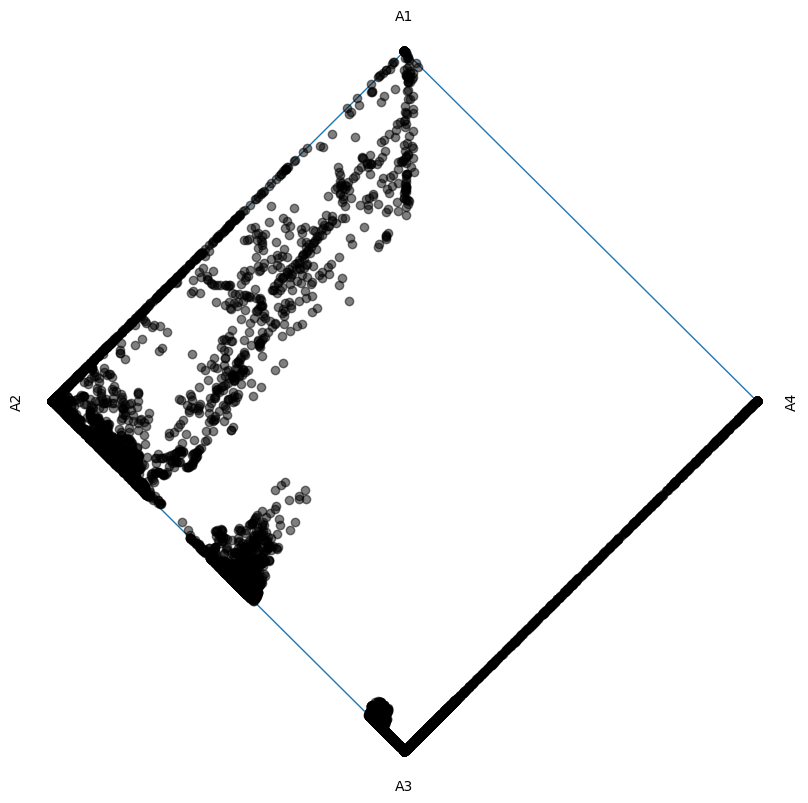

In [94]:
AA.plot_simplex(AA.alfa)

### AA.archetype_profile (291, 4)
### AA.alfa.shape (4, 9533)

In [95]:
X.shape

(9533, 291)

In [96]:
AA.archetypes.shape

(291, 4)

In [97]:
AA.beta

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [98]:
AA.alfa

array([[0.27459266, 0.27207586, 0.06772941, ..., 0.        , 0.        ,
        0.        ],
       [0.49742588, 0.49911475, 0.68125938, ..., 0.        , 0.        ,
        0.        ],
       [0.21396605, 0.2150365 , 0.23498541, ..., 0.9658764 , 0.61692156,
        0.60050586],
       [0.01401539, 0.01377287, 0.01602579, ..., 0.03412362, 0.38307845,
        0.39949415]])

In [99]:
for j in range(AA.beta.shape[1]):
    print(sum([i[j] for i in AA.beta]))

1.0000002441401377
1.0000000491563594
1.000000018869394
1.0000000377272744


In [100]:
AA.beta.shape

(9533, 4)

In [101]:
for j in range(AA.alfa.shape[1]):
    print(sum([i[j] for i in AA.alfa]))

0.9999999845859314
0.9999999848452429
0.9999999873571467
0.9999999885544184
0.9999999827729972
1.0000000762144665
1.000000776495845
1.000000787703033
1.0000000038188648
1.0000000038084462
1.0000000165532927
1.0000047496886055
1.0000000030977776
1.0000032997242014
0.9999999891810529
0.9999999854568931
0.9999999872533568
0.9999999892690882
0.9999999895422295
0.9999999895203451
0.9999999890019167
0.9999999895930415
0.9999999848476878
0.9999999815931565
0.9999999993607305
0.9999999994336067
0.9999999972396177
1.000000000557787
1.0000000005774095
1.000000001040309
0.9999999995001814
0.9999999996206652
0.9999999988862109
1.0000000318158635
1.0000000313995818
1.000000029344523
1.0000000306359769
1.0000000313062196
1.000000031648974
1.0000000324923455
1.0000000343900937
1.0000000294352582
1.0000000293706421
1.000000010699925
1.000000012836173
1.0000000120933241
1.0000000125738011
1.000000010837267
1.0000000126813318
1.0000000136040765
1.0000000121673984
0.9999999854857458
0.9999999865744849
0.

### Conclusion: The alpha condition and beta condition are working, with sum(alpha) closer to 1 and sum(beta) closer to 1

## Comparing the main points of AA4 and AA8

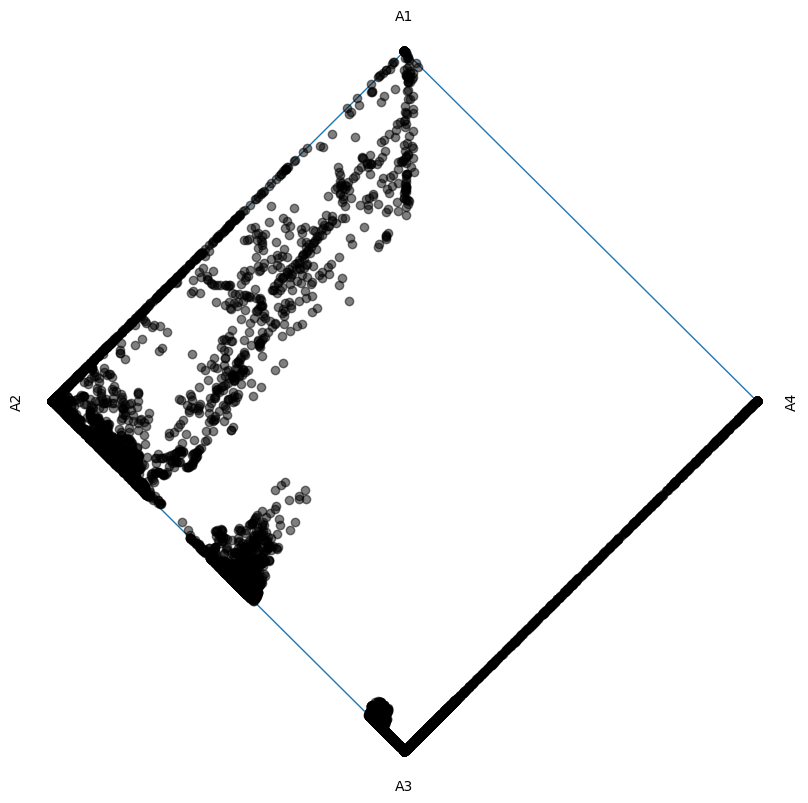

In [102]:
AA4 = ArchetypalAnalysis(n_archetypes = 4, 
                        tolerance = 0.001, 
                        max_iter = 200, 
                        random_state = 0, 
                        C = 0.0001, 
                        initialize = 'random',
                        redundancy_try = 30)
AA4.fit(X_scaled)
AA4.plot_simplex(AA4.alfa)

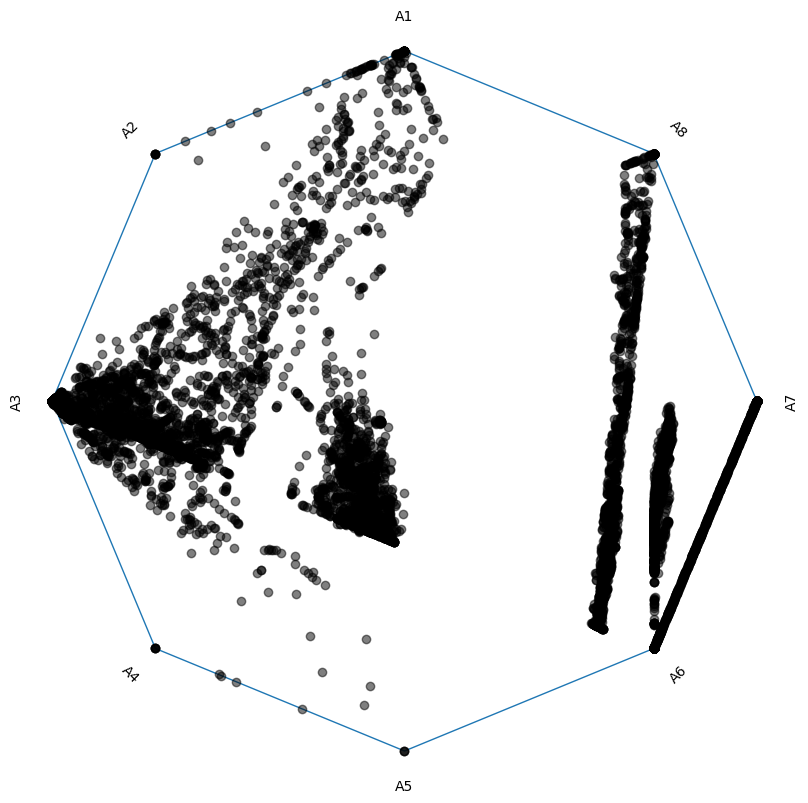

In [103]:
AA8 = ArchetypalAnalysis(n_archetypes = 8, 
                        tolerance = 0.001, 
                        max_iter = 200, 
                        random_state = 0, 
                        C = 0.0001, 
                        initialize = 'random',
                        redundancy_try = 30)
AA8.fit(X_scaled)
AA8.plot_simplex(AA8.alfa)

### A2 in AA4 and A3 in AA8 looks like main points. Let's do cosine similarity between the 4 vs 8 archetypes and see if this is true

In [104]:
AA4.archetypes

array([[-0.11863465,  0.47898883, -0.16668273, -0.16668273],
       [-0.08305261,  0.52516805, -0.19564465, -0.19564456],
       [-0.07375526,  0.55317674, -0.22682912, -0.22680736],
       ...,
       [ 1.20476832,  1.45751502, -0.93869574, -1.06786279],
       [ 1.20476818,  1.4575151 , -0.93869572, -1.06786278],
       [ 1.20475978,  1.45753109, -0.93869662, -1.06786451]])

In [105]:
AA8.archetypes

array([[-0.16245003, -0.14931436,  0.26110167, ..., -0.16668271,
        -0.16668273, -0.16668273],
       [-0.19009291, -0.17399256,  0.29399473, ..., -0.19564462,
        -0.19564462, -0.19564466],
       [-0.21769718, -0.17939633,  0.3204881 , ..., -0.22682897,
        -0.22682206, -0.22682911],
       ...,
       [ 1.20642332,  1.25135182,  1.44185902, ..., -0.9791652 ,
        -1.06909141, -0.76049202],
       [ 1.20642316,  1.2513522 ,  1.44185914, ..., -0.97916518,
        -1.0690914 , -0.76049199],
       [ 1.20634831,  1.25133939,  1.44187211, ..., -0.97916633,
        -1.06909314, -0.76049172]])

In [106]:
AA8.archetypes.T[6]

array([-0.16668273, -0.19564462, -0.22682206, -0.49018323, -0.23464058,
        0.        , -0.28585698, -0.38380987, -0.21630121,  0.        ,
        0.        , -0.33079947,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.26374293, -0.28374389, -0.11367627,  0.        ,  0.        ,
       -0.20898044, -0.3762275 , -0.1568663 , -0.27684105, -0.23902011,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.09824096, -1.05368417, -0.27020441,
       -0.11619691, -1.06794279, -0.5271853 , -1.05293168, -1.04584355,
       -1.07416241, -0.08144903, -1.05590018, -0.5396732 , -0.19451587,
       -1.04886271, -1.05050939, -1.0586087 , -0.43670872, -1.04413858,
       -0.03418489, -1.06004933, -0.12009136, -0.29110982, -0.21810277,
        4.36371651, -1.05228327, -0.55776154, -0.35392696, -0.26749374,
       -0.38791173, -0.37451359, -0.96612157, -0.16842222, -0.92

In [107]:
AA4.archetypes.T[3]

array([-0.16668273, -0.19564456, -0.22680736, -0.48935385, -0.23445466,
        0.        , -0.28438594, -0.38219612, -0.21597781,  0.        ,
        0.        , -0.32671623,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.26093532, -0.28177043, -0.11274236,  0.        ,  0.        ,
       -0.20819559, -0.37606209, -0.15685072, -0.27607114, -0.23866658,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.09824099, -1.05249277, -0.27016205,
       -0.11616277, -1.06664431, -0.52694064, -1.0516392 , -1.04452953,
       -1.07291016, -0.08144901, -1.05462265, -0.53873251, -0.1945352 ,
       -1.0475568 , -1.04920943, -1.05734006, -0.43656768, -1.04282577,
       -0.03418049, -1.05877626, -0.11998608, -0.29090141, -0.21759259,
        4.31943872, -1.05098959, -0.55621233, -0.35319544, -0.26422168,
       -0.38402215, -0.37230805, -0.96510143, -0.16842207, -0.92

In [108]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Assuming arr1 and arr2 are your numpy arrays
arr1 = AA4.archetypes.T
arr2 = AA8.archetypes.T

# Calculate cosine similarity
similarities = cosine_similarity(arr1, arr2)

# Find the indices of the pair with the highest similarity
max_row, max_col = np.unravel_index(np.argmax(similarities), similarities.shape)

print("Index of closest pair (arr1):", max_row)
print("Index of closest pair (arr2):", max_col)

Index of closest pair (arr1): 3
Index of closest pair (arr2): 6


In [ ]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

arr1 = AA4.archetypes.T
color_indices = []
for AA in AA_list:
    arr2 = AA.archetypes.T
    similarities = cosine_similarity(arr1, arr2)
    sorted_indices = np.argsort(similarities, axis=None)[::-1]
    max_indices = np.unravel_index(sorted_indices, similarities.shape)
    sorted_indices = sorted(zip(max_indices[0], max_indices[1]), key=lambda x: x[0])
    sorted_second_indices = [idx2 for _, idx2 in sorted_indices]
    color_indices.append(sorted_second_indices)


    
    
    

### A4 in AA4 and A7 in AA8

In [109]:
# Flatten the similarity matrix to get sorted indices
sorted_indices = np.argsort(similarities, axis=None)[::-1]

# Get the row and column indices for the sorted similarity values
max_indices = np.unravel_index(sorted_indices, similarities.shape)

# Print indices of pairs with highest similarity, second highest, third highest, and so on
for i in range(min([len(arr1),len(arr2)])):
    print(f"Pair {i+1}: Index of closest pair (arr1): {max_indices[0][i]}, Index of closest pair (arr2): {max_indices[1][i]}")

Pair 1: Index of closest pair (arr1): 3, Index of closest pair (arr2): 6
Pair 2: Index of closest pair (arr1): 1, Index of closest pair (arr2): 2
Pair 3: Index of closest pair (arr1): 0, Index of closest pair (arr2): 0
Pair 4: Index of closest pair (arr1): 2, Index of closest pair (arr2): 5


In [110]:
similarities

array([[ 0.96869053,  0.68382649, -0.00380651,  0.23147146,  0.22063871,
        -0.58542674, -0.3170235 , -0.42477698],
       [-0.00771806,  0.02113268,  0.97897217,  0.24249553,  0.33114011,
        -0.77756132, -0.494631  , -0.50220314],
       [-0.54908391, -0.41339194, -0.7515574 , -0.30278008, -0.36046699,
         0.9621257 ,  0.41294616,  0.70970833],
       [-0.28630144, -0.21680346, -0.4810695 , -0.16579294, -0.20159318,
         0.44570698,  0.99997828,  0.19070901]])

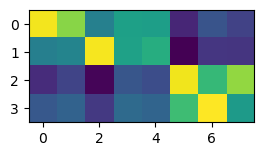

In [111]:
fig = plt.figure()
# ax1 = fig.add_subplot(121)
# # Bilinear interpolation - this will look blurry
# ax1.imshow(a, interpolation='bilinear', cmap=cm.Greys_r)

ax2 = fig.add_subplot(122)
# 'nearest' interpolation - faithful but blocky
ax2.imshow(similarities)

plt.show()

### A4 in AA4 and A7 in AA8
### A2 in AA4 and A3 in AA8
### A1 in AA4 and A1 in AA8
### A3 in AA4 and A6 in AA8

## AA4 and AA5

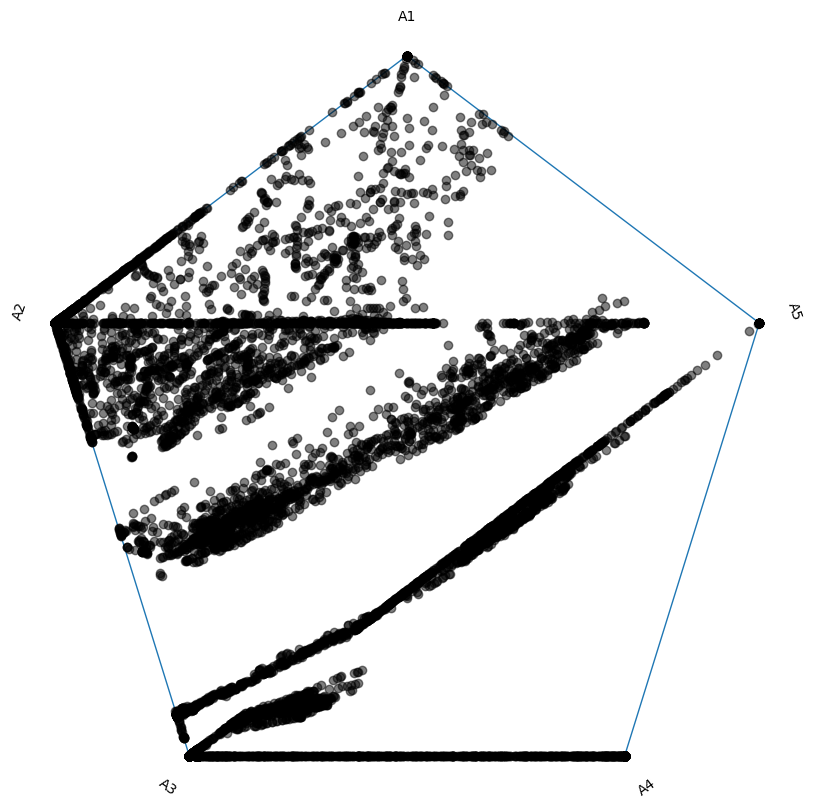

In [112]:
AA5 = ArchetypalAnalysis(n_archetypes = 5, 
                        tolerance = 0.001, 
                        max_iter = 200, 
                        random_state = 0, 
                        C = 0.0001, 
                        initialize = 'random',
                        redundancy_try = 30)
AA5.fit(X_scaled)
AA5.plot_simplex(AA5.alfa)

In [113]:
# Assuming arr1 and arr2 are your numpy arrays
arr1 = AA4.archetypes.T
arr2 = AA5.archetypes.T

# Calculate cosine similarity
similarities = cosine_similarity(arr1, arr2)

# Flatten the similarity matrix to get sorted indices
sorted_indices = np.argsort(similarities, axis=None)[::-1]

# Get the row and column indices for the sorted similarity values
max_indices = np.unravel_index(sorted_indices, similarities.shape)

# Print indices of pairs with highest similarity, second highest, third highest, and so on
for i in range(min([len(arr1),len(arr2)])):
    print(f"Pair {i+1}: Index of closest pair (arr1): {max_indices[0][i]}, Index of closest pair (arr2): {max_indices[1][i]}")

Pair 1: Index of closest pair (arr1): 3, Index of closest pair (arr2): 3
Pair 2: Index of closest pair (arr1): 0, Index of closest pair (arr2): 0
Pair 3: Index of closest pair (arr1): 2, Index of closest pair (arr2): 2
Pair 4: Index of closest pair (arr1): 1, Index of closest pair (arr2): 1


## AA4 and AA6

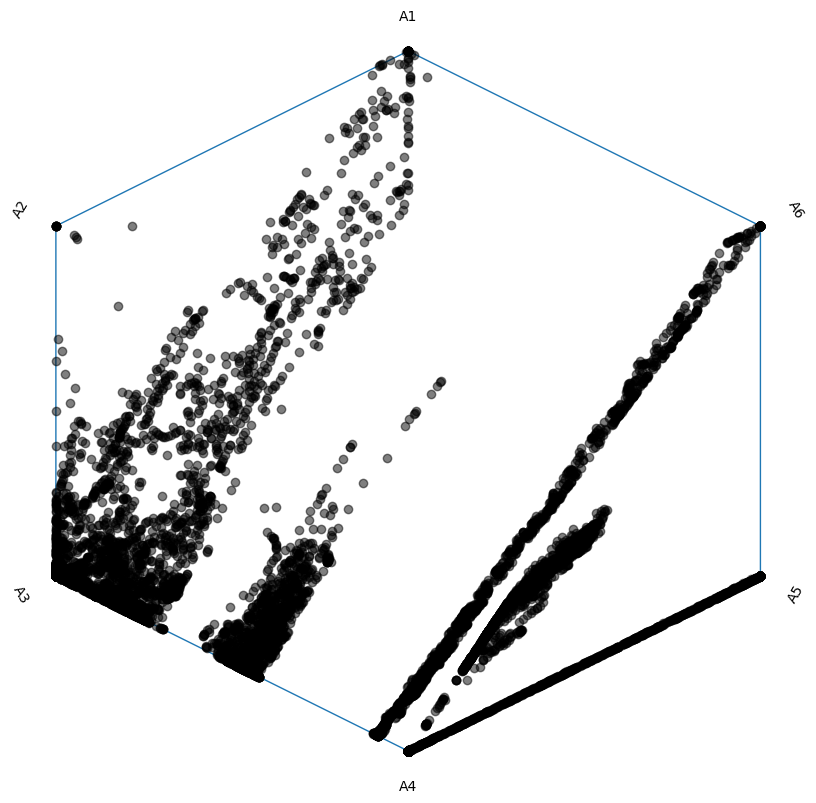

In [114]:
AA6 = ArchetypalAnalysis(n_archetypes = 6, 
                        tolerance = 0.001, 
                        max_iter = 200, 
                        random_state = 0, 
                        C = 0.0001, 
                        initialize = 'random',
                        redundancy_try = 30)
AA6.fit(X_scaled)
AA6.plot_simplex(AA6.alfa)

In [115]:
# Assuming arr1 and arr2 are your numpy arrays
arr1 = AA4.archetypes.T
arr2 = AA6.archetypes.T

# Calculate cosine similarity
similarities = cosine_similarity(arr1, arr2)

# Flatten the similarity matrix to get sorted indices
sorted_indices = np.argsort(similarities, axis=None)[::-1]

# Get the row and column indices for the sorted similarity values
max_indices = np.unravel_index(sorted_indices, similarities.shape)

# Print indices of pairs with highest similarity, second highest, third highest, and so on
for i in range(min([len(arr1),len(arr2)])):
    print(f"Pair {i+1}: Index of closest pair (arr1): {max_indices[0][i]}, Index of closest pair (arr2): {max_indices[1][i]}")

Pair 1: Index of closest pair (arr1): 3, Index of closest pair (arr2): 4
Pair 2: Index of closest pair (arr1): 0, Index of closest pair (arr2): 0
Pair 3: Index of closest pair (arr1): 1, Index of closest pair (arr2): 2
Pair 4: Index of closest pair (arr1): 2, Index of closest pair (arr2): 3


In [116]:
similarities

array([[ 0.99143686,  0.25899304,  0.03308379, -0.58906611, -0.31650636,
        -0.42019402],
       [-0.01067036,  0.28912519,  0.98594085, -0.77535968, -0.49494674,
        -0.49743889],
       [-0.55960547, -0.35093143, -0.77864917,  0.96279966,  0.41284633,
         0.70354491],
       [-0.29166383, -0.19580071, -0.49340389,  0.44505491,  0.99998296,
         0.18770045]])

### Shape and Colour - Location, Level

In [117]:
folder_path = 'samples/'

# Create a dictionary with filename as keys and concentrations as objects
data = {}
# List all files in the folder and subdirectories
for root, dirs, files in os.walk(folder_path):
    for file in files:
        print(os.path.join(root, file))
        chemical_case = ChemicalCase(os.path.join(root,file))
        concentrations = chemical_case.concentrations
        data[file] = file.split('_')[:2] + concentrations

# Convert the dictionary to a DataFrame
df = pd.DataFrame.from_dict(data, orient='index')

# Rename columns as C1, C2, ...C291
df.columns = ['Location','Level']+['C' + str(i + 1) for i in range(len(df.columns)-2)]

# Set the filename as the index
df.index.name = 'filename'

samples/AmazonTwilight_L10_20180101_2215.txt
samples/AmazonTwilight_L10_20180101_2230.txt
samples/AmazonTwilight_L10_20180401_2130.txt
samples/AmazonTwilight_L10_20180402_1015.txt
samples/AmazonTwilight_L10_20180702_0945.txt
samples/AmazonTwilight_L1_20180101_2145.txt
samples/AmazonTwilight_L1_20180102_0930.txt
samples/AmazonTwilight_L1_20180102_1000.txt
samples/AmazonTwilight_L1_20180401_2145.txt
samples/AmazonTwilight_L1_20180401_2200.txt
samples/AmazonTwilight_L1_20180402_0945.txt
samples/AmazonTwilight_L1_20180702_1030.txt
samples/AmazonTwilight_L1_20180930_2230.txt
samples/AmazonTwilight_L1_20181001_0945.txt
samples/AmazonTwilight_L23_20180101_2200.txt
samples/AmazonTwilight_L23_20180102_0930.txt
samples/AmazonTwilight_L23_20180402_1030.txt
samples/AmazonTwilight_L23_20180701_2130.txt
samples/AmazonTwilight_L23_20180701_2215.txt
samples/AmazonTwilight_L23_20180701_2230.txt
samples/AmazonTwilight_L23_20180702_0945.txt
samples/AmazonTwilight_L23_20180702_1030.txt
samples/AmazonTwili

samples/Amazon_L23_20180402_0630.txt
samples/Amazon_L23_20180402_0730.txt
samples/Amazon_L23_20180402_0830.txt
samples/Amazon_L23_20180402_0845.txt
samples/Amazon_L23_20180402_1045.txt
samples/Amazon_L23_20180402_1100.txt
samples/Amazon_L23_20180402_1500.txt
samples/Amazon_L23_20180402_1515.txt
samples/Amazon_L23_20180402_1530.txt
samples/Amazon_L23_20180402_1630.txt
samples/Amazon_L23_20180402_1700.txt
samples/Amazon_L23_20180402_1745.txt
samples/Amazon_L23_20180402_1830.txt
samples/Amazon_L23_20180402_1915.txt
samples/Amazon_L23_20180701_2315.txt
samples/Amazon_L23_20180701_2345.txt
samples/Amazon_L23_20180702_0030.txt
samples/Amazon_L23_20180702_0100.txt
samples/Amazon_L23_20180702_0130.txt
samples/Amazon_L23_20180702_0215.txt
samples/Amazon_L23_20180702_0230.txt
samples/Amazon_L23_20180702_0245.txt
samples/Amazon_L23_20180702_0300.txt
samples/Amazon_L23_20180702_0400.txt
samples/Amazon_L23_20180702_0430.txt
samples/Amazon_L23_20180702_0515.txt
samples/Amazon_L23_20180702_0600.txt
s

samples/Amazon_L56_20180402_0230.txt
samples/Amazon_L56_20180402_0245.txt
samples/Amazon_L56_20180402_0430.txt
samples/Amazon_L56_20180402_0445.txt
samples/Amazon_L56_20180402_0515.txt
samples/Amazon_L56_20180402_0545.txt
samples/Amazon_L56_20180402_0630.txt
samples/Amazon_L56_20180402_0745.txt
samples/Amazon_L56_20180402_1045.txt
samples/Amazon_L56_20180402_1215.txt
samples/Amazon_L56_20180402_1230.txt
samples/Amazon_L56_20180402_1245.txt
samples/Amazon_L56_20180402_1300.txt
samples/Amazon_L56_20180402_1400.txt
samples/Amazon_L56_20180402_1430.txt
samples/Amazon_L56_20180402_1545.txt
samples/Amazon_L56_20180402_1645.txt
samples/Amazon_L56_20180402_1900.txt
samples/Amazon_L56_20180402_1945.txt
samples/Amazon_L56_20180402_2000.txt
samples/Amazon_L56_20180402_2015.txt
samples/Amazon_L56_20180702_0000.txt
samples/Amazon_L56_20180702_0145.txt
samples/Amazon_L56_20180702_0215.txt
samples/Amazon_L56_20180702_0230.txt
samples/Amazon_L56_20180702_0245.txt
samples/Amazon_L56_20180702_0300.txt
s

samples/AtlanticOcean_L10_20181001_1345.txt
samples/AtlanticOcean_L10_20181001_1400.txt
samples/AtlanticOcean_L10_20181001_1500.txt
samples/AtlanticOcean_L10_20181001_1530.txt
samples/AtlanticOcean_L10_20181001_1600.txt
samples/AtlanticOcean_L10_20181001_1615.txt
samples/AtlanticOcean_L10_20181001_1630.txt
samples/AtlanticOcean_L10_20181001_1645.txt
samples/AtlanticOcean_L10_20181001_1800.txt
samples/AtlanticOcean_L1_20180102_0330.txt
samples/AtlanticOcean_L1_20180102_0415.txt
samples/AtlanticOcean_L1_20180102_0515.txt
samples/AtlanticOcean_L1_20180102_0700.txt
samples/AtlanticOcean_L1_20180102_0830.txt
samples/AtlanticOcean_L1_20180102_1300.txt
samples/AtlanticOcean_L1_20180102_1430.txt
samples/AtlanticOcean_L1_20180102_1500.txt
samples/AtlanticOcean_L1_20180102_1545.txt
samples/AtlanticOcean_L1_20180102_1600.txt
samples/AtlanticOcean_L1_20180102_1800.txt
samples/AtlanticOcean_L1_20180102_1830.txt
samples/AtlanticOcean_L1_20180401_2200.txt
samples/AtlanticOcean_L1_20180401_2215.txt
sa

samples/AtlanticOcean_L35_20180402_1245.txt
samples/AtlanticOcean_L35_20180402_1315.txt
samples/AtlanticOcean_L35_20180402_1330.txt
samples/AtlanticOcean_L35_20180402_1700.txt
samples/AtlanticOcean_L35_20180402_1730.txt
samples/AtlanticOcean_L35_20180701_2245.txt
samples/AtlanticOcean_L35_20180701_2315.txt
samples/AtlanticOcean_L35_20180701_2330.txt
samples/AtlanticOcean_L35_20180702_0000.txt
samples/AtlanticOcean_L35_20180702_0315.txt
samples/AtlanticOcean_L35_20180702_0400.txt
samples/AtlanticOcean_L35_20180702_0415.txt
samples/AtlanticOcean_L35_20180702_0430.txt
samples/AtlanticOcean_L35_20180702_0445.txt
samples/AtlanticOcean_L35_20180702_0515.txt
samples/AtlanticOcean_L35_20180702_0615.txt
samples/AtlanticOcean_L35_20180702_0630.txt
samples/AtlanticOcean_L35_20180702_0815.txt
samples/AtlanticOcean_L35_20180702_0915.txt
samples/AtlanticOcean_L35_20180702_1000.txt
samples/AtlanticOcean_L35_20180702_1030.txt
samples/AtlanticOcean_L35_20180702_1200.txt
samples/AtlanticOcean_L35_201807

samples/BeijingTwilight_L1_20180102_0830.txt
samples/BeijingTwilight_L1_20180402_1045.txt
samples/BeijingTwilight_L1_20180702_1045.txt
samples/BeijingTwilight_L1_20180702_1115.txt
samples/BeijingTwilight_L1_20180702_2015.txt
samples/BeijingTwilight_L1_20180702_2030.txt
samples/BeijingTwilight_L1_20180930_2200.txt
samples/BeijingTwilight_L1_20180930_2245.txt
samples/BeijingTwilight_L1_20181001_0930.txt
samples/BeijingTwilight_L1_20181001_0945.txt
samples/BeijingTwilight_L1_20181001_1030.txt
samples/BeijingTwilight_L23_20180101_2245.txt
samples/BeijingTwilight_L23_20180101_2315.txt
samples/BeijingTwilight_L23_20180102_0000.txt
samples/BeijingTwilight_L23_20180102_0815.txt
samples/BeijingTwilight_L23_20180402_1015.txt
samples/BeijingTwilight_L23_20180402_1100.txt
samples/BeijingTwilight_L23_20180702_1100.txt
samples/BeijingTwilight_L23_20180702_1115.txt
samples/BeijingTwilight_L23_20180702_1145.txt
samples/BeijingTwilight_L23_20180702_2000.txt
samples/BeijingTwilight_L23_20180702_2045.txt

samples/Beijing_L1_20181001_0215.txt
samples/Beijing_L1_20181001_0245.txt
samples/Beijing_L1_20181001_0330.txt
samples/Beijing_L1_20181001_0415.txt
samples/Beijing_L1_20181001_0430.txt
samples/Beijing_L1_20181001_0445.txt
samples/Beijing_L1_20181001_0515.txt
samples/Beijing_L1_20181001_0530.txt
samples/Beijing_L1_20181001_0830.txt
samples/Beijing_L1_20181001_1200.txt
samples/Beijing_L1_20181001_1245.txt
samples/Beijing_L1_20181001_1345.txt
samples/Beijing_L1_20181001_1600.txt
samples/Beijing_L1_20181001_1615.txt
samples/Beijing_L1_20181001_1630.txt
samples/Beijing_L1_20181001_1645.txt
samples/Beijing_L1_20181001_1715.txt
samples/Beijing_L1_20181001_1815.txt
samples/Beijing_L1_20181001_1845.txt
samples/Beijing_L1_20181001_1900.txt
samples/Beijing_L1_20181001_1915.txt
samples/Beijing_L1_20181001_1930.txt
samples/Beijing_L1_20181001_1945.txt
samples/Beijing_L1_20181001_2030.txt
samples/Beijing_L23_20180101_2115.txt
samples/Beijing_L23_20180101_2200.txt
samples/Beijing_L23_20180101_2230.tx

samples/Beijing_L48_20180702_0800.txt
samples/Beijing_L48_20180702_0815.txt
samples/Beijing_L48_20180702_1030.txt
samples/Beijing_L48_20180702_1300.txt
samples/Beijing_L48_20180702_1415.txt
samples/Beijing_L48_20180702_1530.txt
samples/Beijing_L48_20180702_1615.txt
samples/Beijing_L48_20180702_1630.txt
samples/Beijing_L48_20180702_1715.txt
samples/Beijing_L48_20180702_1845.txt
samples/Beijing_L48_20180702_1915.txt
samples/Beijing_L48_20180930_2115.txt
samples/Beijing_L48_20180930_2130.txt
samples/Beijing_L48_20180930_2300.txt
samples/Beijing_L48_20181001_0115.txt
samples/Beijing_L48_20181001_0300.txt
samples/Beijing_L48_20181001_0315.txt
samples/Beijing_L48_20181001_0345.txt
samples/Beijing_L48_20181001_0515.txt
samples/Beijing_L48_20181001_0600.txt
samples/Beijing_L48_20181001_0630.txt
samples/Beijing_L48_20181001_0730.txt
samples/Beijing_L48_20181001_0815.txt
samples/Beijing_L48_20181001_0845.txt
samples/Beijing_L48_20181001_0900.txt
samples/Beijing_L48_20181001_1215.txt
samples/Beij

samples/Borneo_L10_20180702_1445.txt
samples/Borneo_L10_20180702_1515.txt
samples/Borneo_L10_20180702_1730.txt
samples/Borneo_L10_20180702_1745.txt
samples/Borneo_L10_20180702_1800.txt
samples/Borneo_L10_20180702_1830.txt
samples/Borneo_L10_20180702_1900.txt
samples/Borneo_L10_20180930_2115.txt
samples/Borneo_L10_20180930_2300.txt
samples/Borneo_L10_20180930_2330.txt
samples/Borneo_L10_20180930_2345.txt
samples/Borneo_L10_20181001_0230.txt
samples/Borneo_L10_20181001_0245.txt
samples/Borneo_L10_20181001_0345.txt
samples/Borneo_L10_20181001_0515.txt
samples/Borneo_L10_20181001_0530.txt
samples/Borneo_L10_20181001_0600.txt
samples/Borneo_L10_20181001_0615.txt
samples/Borneo_L10_20181001_0730.txt
samples/Borneo_L10_20181001_0745.txt
samples/Borneo_L10_20181001_0845.txt
samples/Borneo_L10_20181001_1345.txt
samples/Borneo_L10_20181001_1400.txt
samples/Borneo_L10_20181001_1630.txt
samples/Borneo_L10_20181001_1700.txt
samples/Borneo_L10_20181001_1800.txt
samples/Borneo_L1_20180102_0045.txt
sa

samples/Borneo_L35_20180102_0130.txt
samples/Borneo_L35_20180102_0200.txt
samples/Borneo_L35_20180102_0300.txt
samples/Borneo_L35_20180102_0400.txt
samples/Borneo_L35_20180102_0430.txt
samples/Borneo_L35_20180102_0545.txt
samples/Borneo_L35_20180102_0630.txt
samples/Borneo_L35_20180102_0645.txt
samples/Borneo_L35_20180102_0900.txt
samples/Borneo_L35_20180102_1130.txt
samples/Borneo_L35_20180102_1145.txt
samples/Borneo_L35_20180102_1400.txt
samples/Borneo_L35_20180102_1600.txt
samples/Borneo_L35_20180102_1615.txt
samples/Borneo_L35_20180102_1715.txt
samples/Borneo_L35_20180102_1845.txt
samples/Borneo_L35_20180102_1900.txt
samples/Borneo_L35_20180102_1915.txt
samples/Borneo_L35_20180102_1930.txt
samples/Borneo_L35_20180102_2030.txt
samples/Borneo_L35_20180401_2130.txt
samples/Borneo_L35_20180401_2330.txt
samples/Borneo_L35_20180402_0100.txt
samples/Borneo_L35_20180402_0200.txt
samples/Borneo_L35_20180402_0315.txt
samples/Borneo_L35_20180402_0330.txt
samples/Borneo_L35_20180402_0345.txt
s

samples/Borneo_L56_20180702_1700.txt
samples/Borneo_L56_20180702_1745.txt
samples/Borneo_L56_20180702_1800.txt
samples/Borneo_L56_20180702_1830.txt
samples/Borneo_L56_20180702_1845.txt
samples/Borneo_L56_20180702_1945.txt
samples/Borneo_L56_20180702_2015.txt
samples/Borneo_L56_20180930_2100.txt
samples/Borneo_L56_20180930_2145.txt
samples/Borneo_L56_20180930_2345.txt
samples/Borneo_L56_20181001_0000.txt
samples/Borneo_L56_20181001_0045.txt
samples/Borneo_L56_20181001_0130.txt
samples/Borneo_L56_20181001_0145.txt
samples/Borneo_L56_20181001_0215.txt
samples/Borneo_L56_20181001_0230.txt
samples/Borneo_L56_20181001_0400.txt
samples/Borneo_L56_20181001_0500.txt
samples/Borneo_L56_20181001_0700.txt
samples/Borneo_L56_20181001_0730.txt
samples/Borneo_L56_20181001_0745.txt
samples/Borneo_L56_20181001_0930.txt
samples/Borneo_L56_20181001_1245.txt
samples/Borneo_L56_20181001_1315.txt
samples/Borneo_L56_20181001_1415.txt
samples/Borneo_L56_20181001_1530.txt
samples/Borneo_L56_20181001_1900.txt
s

samples/CapeGrim_L10_20181001_1315.txt
samples/CapeGrim_L10_20181001_1445.txt
samples/CapeGrim_L10_20181001_1530.txt
samples/CapeGrim_L10_20181001_1600.txt
samples/CapeGrim_L10_20181001_1730.txt
samples/CapeGrim_L1_20180101_2100.txt
samples/CapeGrim_L1_20180101_2130.txt
samples/CapeGrim_L1_20180101_2230.txt
samples/CapeGrim_L1_20180101_2300.txt
samples/CapeGrim_L1_20180101_2315.txt
samples/CapeGrim_L1_20180101_2345.txt
samples/CapeGrim_L1_20180102_0030.txt
samples/CapeGrim_L1_20180102_0100.txt
samples/CapeGrim_L1_20180102_0230.txt
samples/CapeGrim_L1_20180102_0330.txt
samples/CapeGrim_L1_20180102_0400.txt
samples/CapeGrim_L1_20180102_0600.txt
samples/CapeGrim_L1_20180102_0615.txt
samples/CapeGrim_L1_20180102_1100.txt
samples/CapeGrim_L1_20180102_1130.txt
samples/CapeGrim_L1_20180102_1300.txt
samples/CapeGrim_L1_20180102_1315.txt
samples/CapeGrim_L1_20180102_1430.txt
samples/CapeGrim_L1_20180102_1445.txt
samples/CapeGrim_L1_20180102_1715.txt
samples/CapeGrim_L1_20180102_1730.txt
samples

samples/CapeGrim_L35_20180402_0130.txt
samples/CapeGrim_L35_20180402_0145.txt
samples/CapeGrim_L35_20180402_0230.txt
samples/CapeGrim_L35_20180402_0245.txt
samples/CapeGrim_L35_20180402_0345.txt
samples/CapeGrim_L35_20180402_0600.txt
samples/CapeGrim_L35_20180402_0945.txt
samples/CapeGrim_L35_20180402_1015.txt
samples/CapeGrim_L35_20180402_1045.txt
samples/CapeGrim_L35_20180402_1200.txt
samples/CapeGrim_L35_20180402_1615.txt
samples/CapeGrim_L35_20180402_1645.txt
samples/CapeGrim_L35_20180402_1815.txt
samples/CapeGrim_L35_20180402_1930.txt
samples/CapeGrim_L35_20180701_2245.txt
samples/CapeGrim_L35_20180701_2315.txt
samples/CapeGrim_L35_20180701_2345.txt
samples/CapeGrim_L35_20180702_0000.txt
samples/CapeGrim_L35_20180702_0200.txt
samples/CapeGrim_L35_20180702_0300.txt
samples/CapeGrim_L35_20180702_0415.txt
samples/CapeGrim_L35_20180702_0430.txt
samples/CapeGrim_L35_20180702_0445.txt
samples/CapeGrim_L35_20180702_0500.txt
samples/CapeGrim_L35_20180702_0830.txt
samples/CapeGrim_L35_2018

samples/CongoTwilight_L23_20181001_1615.txt
samples/CongoTwilight_L23_20181001_1630.txt
samples/CongoTwilight_L35_20180102_0430.txt
samples/CongoTwilight_L35_20180102_1615.txt
samples/CongoTwilight_L35_20180402_1615.txt
samples/CongoTwilight_L35_20180702_1615.txt
samples/CongoTwilight_L35_20180702_1700.txt
samples/CongoTwilight_L35_20180702_1715.txt
samples/CongoTwilight_L35_20181001_0415.txt
samples/CongoTwilight_L35_20181001_0430.txt
samples/CongoTwilight_L35_20181001_0515.txt
samples/CongoTwilight_L35_20181001_1615.txt
samples/CongoTwilight_L35_20181001_1630.txt
samples/CongoTwilight_L35_20181001_1700.txt
samples/CongoTwilight_L48_20180102_0415.txt
samples/CongoTwilight_L48_20180402_0430.txt
samples/CongoTwilight_L48_20180402_1645.txt
samples/CongoTwilight_L48_20180702_1615.txt
samples/CongoTwilight_L48_20180702_1645.txt
samples/CongoTwilight_L48_20181001_1715.txt
samples/CongoTwilight_L56_20180102_0415.txt
samples/CongoTwilight_L56_20180102_0445.txt
samples/CongoTwilight_L56_201804

samples/Congo_L23_20180402_1045.txt
samples/Congo_L23_20180402_1115.txt
samples/Congo_L23_20180402_1145.txt
samples/Congo_L23_20180402_1215.txt
samples/Congo_L23_20180402_1345.txt
samples/Congo_L23_20180402_1400.txt
samples/Congo_L23_20180402_1530.txt
samples/Congo_L23_20180402_1915.txt
samples/Congo_L23_20180402_1930.txt
samples/Congo_L23_20180402_2000.txt
samples/Congo_L23_20180402_2015.txt
samples/Congo_L23_20180402_2030.txt
samples/Congo_L23_20180701_2130.txt
samples/Congo_L23_20180701_2145.txt
samples/Congo_L23_20180702_0015.txt
samples/Congo_L23_20180702_0200.txt
samples/Congo_L23_20180702_0315.txt
samples/Congo_L23_20180702_0400.txt
samples/Congo_L23_20180702_0515.txt
samples/Congo_L23_20180702_0745.txt
samples/Congo_L23_20180702_0845.txt
samples/Congo_L23_20180702_1015.txt
samples/Congo_L23_20180702_1100.txt
samples/Congo_L23_20180702_1115.txt
samples/Congo_L23_20180702_1130.txt
samples/Congo_L23_20180702_1215.txt
samples/Congo_L23_20180702_1445.txt
samples/Congo_L23_20180702_1

samples/Congo_L48_20181001_1730.txt
samples/Congo_L48_20181001_1745.txt
samples/Congo_L48_20181001_1915.txt
samples/Congo_L48_20181001_2000.txt
samples/Congo_L48_20181001_2015.txt
samples/Congo_L56_20180101_2100.txt
samples/Congo_L56_20180101_2115.txt
samples/Congo_L56_20180101_2200.txt
samples/Congo_L56_20180101_2245.txt
samples/Congo_L56_20180101_2345.txt
samples/Congo_L56_20180102_0030.txt
samples/Congo_L56_20180102_0115.txt
samples/Congo_L56_20180102_0215.txt
samples/Congo_L56_20180102_0300.txt
samples/Congo_L56_20180102_0315.txt
samples/Congo_L56_20180102_0700.txt
samples/Congo_L56_20180102_0830.txt
samples/Congo_L56_20180102_0915.txt
samples/Congo_L56_20180102_1130.txt
samples/Congo_L56_20180102_1200.txt
samples/Congo_L56_20180102_1515.txt
samples/Congo_L56_20180102_1600.txt
samples/Congo_L56_20180102_1745.txt
samples/Congo_L56_20180102_1830.txt
samples/Congo_L56_20180102_1900.txt
samples/Congo_L56_20180102_1945.txt
samples/Congo_L56_20180102_2045.txt
samples/Congo_L56_20180401_2

samples/ElDjouf_L1_20180102_0000.txt
samples/ElDjouf_L1_20180102_0030.txt
samples/ElDjouf_L1_20180102_0200.txt
samples/ElDjouf_L1_20180102_0400.txt
samples/ElDjouf_L1_20180102_0415.txt
samples/ElDjouf_L1_20180102_0445.txt
samples/ElDjouf_L1_20180102_0500.txt
samples/ElDjouf_L1_20180102_1045.txt
samples/ElDjouf_L1_20180102_1200.txt
samples/ElDjouf_L1_20180102_1230.txt
samples/ElDjouf_L1_20180102_1315.txt
samples/ElDjouf_L1_20180102_1345.txt
samples/ElDjouf_L1_20180102_1430.txt
samples/ElDjouf_L1_20180102_1615.txt
samples/ElDjouf_L1_20180102_1630.txt
samples/ElDjouf_L1_20180102_1945.txt
samples/ElDjouf_L1_20180102_2000.txt
samples/ElDjouf_L1_20180102_2030.txt
samples/ElDjouf_L1_20180102_2045.txt
samples/ElDjouf_L1_20180401_2145.txt
samples/ElDjouf_L1_20180401_2230.txt
samples/ElDjouf_L1_20180401_2245.txt
samples/ElDjouf_L1_20180401_2345.txt
samples/ElDjouf_L1_20180402_0015.txt
samples/ElDjouf_L1_20180402_0030.txt
samples/ElDjouf_L1_20180402_0200.txt
samples/ElDjouf_L1_20180402_0330.txt
s

samples/ElDjouf_L35_20180402_1430.txt
samples/ElDjouf_L35_20180402_1445.txt
samples/ElDjouf_L35_20180402_1530.txt
samples/ElDjouf_L35_20180402_1545.txt
samples/ElDjouf_L35_20180402_1615.txt
samples/ElDjouf_L35_20180402_1915.txt
samples/ElDjouf_L35_20180402_2000.txt
samples/ElDjouf_L35_20180402_2015.txt
samples/ElDjouf_L35_20180701_2115.txt
samples/ElDjouf_L35_20180701_2145.txt
samples/ElDjouf_L35_20180701_2200.txt
samples/ElDjouf_L35_20180701_2230.txt
samples/ElDjouf_L35_20180701_2245.txt
samples/ElDjouf_L35_20180701_2315.txt
samples/ElDjouf_L35_20180702_0130.txt
samples/ElDjouf_L35_20180702_0230.txt
samples/ElDjouf_L35_20180702_0315.txt
samples/ElDjouf_L35_20180702_0415.txt
samples/ElDjouf_L35_20180702_0445.txt
samples/ElDjouf_L35_20180702_0845.txt
samples/ElDjouf_L35_20180702_0915.txt
samples/ElDjouf_L35_20180702_0930.txt
samples/ElDjouf_L35_20180702_1045.txt
samples/ElDjouf_L35_20180702_1215.txt
samples/ElDjouf_L35_20180702_1345.txt
samples/ElDjouf_L35_20180702_1530.txt
samples/ElDj

samples/GraciosaTwilight_L10_20180402_1930.txt
samples/GraciosaTwilight_L10_20180402_2000.txt
samples/GraciosaTwilight_L10_20180402_2015.txt
samples/GraciosaTwilight_L10_20180402_2030.txt
samples/GraciosaTwilight_L10_20180701_2115.txt
samples/GraciosaTwilight_L10_20180701_2130.txt
samples/GraciosaTwilight_L10_20180701_2145.txt
samples/GraciosaTwilight_L10_20180702_0545.txt
samples/GraciosaTwilight_L10_20180702_0600.txt
samples/GraciosaTwilight_L10_20180702_0645.txt
samples/GraciosaTwilight_L10_20180702_2030.txt
samples/GraciosaTwilight_L10_20181001_0815.txt
samples/GraciosaTwilight_L10_20181001_0830.txt
samples/GraciosaTwilight_L10_20181001_1945.txt
samples/GraciosaTwilight_L1_20180102_1745.txt
samples/GraciosaTwilight_L1_20180102_1815.txt
samples/GraciosaTwilight_L1_20180102_1830.txt
samples/GraciosaTwilight_L1_20180402_0715.txt
samples/GraciosaTwilight_L1_20180402_0730.txt
samples/GraciosaTwilight_L1_20180402_0800.txt
samples/GraciosaTwilight_L1_20180402_1945.txt
samples/GraciosaTwil

samples/Graciosa_L1_20180402_0015.txt
samples/Graciosa_L1_20180402_0045.txt
samples/Graciosa_L1_20180402_0100.txt
samples/Graciosa_L1_20180402_0130.txt
samples/Graciosa_L1_20180402_0145.txt
samples/Graciosa_L1_20180402_0215.txt
samples/Graciosa_L1_20180402_0330.txt
samples/Graciosa_L1_20180402_0445.txt
samples/Graciosa_L1_20180402_0545.txt
samples/Graciosa_L1_20180402_0600.txt
samples/Graciosa_L1_20180402_0615.txt
samples/Graciosa_L1_20180402_0830.txt
samples/Graciosa_L1_20180402_0845.txt
samples/Graciosa_L1_20180402_0915.txt
samples/Graciosa_L1_20180402_1000.txt
samples/Graciosa_L1_20180402_1115.txt
samples/Graciosa_L1_20180402_1230.txt
samples/Graciosa_L1_20180402_1300.txt
samples/Graciosa_L1_20180402_1430.txt
samples/Graciosa_L1_20180402_1600.txt
samples/Graciosa_L1_20180402_1700.txt
samples/Graciosa_L1_20180402_1745.txt
samples/Graciosa_L1_20180701_2230.txt
samples/Graciosa_L1_20180701_2245.txt
samples/Graciosa_L1_20180701_2300.txt
samples/Graciosa_L1_20180701_2315.txt
samples/Grac

samples/Graciosa_L35_20180702_1445.txt
samples/Graciosa_L35_20180702_1500.txt
samples/Graciosa_L35_20180702_1615.txt
samples/Graciosa_L35_20180702_1645.txt
samples/Graciosa_L35_20180702_1730.txt
samples/Graciosa_L35_20180702_1830.txt
samples/Graciosa_L35_20180702_1915.txt
samples/Graciosa_L35_20180702_1930.txt
samples/Graciosa_L35_20180702_1945.txt
samples/Graciosa_L35_20180930_2130.txt
samples/Graciosa_L35_20180930_2145.txt
samples/Graciosa_L35_20180930_2200.txt
samples/Graciosa_L35_20180930_2215.txt
samples/Graciosa_L35_20180930_2345.txt
samples/Graciosa_L35_20181001_0130.txt
samples/Graciosa_L35_20181001_0215.txt
samples/Graciosa_L35_20181001_0300.txt
samples/Graciosa_L35_20181001_0415.txt
samples/Graciosa_L35_20181001_0915.txt
samples/Graciosa_L35_20181001_0945.txt
samples/Graciosa_L35_20181001_1100.txt
samples/Graciosa_L35_20181001_1115.txt
samples/Graciosa_L35_20181001_1130.txt
samples/Graciosa_L35_20181001_1215.txt
samples/Graciosa_L35_20181001_1245.txt
samples/Graciosa_L35_2018

samples/IndianOceanTwilight_L23_20180402_0015.txt
samples/IndianOceanTwilight_L23_20180402_0030.txt
samples/IndianOceanTwilight_L23_20180702_0015.txt
samples/IndianOceanTwilight_L23_20180702_0115.txt
samples/IndianOceanTwilight_L23_20180702_1045.txt
samples/IndianOceanTwilight_L23_20180702_1130.txt
samples/IndianOceanTwilight_L23_20181001_0000.txt
samples/IndianOceanTwilight_L35_20180101_2345.txt
samples/IndianOceanTwilight_L35_20180102_1215.txt
samples/IndianOceanTwilight_L35_20180102_1245.txt
samples/IndianOceanTwilight_L35_20180401_2345.txt
samples/IndianOceanTwilight_L35_20180402_0015.txt
samples/IndianOceanTwilight_L35_20180402_1200.txt
samples/IndianOceanTwilight_L35_20180402_1215.txt
samples/IndianOceanTwilight_L35_20180702_0015.txt
samples/IndianOceanTwilight_L35_20180702_1115.txt
samples/IndianOceanTwilight_L35_20180930_2345.txt
samples/IndianOceanTwilight_L35_20181001_0000.txt
samples/IndianOceanTwilight_L35_20181001_1215.txt
samples/IndianOceanTwilight_L48_20180101_2300.txt


samples/IndianOcean_L1_20180702_1615.txt
samples/IndianOcean_L1_20180702_1645.txt
samples/IndianOcean_L1_20180702_1930.txt
samples/IndianOcean_L1_20180702_2015.txt
samples/IndianOcean_L1_20180930_2100.txt
samples/IndianOcean_L1_20180930_2115.txt
samples/IndianOcean_L1_20180930_2145.txt
samples/IndianOcean_L1_20180930_2200.txt
samples/IndianOcean_L1_20180930_2230.txt
samples/IndianOcean_L1_20181001_0045.txt
samples/IndianOcean_L1_20181001_0200.txt
samples/IndianOcean_L1_20181001_0230.txt
samples/IndianOcean_L1_20181001_0300.txt
samples/IndianOcean_L1_20181001_0400.txt
samples/IndianOcean_L1_20181001_0445.txt
samples/IndianOcean_L1_20181001_0545.txt
samples/IndianOcean_L1_20181001_0600.txt
samples/IndianOcean_L1_20181001_0645.txt
samples/IndianOcean_L1_20181001_0745.txt
samples/IndianOcean_L1_20181001_0800.txt
samples/IndianOcean_L1_20181001_0900.txt
samples/IndianOcean_L1_20181001_0930.txt
samples/IndianOcean_L1_20181001_1000.txt
samples/IndianOcean_L1_20181001_1045.txt
samples/IndianOc

samples/IndianOcean_L48_20180102_1200.txt
samples/IndianOcean_L48_20180102_1445.txt
samples/IndianOcean_L48_20180102_1500.txt
samples/IndianOcean_L48_20180102_1800.txt
samples/IndianOcean_L48_20180102_1830.txt
samples/IndianOcean_L48_20180102_1900.txt
samples/IndianOcean_L48_20180102_1930.txt
samples/IndianOcean_L48_20180401_2315.txt
samples/IndianOcean_L48_20180402_0200.txt
samples/IndianOcean_L48_20180402_0230.txt
samples/IndianOcean_L48_20180402_0245.txt
samples/IndianOcean_L48_20180402_0300.txt
samples/IndianOcean_L48_20180402_0315.txt
samples/IndianOcean_L48_20180402_0430.txt
samples/IndianOcean_L48_20180402_0445.txt
samples/IndianOcean_L48_20180402_0515.txt
samples/IndianOcean_L48_20180402_0745.txt
samples/IndianOcean_L48_20180402_1015.txt
samples/IndianOcean_L48_20180402_1030.txt
samples/IndianOcean_L48_20180402_1045.txt
samples/IndianOcean_L48_20180402_1300.txt
samples/IndianOcean_L48_20180402_1515.txt
samples/IndianOcean_L48_20180402_1530.txt
samples/IndianOcean_L48_20180402_1

samples/KinshasaTwilight_L35_20181001_1645.txt
samples/KinshasaTwilight_L35_20181001_1715.txt
samples/KinshasaTwilight_L48_20180102_0430.txt
samples/KinshasaTwilight_L48_20180102_1630.txt
samples/KinshasaTwilight_L48_20180402_0430.txt
samples/KinshasaTwilight_L48_20180402_0500.txt
samples/KinshasaTwilight_L48_20180402_0515.txt
samples/KinshasaTwilight_L48_20180402_1645.txt
samples/KinshasaTwilight_L48_20180702_0430.txt
samples/KinshasaTwilight_L48_20181001_0500.txt
samples/KinshasaTwilight_L48_20181001_1700.txt
samples/KinshasaTwilight_L48_20181001_1715.txt
samples/KinshasaTwilight_L56_20180102_0515.txt
samples/KinshasaTwilight_L56_20180402_0430.txt
samples/KinshasaTwilight_L56_20180402_0445.txt
samples/KinshasaTwilight_L56_20180402_0515.txt
samples/KinshasaTwilight_L56_20180402_1700.txt
samples/KinshasaTwilight_L56_20180702_0430.txt
samples/KinshasaTwilight_L56_20180702_1615.txt
samples/KinshasaTwilight_L56_20180702_1630.txt
samples/KinshasaTwilight_L56_20180702_1645.txt
samples/Kinsh

samples/Kinshasa_L23_20180402_2000.txt
samples/Kinshasa_L23_20180701_2115.txt
samples/Kinshasa_L23_20180701_2145.txt
samples/Kinshasa_L23_20180701_2200.txt
samples/Kinshasa_L23_20180701_2300.txt
samples/Kinshasa_L23_20180701_2345.txt
samples/Kinshasa_L23_20180702_0115.txt
samples/Kinshasa_L23_20180702_0200.txt
samples/Kinshasa_L23_20180702_0230.txt
samples/Kinshasa_L23_20180702_0315.txt
samples/Kinshasa_L23_20180702_0400.txt
samples/Kinshasa_L23_20180702_0545.txt
samples/Kinshasa_L23_20180702_0615.txt
samples/Kinshasa_L23_20180702_0730.txt
samples/Kinshasa_L23_20180702_1000.txt
samples/Kinshasa_L23_20180702_1030.txt
samples/Kinshasa_L23_20180702_1215.txt
samples/Kinshasa_L23_20180702_1300.txt
samples/Kinshasa_L23_20180702_1430.txt
samples/Kinshasa_L23_20180702_1500.txt
samples/Kinshasa_L23_20180702_1545.txt
samples/Kinshasa_L23_20180702_1600.txt
samples/Kinshasa_L23_20180702_1745.txt
samples/Kinshasa_L23_20180702_1845.txt
samples/Kinshasa_L23_20180702_2000.txt
samples/Kinshasa_L23_2018

samples/Kinshasa_L56_20180102_0645.txt
samples/Kinshasa_L56_20180102_0915.txt
samples/Kinshasa_L56_20180102_0930.txt
samples/Kinshasa_L56_20180102_1130.txt
samples/Kinshasa_L56_20180102_1300.txt
samples/Kinshasa_L56_20180102_1315.txt
samples/Kinshasa_L56_20180102_1400.txt
samples/Kinshasa_L56_20180102_1530.txt
samples/Kinshasa_L56_20180102_1600.txt
samples/Kinshasa_L56_20180102_1800.txt
samples/Kinshasa_L56_20180102_1845.txt
samples/Kinshasa_L56_20180401_2130.txt
samples/Kinshasa_L56_20180402_0000.txt
samples/Kinshasa_L56_20180402_0115.txt
samples/Kinshasa_L56_20180402_0145.txt
samples/Kinshasa_L56_20180402_0300.txt
samples/Kinshasa_L56_20180402_0415.txt
samples/Kinshasa_L56_20180402_0530.txt
samples/Kinshasa_L56_20180402_0600.txt
samples/Kinshasa_L56_20180402_0715.txt
samples/Kinshasa_L56_20180402_0745.txt
samples/Kinshasa_L56_20180402_0830.txt
samples/Kinshasa_L56_20180402_0845.txt
samples/Kinshasa_L56_20180402_1015.txt
samples/Kinshasa_L56_20180402_1315.txt
samples/Kinshasa_L56_2018

samples/LosAngeles_L10_20180402_1515.txt
samples/LosAngeles_L10_20180402_1530.txt
samples/LosAngeles_L10_20180402_1730.txt
samples/LosAngeles_L10_20180402_1745.txt
samples/LosAngeles_L10_20180402_1930.txt
samples/LosAngeles_L10_20180402_1945.txt
samples/LosAngeles_L10_20180701_2200.txt
samples/LosAngeles_L10_20180701_2245.txt
samples/LosAngeles_L10_20180701_2315.txt
samples/LosAngeles_L10_20180702_0015.txt
samples/LosAngeles_L10_20180702_0030.txt
samples/LosAngeles_L10_20180702_0100.txt
samples/LosAngeles_L10_20180702_0130.txt
samples/LosAngeles_L10_20180702_0200.txt
samples/LosAngeles_L10_20180702_0415.txt
samples/LosAngeles_L10_20180702_0445.txt
samples/LosAngeles_L10_20180702_0500.txt
samples/LosAngeles_L10_20180702_0530.txt
samples/LosAngeles_L10_20180702_0615.txt
samples/LosAngeles_L10_20180702_0630.txt
samples/LosAngeles_L10_20180702_0800.txt
samples/LosAngeles_L10_20180702_0945.txt
samples/LosAngeles_L10_20180702_1000.txt
samples/LosAngeles_L10_20180702_1100.txt
samples/LosAngel

samples/LosAngeles_L23_20181001_0500.txt
samples/LosAngeles_L23_20181001_0715.txt
samples/LosAngeles_L23_20181001_0815.txt
samples/LosAngeles_L23_20181001_0830.txt
samples/LosAngeles_L23_20181001_1030.txt
samples/LosAngeles_L23_20181001_1115.txt
samples/LosAngeles_L23_20181001_1130.txt
samples/LosAngeles_L23_20181001_1200.txt
samples/LosAngeles_L23_20181001_1515.txt
samples/LosAngeles_L23_20181001_1600.txt
samples/LosAngeles_L23_20181001_1715.txt
samples/LosAngeles_L23_20181001_1800.txt
samples/LosAngeles_L23_20181001_1845.txt
samples/LosAngeles_L23_20181001_2015.txt
samples/LosAngeles_L23_20181001_2030.txt
samples/LosAngeles_L23_20181001_2045.txt
samples/LosAngeles_L35_20180101_2330.txt
samples/LosAngeles_L35_20180102_0200.txt
samples/LosAngeles_L35_20180102_0230.txt
samples/LosAngeles_L35_20180102_0330.txt
samples/LosAngeles_L35_20180102_0400.txt
samples/LosAngeles_L35_20180102_0500.txt
samples/LosAngeles_L35_20180102_0545.txt
samples/LosAngeles_L35_20180102_0730.txt
samples/LosAngel

samples/LosAngeles_L56_20180402_0445.txt
samples/LosAngeles_L56_20180402_0515.txt
samples/LosAngeles_L56_20180402_0615.txt
samples/LosAngeles_L56_20180402_0830.txt
samples/LosAngeles_L56_20180402_0945.txt
samples/LosAngeles_L56_20180402_1030.txt
samples/LosAngeles_L56_20180402_1045.txt
samples/LosAngeles_L56_20180402_1100.txt
samples/LosAngeles_L56_20180402_1115.txt
samples/LosAngeles_L56_20180402_1500.txt
samples/LosAngeles_L56_20180402_1615.txt
samples/LosAngeles_L56_20180402_1730.txt
samples/LosAngeles_L56_20180402_1800.txt
samples/LosAngeles_L56_20180402_1915.txt
samples/LosAngeles_L56_20180402_1930.txt
samples/LosAngeles_L56_20180701_2100.txt
samples/LosAngeles_L56_20180702_0000.txt
samples/LosAngeles_L56_20180702_0030.txt
samples/LosAngeles_L56_20180702_0045.txt
samples/LosAngeles_L56_20180702_0130.txt
samples/LosAngeles_L56_20180702_0145.txt
samples/LosAngeles_L56_20180702_0200.txt
samples/LosAngeles_L56_20180702_0400.txt
samples/LosAngeles_L56_20180702_0500.txt
samples/LosAngel

samples/McMurdoTwilight_L48_20181001_2000.txt
samples/McMurdoTwilight_L56_20180402_0000.txt
samples/McMurdoTwilight_L56_20180402_0300.txt
samples/McMurdoTwilight_L56_20180402_0400.txt
samples/McMurdoTwilight_L56_20180402_0530.txt
samples/McMurdoTwilight_L56_20180402_0600.txt
samples/McMurdoTwilight_L56_20180402_0715.txt
samples/McMurdoTwilight_L56_20180402_0730.txt
samples/McMurdoTwilight_L56_20180402_1815.txt
samples/McMurdoTwilight_L56_20180402_1845.txt
samples/McMurdoTwilight_L56_20180402_1930.txt
samples/McMurdoTwilight_L56_20180402_2015.txt
samples/McMurdoTwilight_L56_20180402_2045.txt
samples/McMurdoTwilight_L56_20181001_0645.txt
samples/McMurdoTwilight_L56_20181001_0745.txt
samples/McMurdoTwilight_L56_20181001_0845.txt
samples/McMurdoTwilight_L56_20181001_1015.txt
samples/McMurdoTwilight_L56_20181001_1515.txt
samples/McMurdoTwilight_L56_20181001_1600.txt
samples/McMurdoTwilight_L56_20181001_1615.txt
samples/McMurdoTwilight_L56_20181001_1630.txt
samples/McMurdoTwilight_L56_201810

samples/McMurdo_L35_20180102_0500.txt
samples/McMurdo_L35_20180102_0530.txt
samples/McMurdo_L35_20180102_0545.txt
samples/McMurdo_L35_20180102_0630.txt
samples/McMurdo_L35_20180102_0645.txt
samples/McMurdo_L35_20180102_0715.txt
samples/McMurdo_L35_20180102_0745.txt
samples/McMurdo_L35_20180102_0815.txt
samples/McMurdo_L35_20180102_0845.txt
samples/McMurdo_L35_20180102_1030.txt
samples/McMurdo_L35_20180102_1045.txt
samples/McMurdo_L35_20180102_1100.txt
samples/McMurdo_L35_20180102_1145.txt
samples/McMurdo_L35_20180102_1500.txt
samples/McMurdo_L35_20180102_1530.txt
samples/McMurdo_L35_20180102_1615.txt
samples/McMurdo_L35_20180102_1700.txt
samples/McMurdo_L35_20180102_1715.txt
samples/McMurdo_L35_20180102_1830.txt
samples/McMurdo_L35_20180102_1845.txt
samples/McMurdo_L35_20180102_1900.txt
samples/McMurdo_L35_20180102_1945.txt
samples/McMurdo_L35_20180102_2045.txt
samples/McMurdo_L35_20180402_0800.txt
samples/McMurdo_L35_20180402_0815.txt
samples/McMurdo_L35_20180402_1000.txt
samples/McMu

samples/OzarksTwilight_L56_20180102_1400.txt
samples/OzarksTwilight_L56_20180402_0015.txt
samples/OzarksTwilight_L56_20180402_1115.txt
samples/OzarksTwilight_L56_20180702_0145.txt
samples/OzarksTwilight_L56_20180702_1015.txt
samples/OzarksTwilight_L56_20181001_1130.txt
samples/Ozarks_L10_20180101_2345.txt
samples/Ozarks_L10_20180102_0015.txt
samples/Ozarks_L10_20180102_0115.txt
samples/Ozarks_L10_20180102_0130.txt
samples/Ozarks_L10_20180102_0515.txt
samples/Ozarks_L10_20180102_0615.txt
samples/Ozarks_L10_20180102_0630.txt
samples/Ozarks_L10_20180102_0730.txt
samples/Ozarks_L10_20180102_0800.txt
samples/Ozarks_L10_20180102_0945.txt
samples/Ozarks_L10_20180102_1015.txt
samples/Ozarks_L10_20180102_1045.txt
samples/Ozarks_L10_20180102_1145.txt
samples/Ozarks_L10_20180102_1230.txt
samples/Ozarks_L10_20180102_1415.txt
samples/Ozarks_L10_20180102_1445.txt
samples/Ozarks_L10_20180102_1630.txt
samples/Ozarks_L10_20180102_1715.txt
samples/Ozarks_L10_20180102_1945.txt
samples/Ozarks_L10_20180102

samples/Ozarks_L23_20180702_0830.txt
samples/Ozarks_L23_20180702_0900.txt
samples/Ozarks_L23_20180702_0915.txt
samples/Ozarks_L23_20180702_1200.txt
samples/Ozarks_L23_20180702_1330.txt
samples/Ozarks_L23_20180702_1700.txt
samples/Ozarks_L23_20180702_1730.txt
samples/Ozarks_L23_20180702_1815.txt
samples/Ozarks_L23_20180702_1830.txt
samples/Ozarks_L23_20180702_1845.txt
samples/Ozarks_L23_20180702_2030.txt
samples/Ozarks_L23_20180702_2045.txt
samples/Ozarks_L23_20180930_2200.txt
samples/Ozarks_L23_20181001_0045.txt
samples/Ozarks_L23_20181001_0115.txt
samples/Ozarks_L23_20181001_0200.txt
samples/Ozarks_L23_20181001_0245.txt
samples/Ozarks_L23_20181001_0330.txt
samples/Ozarks_L23_20181001_0345.txt
samples/Ozarks_L23_20181001_0445.txt
samples/Ozarks_L23_20181001_0615.txt
samples/Ozarks_L23_20181001_0645.txt
samples/Ozarks_L23_20181001_0815.txt
samples/Ozarks_L23_20181001_0900.txt
samples/Ozarks_L23_20181001_0915.txt
samples/Ozarks_L23_20181001_0930.txt
samples/Ozarks_L23_20181001_1015.txt
s

samples/Ozarks_L56_20180102_2000.txt
samples/Ozarks_L56_20180401_2115.txt
samples/Ozarks_L56_20180401_2145.txt
samples/Ozarks_L56_20180401_2215.txt
samples/Ozarks_L56_20180401_2230.txt
samples/Ozarks_L56_20180401_2300.txt
samples/Ozarks_L56_20180402_0100.txt
samples/Ozarks_L56_20180402_0215.txt
samples/Ozarks_L56_20180402_0400.txt
samples/Ozarks_L56_20180402_0430.txt
samples/Ozarks_L56_20180402_0630.txt
samples/Ozarks_L56_20180402_0700.txt
samples/Ozarks_L56_20180402_0830.txt
samples/Ozarks_L56_20180402_0845.txt
samples/Ozarks_L56_20180402_0915.txt
samples/Ozarks_L56_20180402_1000.txt
samples/Ozarks_L56_20180402_1300.txt
samples/Ozarks_L56_20180402_1345.txt
samples/Ozarks_L56_20180402_1430.txt
samples/Ozarks_L56_20180402_1500.txt
samples/Ozarks_L56_20180402_1515.txt
samples/Ozarks_L56_20180402_1645.txt
samples/Ozarks_L56_20180402_1845.txt
samples/Ozarks_L56_20180402_1915.txt
samples/Ozarks_L56_20180402_1930.txt
samples/Ozarks_L56_20180402_1945.txt
samples/Ozarks_L56_20180402_2000.txt
s

samples/PacificOcean_L1_20180401_2115.txt
samples/PacificOcean_L1_20180401_2200.txt
samples/PacificOcean_L1_20180401_2215.txt
samples/PacificOcean_L1_20180401_2230.txt
samples/PacificOcean_L1_20180401_2300.txt
samples/PacificOcean_L1_20180401_2315.txt
samples/PacificOcean_L1_20180402_0030.txt
samples/PacificOcean_L1_20180402_0330.txt
samples/PacificOcean_L1_20180402_0500.txt
samples/PacificOcean_L1_20180402_0615.txt
samples/PacificOcean_L1_20180402_0700.txt
samples/PacificOcean_L1_20180402_0715.txt
samples/PacificOcean_L1_20180402_0730.txt
samples/PacificOcean_L1_20180402_0800.txt
samples/PacificOcean_L1_20180402_0815.txt
samples/PacificOcean_L1_20180402_0830.txt
samples/PacificOcean_L1_20180402_1245.txt
samples/PacificOcean_L1_20180402_1500.txt
samples/PacificOcean_L1_20180402_1515.txt
samples/PacificOcean_L1_20180402_1730.txt
samples/PacificOcean_L1_20180402_1800.txt
samples/PacificOcean_L1_20180402_1945.txt
samples/PacificOcean_L1_20180402_2000.txt
samples/PacificOcean_L1_20180402_2

samples/PacificOcean_L35_20180402_0500.txt
samples/PacificOcean_L35_20180402_0515.txt
samples/PacificOcean_L35_20180402_0615.txt
samples/PacificOcean_L35_20180402_0745.txt
samples/PacificOcean_L35_20180402_0800.txt
samples/PacificOcean_L35_20180402_0815.txt
samples/PacificOcean_L35_20180402_0945.txt
samples/PacificOcean_L35_20180402_1000.txt
samples/PacificOcean_L35_20180402_1015.txt
samples/PacificOcean_L35_20180402_1245.txt
samples/PacificOcean_L35_20180402_1445.txt
samples/PacificOcean_L35_20180402_1530.txt
samples/PacificOcean_L35_20180402_1600.txt
samples/PacificOcean_L35_20180402_1615.txt
samples/PacificOcean_L35_20180402_1715.txt
samples/PacificOcean_L35_20180402_2000.txt
samples/PacificOcean_L35_20180701_2315.txt
samples/PacificOcean_L35_20180702_0015.txt
samples/PacificOcean_L35_20180702_0115.txt
samples/PacificOcean_L35_20180702_0300.txt
samples/PacificOcean_L35_20180702_0315.txt
samples/PacificOcean_L35_20180702_0345.txt
samples/PacificOcean_L35_20180702_0445.txt
samples/Pac

samples/PacificOcean_L56_20180402_1530.txt
samples/PacificOcean_L56_20180402_1600.txt
samples/PacificOcean_L56_20180402_1615.txt
samples/PacificOcean_L56_20180402_1645.txt
samples/PacificOcean_L56_20180402_1715.txt
samples/PacificOcean_L56_20180402_1745.txt
samples/PacificOcean_L56_20180402_1830.txt
samples/PacificOcean_L56_20180402_1900.txt
samples/PacificOcean_L56_20180402_2000.txt
samples/PacificOcean_L56_20180402_2015.txt
samples/PacificOcean_L56_20180402_2045.txt
samples/PacificOcean_L56_20180701_2100.txt
samples/PacificOcean_L56_20180701_2130.txt
samples/PacificOcean_L56_20180701_2145.txt
samples/PacificOcean_L56_20180701_2215.txt
samples/PacificOcean_L56_20180701_2300.txt
samples/PacificOcean_L56_20180702_0000.txt
samples/PacificOcean_L56_20180702_0030.txt
samples/PacificOcean_L56_20180702_0245.txt
samples/PacificOcean_L56_20180702_0345.txt
samples/PacificOcean_L56_20180702_0415.txt
samples/PacificOcean_L56_20180702_0430.txt
samples/PacificOcean_L56_20180702_0530.txt
samples/Pac

samples/Paris_L10_20181001_1045.txt
samples/Paris_L10_20181001_1130.txt
samples/Paris_L10_20181001_1230.txt
samples/Paris_L10_20181001_1445.txt
samples/Paris_L10_20181001_1500.txt
samples/Paris_L10_20181001_1545.txt
samples/Paris_L10_20181001_1830.txt
samples/Paris_L1_20180101_2145.txt
samples/Paris_L1_20180101_2200.txt
samples/Paris_L1_20180101_2245.txt
samples/Paris_L1_20180101_2315.txt
samples/Paris_L1_20180102_0015.txt
samples/Paris_L1_20180102_0030.txt
samples/Paris_L1_20180102_0045.txt
samples/Paris_L1_20180102_0215.txt
samples/Paris_L1_20180102_0245.txt
samples/Paris_L1_20180102_0345.txt
samples/Paris_L1_20180102_0400.txt
samples/Paris_L1_20180102_0445.txt
samples/Paris_L1_20180102_0500.txt
samples/Paris_L1_20180102_0515.txt
samples/Paris_L1_20180102_0530.txt
samples/Paris_L1_20180102_0915.txt
samples/Paris_L1_20180102_0930.txt
samples/Paris_L1_20180102_1030.txt
samples/Paris_L1_20180102_1100.txt
samples/Paris_L1_20180102_1115.txt
samples/Paris_L1_20180102_1215.txt
samples/Paris

samples/Paris_L35_20181001_2030.txt
samples/Paris_L48_20180101_2115.txt
samples/Paris_L48_20180101_2130.txt
samples/Paris_L48_20180101_2200.txt
samples/Paris_L48_20180102_0000.txt
samples/Paris_L48_20180102_0045.txt
samples/Paris_L48_20180102_0100.txt
samples/Paris_L48_20180102_0145.txt
samples/Paris_L48_20180102_0300.txt
samples/Paris_L48_20180102_0430.txt
samples/Paris_L48_20180102_0530.txt
samples/Paris_L48_20180102_0545.txt
samples/Paris_L48_20180102_0615.txt
samples/Paris_L48_20180102_0630.txt
samples/Paris_L48_20180102_1115.txt
samples/Paris_L48_20180102_1245.txt
samples/Paris_L48_20180102_1330.txt
samples/Paris_L48_20180102_1345.txt
samples/Paris_L48_20180102_1430.txt
samples/Paris_L48_20180102_1700.txt
samples/Paris_L48_20180102_1715.txt
samples/Paris_L48_20180102_1845.txt
samples/Paris_L48_20180102_1900.txt
samples/Paris_L48_20180102_2015.txt
samples/Paris_L48_20180401_2115.txt
samples/Paris_L48_20180401_2130.txt
samples/Paris_L48_20180401_2145.txt
samples/Paris_L48_20180401_2

samples/UtqiagvikTwilight_L1_20180402_1330.txt
samples/UtqiagvikTwilight_L1_20180402_1530.txt
samples/UtqiagvikTwilight_L1_20180402_1545.txt
samples/UtqiagvikTwilight_L1_20180402_1630.txt
samples/UtqiagvikTwilight_L1_20180702_0800.txt
samples/UtqiagvikTwilight_L1_20180702_0845.txt
samples/UtqiagvikTwilight_L1_20180702_0930.txt
samples/UtqiagvikTwilight_L1_20180702_0945.txt
samples/UtqiagvikTwilight_L1_20180702_1015.txt
samples/UtqiagvikTwilight_L1_20180702_1230.txt
samples/UtqiagvikTwilight_L1_20181001_0200.txt
samples/UtqiagvikTwilight_L1_20181001_0215.txt
samples/UtqiagvikTwilight_L1_20181001_0230.txt
samples/UtqiagvikTwilight_L1_20181001_0315.txt
samples/UtqiagvikTwilight_L1_20181001_0445.txt
samples/UtqiagvikTwilight_L1_20181001_0500.txt
samples/UtqiagvikTwilight_L1_20181001_1615.txt
samples/UtqiagvikTwilight_L1_20181001_1700.txt
samples/UtqiagvikTwilight_L1_20181001_1745.txt
samples/UtqiagvikTwilight_L1_20181001_1830.txt
samples/UtqiagvikTwilight_L23_20180101_2130.txt
samples/Utqi

samples/Utqiagvik_L10_20181001_2030.txt
samples/Utqiagvik_L10_20181001_2045.txt
samples/Utqiagvik_L1_20180102_0115.txt
samples/Utqiagvik_L1_20180102_0300.txt
samples/Utqiagvik_L1_20180102_0345.txt
samples/Utqiagvik_L1_20180102_0530.txt
samples/Utqiagvik_L1_20180102_0815.txt
samples/Utqiagvik_L1_20180102_0830.txt
samples/Utqiagvik_L1_20180102_0845.txt
samples/Utqiagvik_L1_20180102_0915.txt
samples/Utqiagvik_L1_20180102_1030.txt
samples/Utqiagvik_L1_20180102_1045.txt
samples/Utqiagvik_L1_20180102_1130.txt
samples/Utqiagvik_L1_20180102_1145.txt
samples/Utqiagvik_L1_20180102_1245.txt
samples/Utqiagvik_L1_20180102_1330.txt
samples/Utqiagvik_L1_20180102_1345.txt
samples/Utqiagvik_L1_20180102_1400.txt
samples/Utqiagvik_L1_20180102_1430.txt
samples/Utqiagvik_L1_20180102_1515.txt
samples/Utqiagvik_L1_20180102_1715.txt
samples/Utqiagvik_L1_20180102_1745.txt
samples/Utqiagvik_L1_20180102_1800.txt
samples/Utqiagvik_L1_20180102_1830.txt
samples/Utqiagvik_L1_20180401_2130.txt
samples/Utqiagvik_L1_20

samples/Utqiagvik_L48_20180102_0115.txt
samples/Utqiagvik_L48_20180102_0300.txt
samples/Utqiagvik_L48_20180102_0330.txt
samples/Utqiagvik_L48_20180102_0430.txt
samples/Utqiagvik_L48_20180102_0445.txt
samples/Utqiagvik_L48_20180102_0815.txt
samples/Utqiagvik_L48_20180102_0830.txt
samples/Utqiagvik_L48_20180102_0945.txt
samples/Utqiagvik_L48_20180102_1030.txt
samples/Utqiagvik_L48_20180102_1115.txt
samples/Utqiagvik_L48_20180102_1145.txt
samples/Utqiagvik_L48_20180102_1200.txt
samples/Utqiagvik_L48_20180102_1330.txt
samples/Utqiagvik_L48_20180102_1400.txt
samples/Utqiagvik_L48_20180102_1430.txt
samples/Utqiagvik_L48_20180102_1615.txt
samples/Utqiagvik_L48_20180102_1645.txt
samples/Utqiagvik_L48_20180401_2130.txt
samples/Utqiagvik_L48_20180401_2145.txt
samples/Utqiagvik_L48_20180402_0030.txt
samples/Utqiagvik_L48_20180402_0115.txt
samples/Utqiagvik_L48_20180402_0315.txt
samples/Utqiagvik_L48_20180402_0715.txt
samples/Utqiagvik_L48_20180402_0815.txt
samples/Utqiagvik_L48_20180402_0830.txt


In [118]:
df.head()

Location Level            C1  \
filename                                                                   
AmazonTwilight_L10_20180101_2215.txt  AmazonTwilight   L10  0.000000e+00   
AmazonTwilight_L10_20180101_2230.txt  AmazonTwilight   L10  1.107667e-19   
AmazonTwilight_L10_20180401_2130.txt  AmazonTwilight   L10  0.000000e+00   
AmazonTwilight_L10_20180402_1015.txt  AmazonTwilight   L10  1.436701e-05   
AmazonTwilight_L10_20180702_0945.txt  AmazonTwilight   L10  2.759965e-09   

                                                C2         C3            C4  \
filename                                                                      
AmazonTwilight_L10_20180101_2215.txt  1.200019e-09   2.552670  5.595636e+06   
AmazonTwilight_L10_20180101_2230.txt  1.321647e-09   2.671705  5.642886e+06   
AmazonTwilight_L10_20180401_2130.txt  9.898434e-08   3.806718  2.476942e+06   
AmazonTwilight_L10_20180402_1015.txt  4.475333e-05  17.027778  2.989333e+06   
AmazonTwilight_L10_20180702_0945.txt  2.622172e-08   0.029309  5.300508e+06   

                                                C5   C6            C7  \
filename                                                                
AmazonTwilight_L10_20180101_2215.txt  5.904771e+06  0.0  1.923675e+09   
AmazonTwilight_L10_20180101_2230.txt  5.984096e+06  0.0  1.936083e+09   
AmazonTwilight_L10_20180401_2130.txt  3.894954e+06  0.0  3.747047e+08   
AmazonTwilight_L10_20180402_1015.txt  4.103141e+06  0.0  6.483815e+08   
AmazonTwilight_L10_20180702_0945.txt  1.313549e+07  0.0  3.750489e+09   

                                                C8  ...          C282  \
filename                                            ...                 
AmazonTwilight_L10_20180101_2215.txt  3.278016e+06  ...  1.685365e+08   
AmazonTwilight_L10_20180101_2230.txt  3.282836e+06  ...  1.701018e+08   
AmazonTwilight_L10_20180401_2130.txt  1.663567e+06  ...  2.453067e+07   
AmazonTwilight_L10_20180402_1015.txt  1.770847e+06  ...  1.231279e+07   
AmazonTwilight_L10_20180702_0945.txt  1.277451e+06  ...  1.716494e+08   

                                               C283          C284       C285  \
filename                                                                       
AmazonTwilight_L10_20180101_2215.txt   90748.556441  9.747906e+01   3.445056   
AmazonTwilight_L10_20180101_2230.txt   89433.119683  1.325201e+01   1.561496   
AmazonTwilight_L10_20180401_2130.txt  200749.746892  5.261566e+02  37.228411   
AmazonTwilight_L10_20180402_1015.txt  191359.522466  2.582485e+01   8.475845   
AmazonTwilight_L10_20180702_0945.txt  177207.561509  2.944680e-08   1.348815   

                                              C286         C287          C288  \
filename                                                                        
AmazonTwilight_L10_20180101_2215.txt  3.656122e+08   616.847153  1.049561e+13   
AmazonTwilight_L10_20180101_2230.txt  3.817305e+08   136.250768  1.049749e+13   
AmazonTwilight_L10_20180401_2130.txt  2.836409e+06  5287.332399  1.048667e+13   
AmazonTwilight_L10_20180402_1015.txt  1.704302e+05  2956.202509  1.053659e+13   
AmazonTwilight_L10_20180702_0945.txt  9.540423e+08    14.678391  1.062336e+13   

                                              C289          C290      C291  
filename                                                                    
AmazonTwilight_L10_20180101_2215.txt  1.639432e+19  4.398833e+18  0.209968  
AmazonTwilight_L10_20180101_2230.txt  1.639726e+19  4.399622e+18  0.210006  
AmazonTwilight_L10_20180401_2130.txt  1.638641e+19  4.396713e+18  0.209867  
AmazonTwilight_L10_20180402_1015.txt  1.646442e+19  4.417642e+18  0.210866  
AmazonTwilight_L10_20180702_0945.txt  1.656598e+19  4.444892e+18  0.212167  

[5 rows x 293 columns]

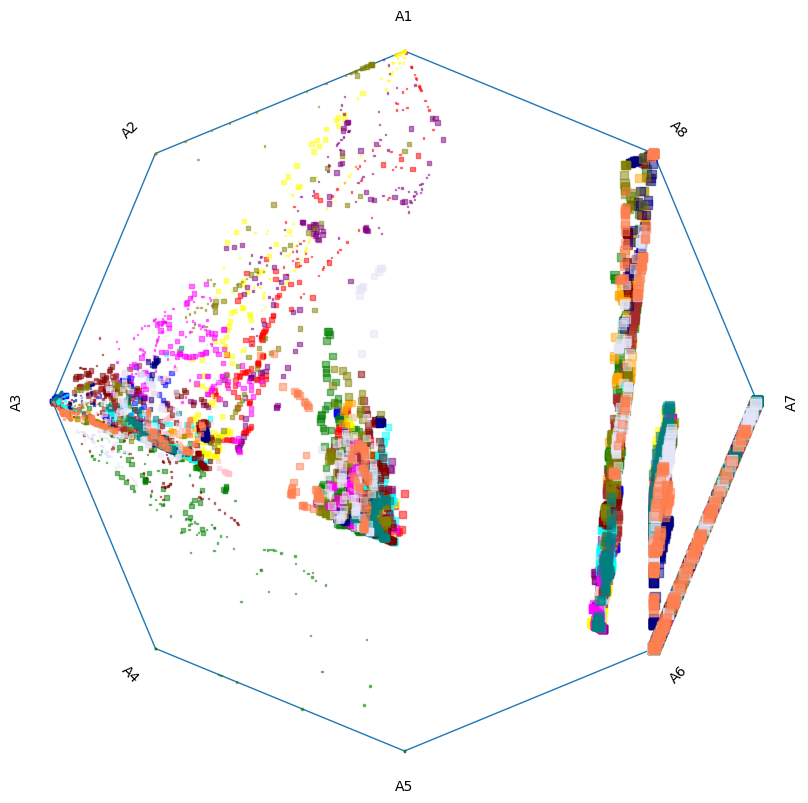

In [119]:
colors = ['Red', 'Blue', 'Green', 'Yellow', 'Orange', 'Purple', 'Pink', 'Brown', 'Cyan', 'Magenta', 'Maroon', 'Navy', 'Olive', 'Teal', 'Lavender', 'Coral']

df_args = df[['Location']].copy()
df_args['Location'] = [i.replace('Twilight','') for i in df_args['Location']]

df_args['color'] = colors[0]
uniq_locations = df_args['Location'].unique()
for i in range(len(uniq_locations)):
    df_args['color'][df_args['Location']==uniq_locations[i]] = colors[i]

df_args['size'] = [int(i.replace('L','')) for i in df['Level']]

plot_args = {'color': df_args['color'], 's': df_args['size']}

AA8.plot_simplex(AA8.alfa, plot_args)

C:\Users\nandy\AppData\Local\Temp\ipykernel_9756\11617411.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_args['color'][df_args['Twilight']==True] = 'blue'


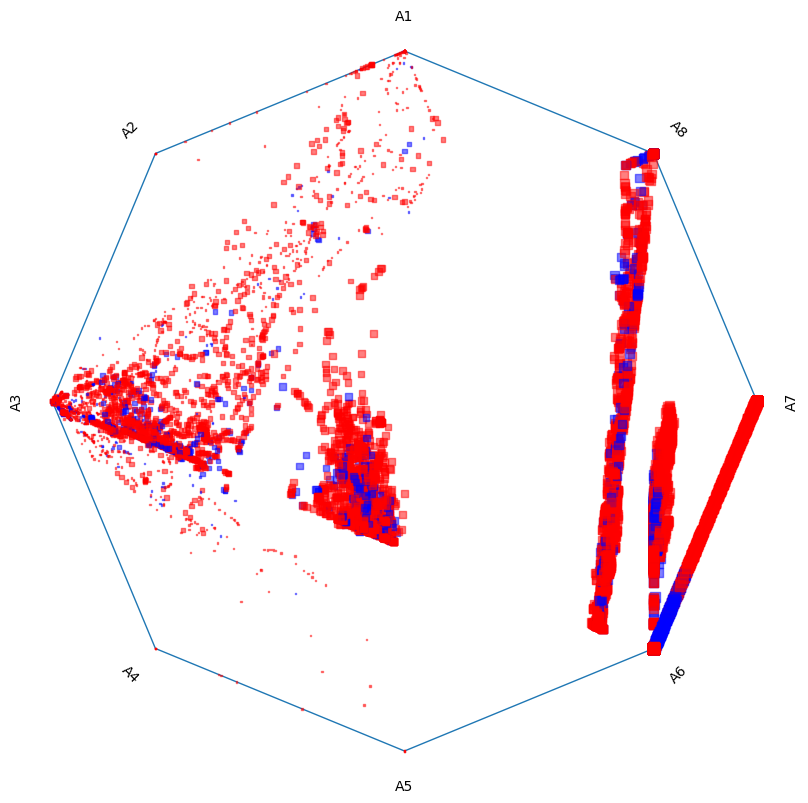

In [120]:
colors = ['Red', 'Blue']

df_args = df[['Location']].copy()
df_args['Twilight'] = [True if 'Twilight' in i else False for i in df_args['Location']]
    
df_args['color'] = 'red'
df_args['color'][df_args['Twilight']==True] = 'blue'

df_args['size'] = [int(i.replace('L','')) for i in df['Level']]

plot_args = {'color': df_args['color'], 's': df_args['size']}

AA8.plot_simplex(AA8.alfa, plot_args)

In [122]:
start_color

(0.0, 0.0, 0.5019607843137255)

In [123]:
end_color

(0.6784313725490196, 0.8470588235294118, 0.9019607843137255)

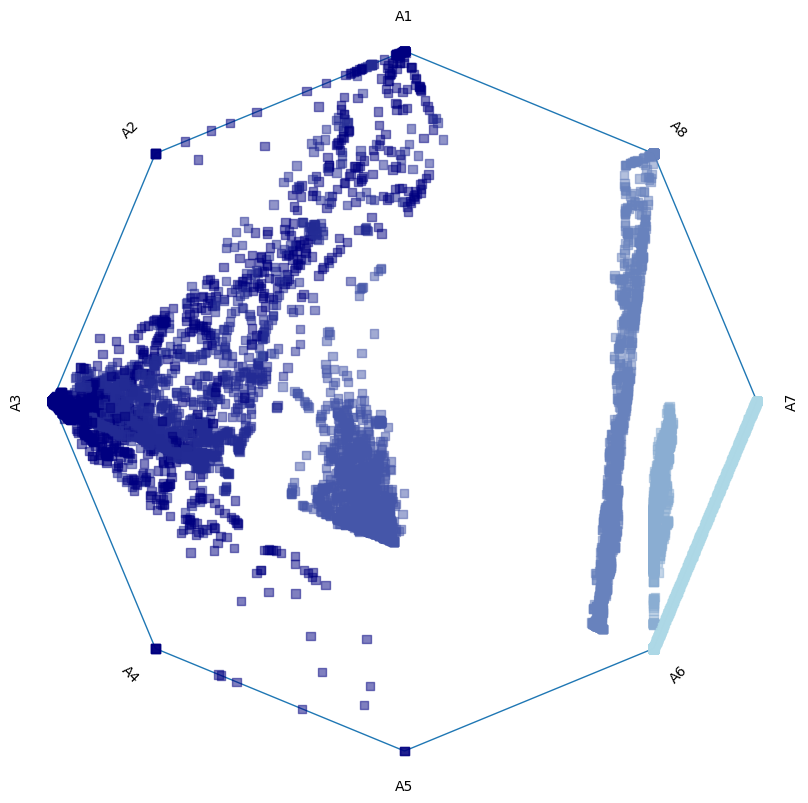

In [124]:
import matplotlib.colors as mcolors

# Define the number of colors you want
num_colors = 6

# Define the range of blue hues
start_color = np.array(mcolors.to_rgb('navy'))
end_color = np.array(mcolors.to_rgb('lightblue'))

# Generate a gradient of blue hues
colors = [mcolors.to_hex(start_color + (i / (num_colors - 1)) * (end_color - start_color)) for i in range(num_colors)]

# colors = ['Brown', 'Orange', 'Yellow', 'Purple','Blue', 'Green']

df_args = df[['Level']].copy()

df_args['color'] = colors[0]
uniq_levels = df_args['Level'].unique()
uniq_levels.sort()
for i in range(len(uniq_levels)):
    df_args['color'][df_args['Level']==uniq_levels[i]] = colors[i]
    print()

plot_args = {'color': df_args['color']}

AA8.plot_simplex(AA8.alfa, plot_args)

In [ ]:
uniq_levels

In [ ]:
df['Location'].unique()

In [ ]:
df_args

In [ ]:
df['Level'].unique()

In [ ]:
import matplotlib.pyplot as plt

# Data
numbers = [1, 10, 23, 35, 48, 56]
color_names = ['Red', 'Blue', 'Green', 'Yellow', 'Orange', 'Purple']

# Plotting
plt.bar(numbers, numbers, color=color_names)
plt.xlabel('Numbers')
plt.ylabel('Values')
plt.title('Plot with Color Labels')
plt.xticks(numbers, color_names)  # Assigning color names as tick labels
plt.show()

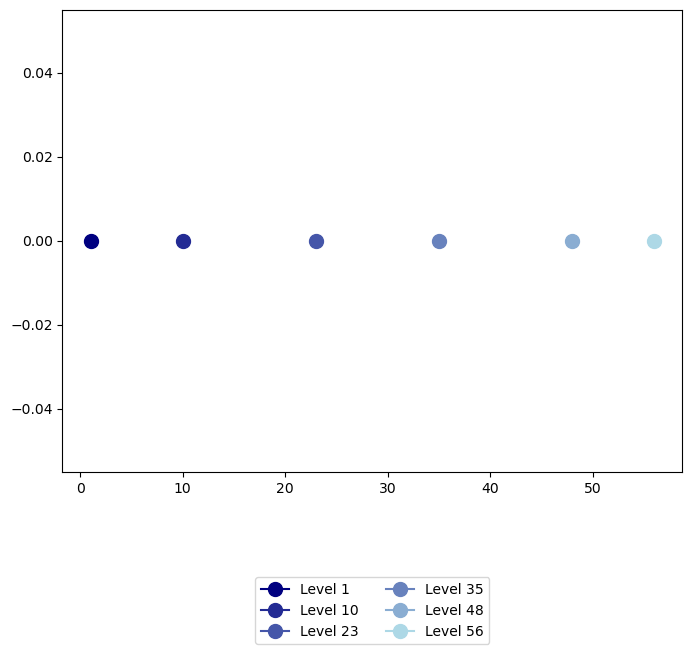

In [130]:
import matplotlib.pyplot as plt

# Data
numbers = [1, 10, 23, 35, 48, 56]
color_names = colors 
#['Red', 'Blue', 'Green', 'Yellow', 'Orange', 'Purple']

# Plotting
plt.figure(figsize=(8, 6))
for num, color in zip(numbers, color_names):
    plt.plot(num, 0, marker='o', color=color, markersize=10, label=f'Level {num}')#' - {color}')

# plt.xlim(0, max(numbers) + 10)
# plt.ylim(-1, 1)
# plt.yticks([])
# plt.xlabel('Numbers')
# plt.title('Colors associated with Numbers')
plt.legend(loc='center', bbox_to_anchor=(0.5, -0.3), ncol=2)
plt.show()


### Take a look at troposphere L1,L10,L23

In [131]:
df

Location Level            C1  \
filename                                                                   
AmazonTwilight_L10_20180101_2215.txt  AmazonTwilight   L10  0.000000e+00   
AmazonTwilight_L10_20180101_2230.txt  AmazonTwilight   L10  1.107667e-19   
AmazonTwilight_L10_20180401_2130.txt  AmazonTwilight   L10  0.000000e+00   
AmazonTwilight_L10_20180402_1015.txt  AmazonTwilight   L10  1.436701e-05   
AmazonTwilight_L10_20180702_0945.txt  AmazonTwilight   L10  2.759965e-09   
...                                              ...   ...           ...   
Utqiagvik_L56_20181001_1215.txt            Utqiagvik   L56  7.233056e-23   
Utqiagvik_L56_20181001_1315.txt            Utqiagvik   L56  7.237561e-23   
Utqiagvik_L56_20181001_1500.txt            Utqiagvik   L56  7.239111e-23   
Utqiagvik_L56_20181001_2015.txt            Utqiagvik   L56  7.209235e-23   
Utqiagvik_L56_20181001_2030.txt            Utqiagvik   L56  7.203199e-23   

                                                C2            C3  \
filename                                                           
AmazonTwilight_L10_20180101_2215.txt  1.200019e-09  2.552670e+00   
AmazonTwilight_L10_20180101_2230.txt  1.321647e-09  2.671705e+00   
AmazonTwilight_L10_20180401_2130.txt  9.898434e-08  3.806718e+00   
AmazonTwilight_L10_20180402_1015.txt  4.475333e-05  1.702778e+01   
AmazonTwilight_L10_20180702_0945.txt  2.622172e-08  2.930876e-02   
...                                            ...           ...   
Utqiagvik_L56_20181001_1215.txt       8.772422e-23  1.098368e-22   
Utqiagvik_L56_20181001_1315.txt       8.777887e-23  1.099052e-22   
Utqiagvik_L56_20181001_1500.txt       8.779766e-23  1.099288e-22   
Utqiagvik_L56_20181001_2015.txt       8.743531e-23  1.094751e-22   
Utqiagvik_L56_20181001_2030.txt       8.736211e-23  1.093834e-22   

                                                C4            C5   C6  \
filename                                                                
AmazonTwilight_L10_20180101_2215.txt  5.595636e+06  5.904771e+06  0.0   
AmazonTwilight_L10_20180101_2230.txt  5.642886e+06  5.984096e+06  0.0   
AmazonTwilight_L10_20180401_2130.txt  2.476942e+06  3.894954e+06  0.0   
AmazonTwilight_L10_20180402_1015.txt  2.989333e+06  4.103141e+06  0.0   
AmazonTwilight_L10_20180702_0945.txt  5.300508e+06  1.313549e+07  0.0   
...                                            ...           ...  ...   
Utqiagvik_L56_20181001_1215.txt       3.582395e+04  5.862016e+00  0.0   
Utqiagvik_L56_20181001_1315.txt       3.584647e+04  5.868155e+00  0.0   
Utqiagvik_L56_20181001_1500.txt       3.584991e+04  6.020692e+00  0.0   
Utqiagvik_L56_20181001_2015.txt       3.567527e+04  6.879503e+00  0.0   
Utqiagvik_L56_20181001_2030.txt       3.564453e+04  6.903848e+00  0.0   

                                                C7            C8  ...  \
filename                                                          ...   
AmazonTwilight_L10_20180101_2215.txt  1.923675e+09  3.278016e+06  ...   
AmazonTwilight_L10_20180101_2230.txt  1.936083e+09  3.282836e+06  ...   
AmazonTwilight_L10_20180401_2130.txt  3.747047e+08  1.663567e+06  ...   
AmazonTwilight_L10_20180402_1015.txt  6.483815e+08  1.770847e+06  ...   
AmazonTwilight_L10_20180702_0945.txt  3.750489e+09  1.277451e+06  ...   
...                                            ...           ...  ...   
Utqiagvik_L56_20181001_1215.txt       3.737933e+05  4.665603e+01  ...   
Utqiagvik_L56_20181001_1315.txt       3.740261e+05  4.668482e+01  ...   
Utqiagvik_L56_20181001_1500.txt       3.741306e+05  4.668765e+01  ...   
Utqiagvik_L56_20181001_2015.txt       3.727390e+05  4.644934e+01  ...   
Utqiagvik_L56_20181001_2030.txt       3.724306e+05  4.640941e+01  ...   

                                              C282          C283  \
filename                                                           
AmazonTwilight_L10_20180101_2215.txt  1.685365e+08  9.074856e+04   
AmazonTwilight_L10_20180101_2230.txt  1.701018e+08  8.943312e+04  

In [132]:
#AA8 for 3 levels of data
# Filter the dataframe
df_lower = df[(df['Level'] == 'L1') | (df['Level'] == 'L10') | (df['Level'] == 'L23')].copy()

# Display the resulting dataframe
df_lower

Location Level            C1  \
filename                                                                   
AmazonTwilight_L10_20180101_2215.txt  AmazonTwilight   L10  0.000000e+00   
AmazonTwilight_L10_20180101_2230.txt  AmazonTwilight   L10  1.107667e-19   
AmazonTwilight_L10_20180401_2130.txt  AmazonTwilight   L10  0.000000e+00   
AmazonTwilight_L10_20180402_1015.txt  AmazonTwilight   L10  1.436701e-05   
AmazonTwilight_L10_20180702_0945.txt  AmazonTwilight   L10  2.759965e-09   
...                                              ...   ...           ...   
Utqiagvik_L23_20181001_1300.txt            Utqiagvik   L23  1.828555e-20   
Utqiagvik_L23_20181001_1500.txt            Utqiagvik   L23  1.826674e-20   
Utqiagvik_L23_20181001_1900.txt            Utqiagvik   L23  1.823463e-20   
Utqiagvik_L23_20181001_1915.txt            Utqiagvik   L23  1.823088e-20   
Utqiagvik_L23_20181001_1930.txt            Utqiagvik   L23  1.822719e-20   

                                                C2         C3            C4  \
filename                                                                      
AmazonTwilight_L10_20180101_2215.txt  1.200019e-09   2.552670  5.595636e+06   
AmazonTwilight_L10_20180101_2230.txt  1.321647e-09   2.671705  5.642886e+06   
AmazonTwilight_L10_20180401_2130.txt  9.898434e-08   3.806718  2.476942e+06   
AmazonTwilight_L10_20180402_1015.txt  4.475333e-05  17.027778  2.989333e+06   
AmazonTwilight_L10_20180702_0945.txt  2.622172e-08   0.029309  5.300508e+06   
...                                            ...        ...           ...   
Utqiagvik_L23_20181001_1300.txt       1.459133e-06   1.959840  1.108138e+07   
Utqiagvik_L23_20181001_1500.txt       3.434778e-06   1.847023  1.022415e+07   
Utqiagvik_L23_20181001_1900.txt       8.648091e-06   1.599581  8.897949e+06   
Utqiagvik_L23_20181001_1915.txt       7.628462e-06   1.539135  8.791304e+06   
Utqiagvik_L23_20181001_1930.txt       6.596135e-06   1.473275  8.679968e+06   

                                                C5   C6            C7  \
filename                                                                
AmazonTwilight_L10_20180101_2215.txt  5.904771e+06  0.0  1.923675e+09   
AmazonTwilight_L10_20180101_2230.txt  5.984096e+06  0.0  1.936083e+09   
AmazonTwilight_L10_20180401_2130.txt  3.894954e+06  0.0  3.747047e+08   
AmazonTwilight_L10_20180402_1015.txt  4.103141e+06  0.0  6.483815e+08   
AmazonTwilight_L10_20180702_0945.txt  1.313549e+07  0.0  3.750489e+09   
...                                            ...  ...           ...   
Utqiagvik_L23_20181001_1300.txt       1.190853e+07  0.0  1.575092e+08   
Utqiagvik_L23_20181001_1500.txt       1.192942e+07  0.0  1.577682e+08   
Utqiagvik_L23_20181001_1900.txt       1.198050e+07  0.0  1.577266e+08   
Utqiagvik_L23_20181001_1915.txt       1.198668e+07  0.0  1.577919e+08   
Utqiagvik_L23_20181001_1930.txt       1.199308e+07  0.0  1.578713e+08   

                                                C8  ...          C282  \
filename                                            ...                 
AmazonTwilight_L10_20180101_2215.txt  3.278016e+06  ...  1.685365e+08   
AmazonTwilight_L10_20180101_2230.txt  3.282836e+06  ...  1.701018e+08   
AmazonTwilight_L10_20180401_2130.txt  1.663567e+06  ...  2.453067e+07   
AmazonTwilight_L10_20180402_1015.txt  1.770847e+06  ...  1.231279e+07   
AmazonTwilight_L10_20180702_0945.txt  1.277451e+06  ...  1.716494e+08   
...                                            ...  ...           ...   
Utqiagvik_L23_20181001_1300.txt       1.280974e+05  ...  7.483462e+06   
Utqiagvik_L23_20181001_1500.txt       1.323246e+05  ...  7.362542e+06   
Utqiagvik_L23_20181001_1900.txt       1.393158e+05  ...  7.338773e+06   
Utqiagvik_L23_20181001_1915.txt       1.396724e+05  ...  7.317821e+06   
Utqiagvik_L23_20181001_1930.txt       1.400278e+05  ...  7.295629e+06   

                                              C283          C284        C285  \
filename                                       

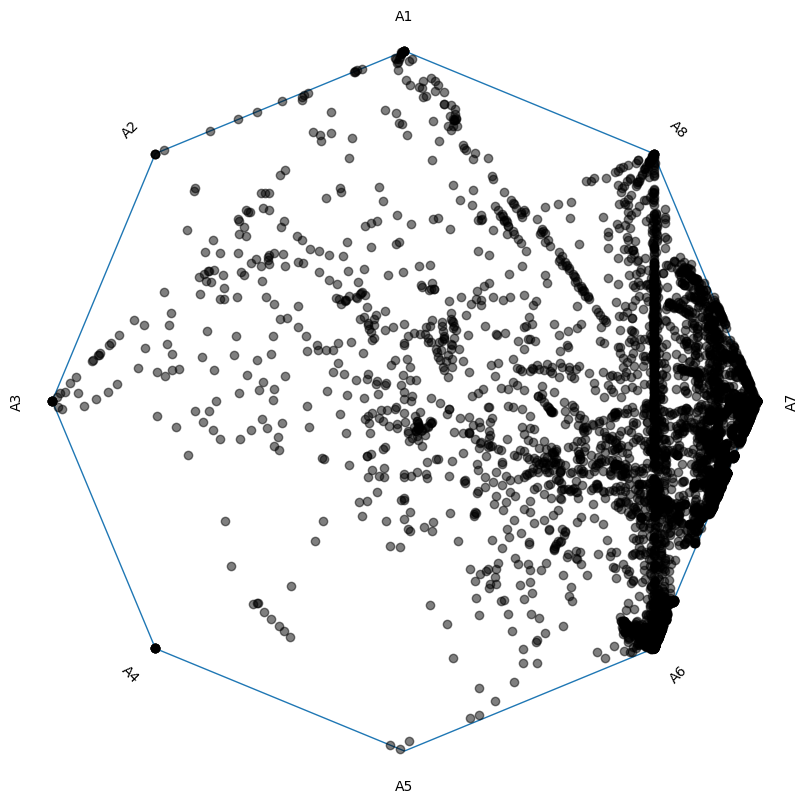

In [133]:
lst_feat = ['C'+str(i) for i in range(1,len(df_lower.columns)+1-2)]
sc = StandardScaler()
X = df_lower[lst_feat].values
X_scaled = sc.fit_transform(X)

AA8 = ArchetypalAnalysis(n_archetypes = 8, 
                        tolerance = 0.001, 
                        max_iter = 200, 
                        random_state = 0, 
                        C = 0.0001, 
                        initialize = 'random',
                        redundancy_try = 30)
AA8.fit(X_scaled)
AA8.plot_simplex(AA8.alfa)

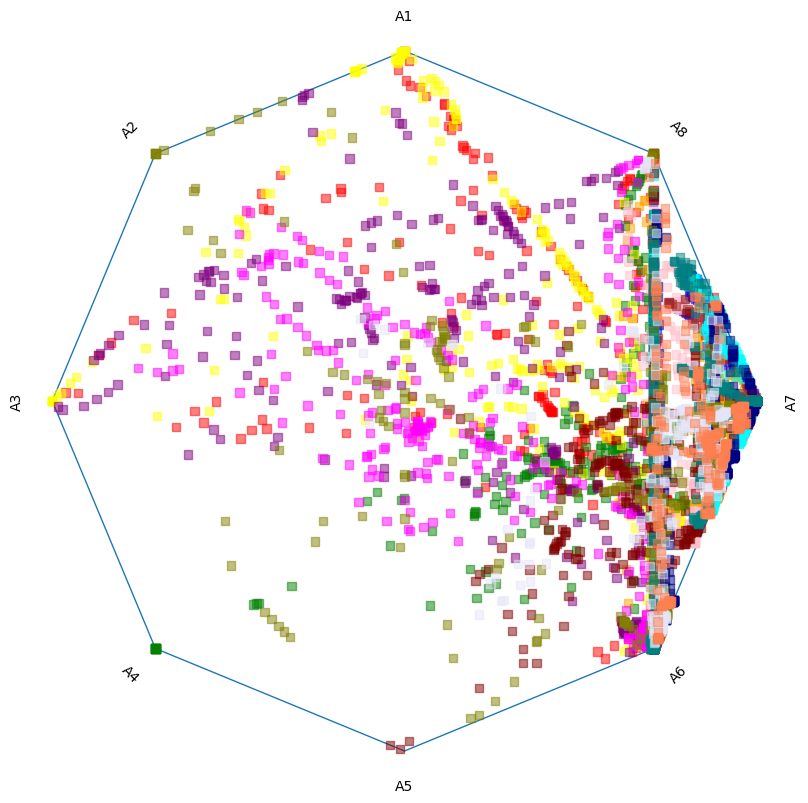

In [134]:
colors = ['Red', 'Blue', 'Green', 'Yellow', 'Orange', 'Purple', 'Pink', 'Brown', 'Cyan', 'Magenta', 'Maroon', 'Navy', 'Olive', 'Teal', 'Lavender', 'Coral']

df_args = df_lower[['Location']].copy()
df_args['Location'] = [i.replace('Twilight','') for i in df_args['Location']]

df_args['color'] = colors[0]
uniq_locations = df_args['Location'].unique()
for i in range(len(uniq_locations)):
    df_args['color'][df_args['Location']==uniq_locations[i]] = colors[i]

# df_args['size'] = [int(i.replace('L','')) for i in df_lower['Level']]

plot_args = {'color': df_args['color']}#, 's': df_args['size']}

AA8.plot_simplex(AA8.alfa, plot_args)

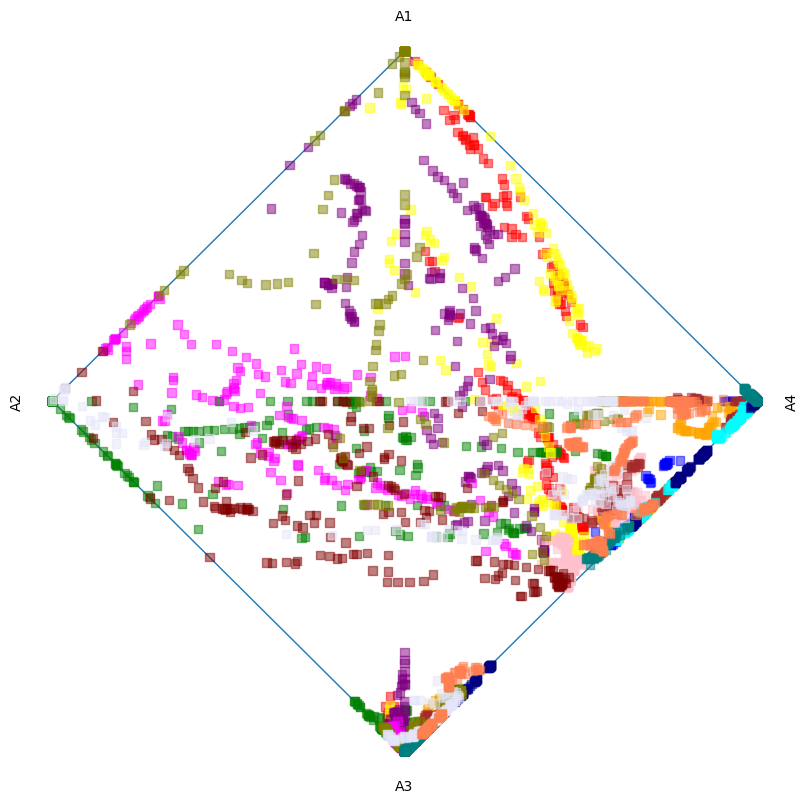

In [135]:
AA4 = ArchetypalAnalysis(n_archetypes = 4, 
                        tolerance = 0.001, 
                        max_iter = 200, 
                        random_state = 0, 
                        C = 0.0001, 
                        initialize = 'random',
                        redundancy_try = 30)
AA4.fit(X_scaled)
AA4.plot_simplex(AA4.alfa, plot_args)

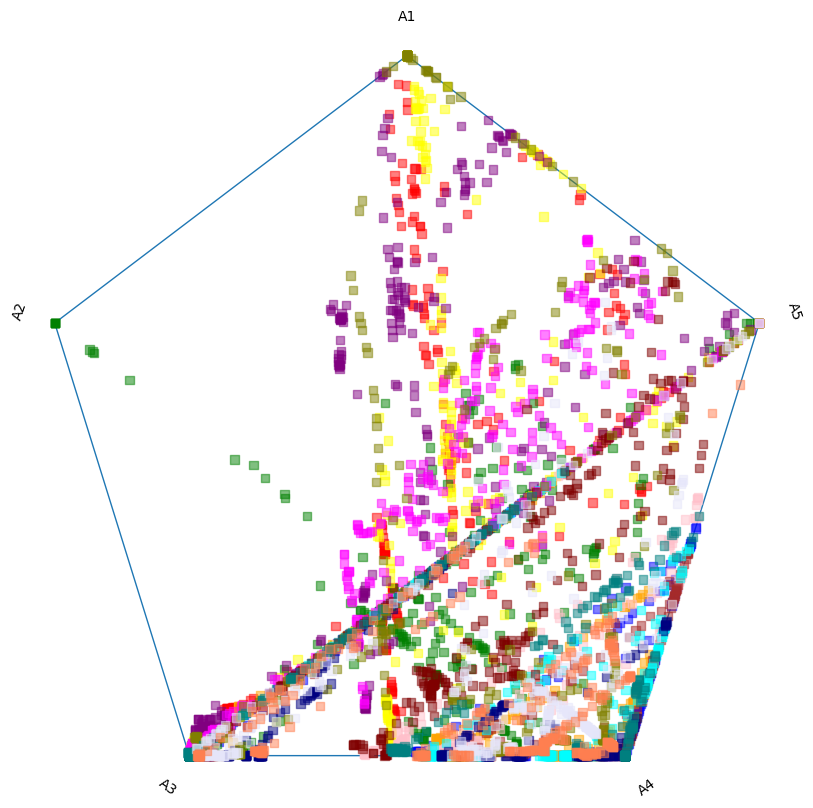

In [136]:
AA5 = ArchetypalAnalysis(n_archetypes = 5, 
                        tolerance = 0.001, 
                        max_iter = 200, 
                        random_state = 0, 
                        C = 0.0001, 
                        initialize = 'random',
                        redundancy_try = 30)
AA5.fit(X_scaled)
AA5.plot_simplex(AA5.alfa, plot_args)

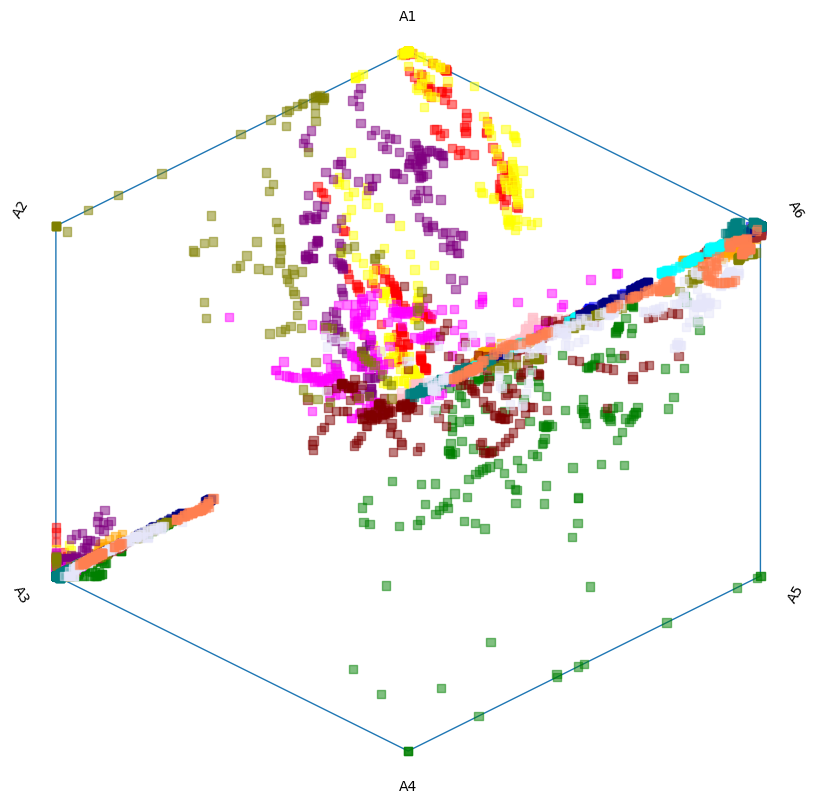

In [137]:
AA6 = ArchetypalAnalysis(n_archetypes = 6, 
                        tolerance = 0.001, 
                        max_iter = 200, 
                        random_state = 0, 
                        C = 0.0001, 
                        initialize = 'random',
                        redundancy_try = 30)
AA6.fit(X_scaled)
AA6.plot_simplex(AA6.alfa, plot_args)

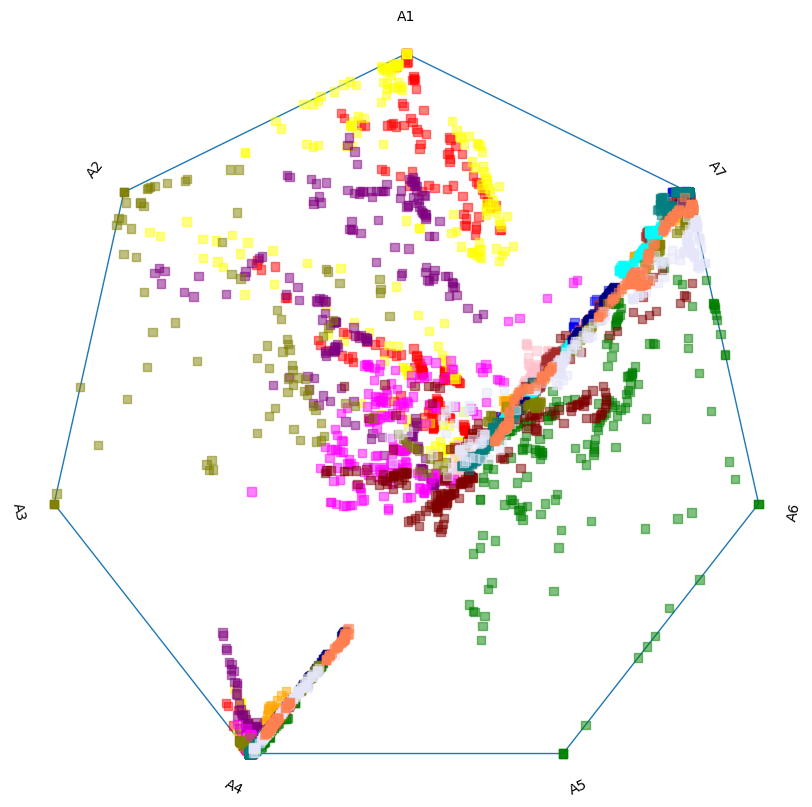

In [138]:
AA7 = ArchetypalAnalysis(n_archetypes = 7, 
                        tolerance = 0.001, 
                        max_iter = 200, 
                        random_state = 0, 
                        C = 0.0001, 
                        initialize = 'random',
                        redundancy_try = 30)
AA7.fit(X_scaled)
AA7.plot_simplex(AA7.alfa, plot_args)

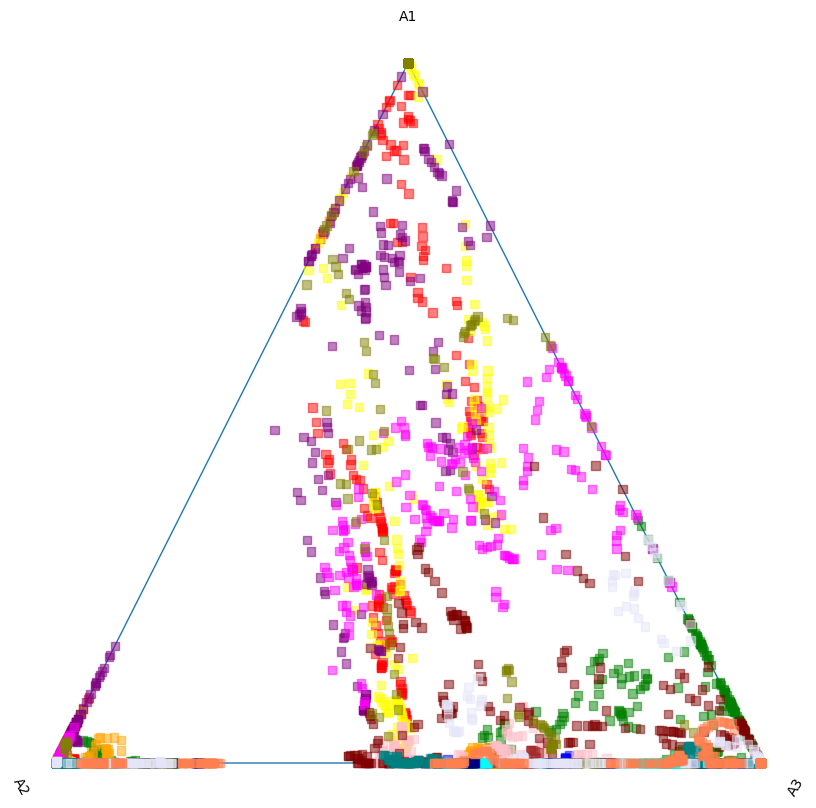

In [139]:
AA3 = ArchetypalAnalysis(n_archetypes = 3, 
                        tolerance = 0.001, 
                        max_iter = 200, 
                        random_state = 0, 
                        C = 0.0001, 
                        initialize = 'random',
                        redundancy_try = 30)
AA3.fit(X_scaled)
AA3.plot_simplex(AA3.alfa, plot_args)

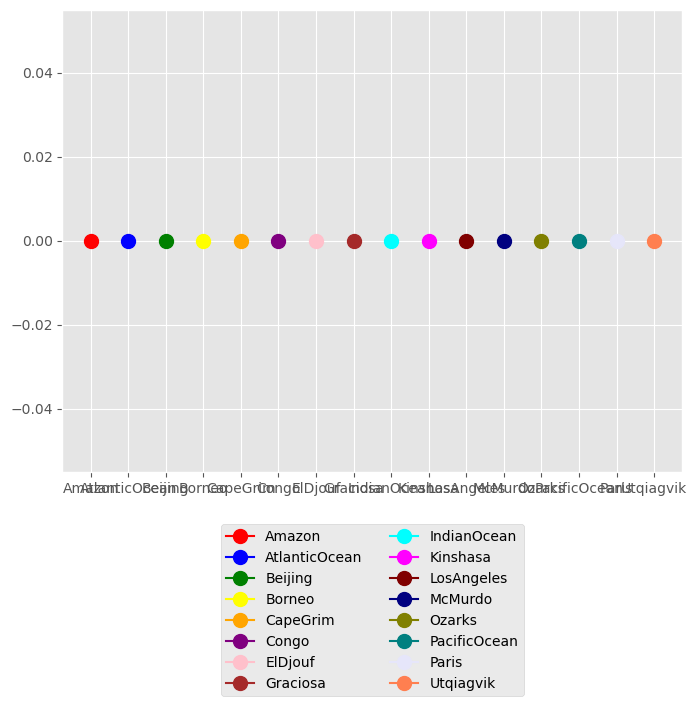

In [177]:
import matplotlib.pyplot as plt

# Data
# numbers = [1, 10, 23, 35, 48, 56]
colors = ['Red', 'Blue', 'Green', 'Yellow', 'Orange', 'Purple', 'Pink', 'Brown', 'Cyan', 'Magenta', 'Maroon', 'Navy', 'Olive', 'Teal', 'Lavender', 'Coral']

df_args = df_lower[['Location']].copy()
df_args['Location'] = [i.replace('Twilight','') for i in df_args['Location']]

df_args['color'] = colors[0]
uniq_locations = df_args['Location'].unique()
# Plotting
plt.figure(figsize=(8, 6))
for num, color in zip(uniq_locations, colors):
    plt.plot(num, 0, marker='o', color=color, markersize=10, label=f'{num}')
             #- {color}')

plt.legend(loc='center', bbox_to_anchor=(0.5, -0.3), ncol=2)
plt.show()

In [141]:
uniq_locations

array(['Amazon', 'AtlanticOcean', 'Beijing', 'Borneo', 'CapeGrim',
       'Congo', 'ElDjouf', 'Graciosa', 'IndianOcean', 'Kinshasa',
       'LosAngeles', 'McMurdo', 'Ozarks', 'PacificOcean', 'Paris',
       'Utqiagvik'], dtype=object)

### Color coding the locations into the regions

In [142]:
# RGB values for each region
region_color = {
    "Ocean": (0.2154516905067, 0.295, 0.5078367867510504),
    "Desert": (0.78, 0.51, 0.1892045842),
    "Biogenic": (0.12071162840208301, 0.4357915995132193, 0.2463679091477368),
    "Urban": (0.7, 0.7, 0.65),
    "Almost Polar": (0.5184891135337089, 0.7194769933793438, 0.7518803726887796),
    "Polar": (0.5632111255041908, 0.758620966612444, 0.7764634182455044)
}

# Region for each location
location_to_region = {
    'Amazon': 'Biogenic',
    'AtlanticOcean': 'Ocean',
    'Beijing': 'Urban',
    'Borneo': 'Biogenic',
    'CapeGrim': 'Polar',
    'Congo': 'Biogenic',
    'ElDjouf': 'Desert',
    'Graciosa': 'Ocean',
    'IndianOcean': 'Ocean',
    'Kinshasa': 'Urban',
    'LosAngeles': 'Urban',
    'McMurdo': 'Polar',
    'Ozarks': 'Biogenic',
    'PacificOcean': 'Ocean',
    'Paris': 'Urban',
    'Utqiagvik': 'Almost Polar'
}

In [143]:
print(df_lower)

                                            Location Level            C1  \
filename                                                                   
AmazonTwilight_L10_20180101_2215.txt  AmazonTwilight   L10  0.000000e+00   
AmazonTwilight_L10_20180101_2230.txt  AmazonTwilight   L10  1.107667e-19   
AmazonTwilight_L10_20180401_2130.txt  AmazonTwilight   L10  0.000000e+00   
AmazonTwilight_L10_20180402_1015.txt  AmazonTwilight   L10  1.436701e-05   
AmazonTwilight_L10_20180702_0945.txt  AmazonTwilight   L10  2.759965e-09   
...                                              ...   ...           ...   
Utqiagvik_L23_20181001_1300.txt            Utqiagvik   L23  1.828555e-20   
Utqiagvik_L23_20181001_1500.txt            Utqiagvik   L23  1.826674e-20   
Utqiagvik_L23_20181001_1900.txt            Utqiagvik   L23  1.823463e-20   
Utqiagvik_L23_20181001_1915.txt            Utqiagvik   L23  1.823088e-20   
Utqiagvik_L23_20181001_1930.txt            Utqiagvik   L23  1.822719e-20   

           

In [144]:
# Add a new column 'twilight' to df_lower
df_lower['Twilight'] = df_lower['Location'].apply(lambda x: True if 'twilight' in x.lower() else False)

# Modify location names to remove 'twilight'
df_lower['Location'] = df_lower['Location'].apply(lambda x: x.split('_')[0].replace('Twilight', ''))

# Adding the 'region' column based on the 'location' column
df_lower['Region'] = df_lower['Location'].map(location_to_region)

# Displaying the DataFrame with the new columns
df_lower

Location Level            C1  \
filename                                                              
AmazonTwilight_L10_20180101_2215.txt     Amazon   L10  0.000000e+00   
AmazonTwilight_L10_20180101_2230.txt     Amazon   L10  1.107667e-19   
AmazonTwilight_L10_20180401_2130.txt     Amazon   L10  0.000000e+00   
AmazonTwilight_L10_20180402_1015.txt     Amazon   L10  1.436701e-05   
AmazonTwilight_L10_20180702_0945.txt     Amazon   L10  2.759965e-09   
...                                         ...   ...           ...   
Utqiagvik_L23_20181001_1300.txt       Utqiagvik   L23  1.828555e-20   
Utqiagvik_L23_20181001_1500.txt       Utqiagvik   L23  1.826674e-20   
Utqiagvik_L23_20181001_1900.txt       Utqiagvik   L23  1.823463e-20   
Utqiagvik_L23_20181001_1915.txt       Utqiagvik   L23  1.823088e-20   
Utqiagvik_L23_20181001_1930.txt       Utqiagvik   L23  1.822719e-20   

                                                C2         C3            C4  \
filename                                                                      
AmazonTwilight_L10_20180101_2215.txt  1.200019e-09   2.552670  5.595636e+06   
AmazonTwilight_L10_20180101_2230.txt  1.321647e-09   2.671705  5.642886e+06   
AmazonTwilight_L10_20180401_2130.txt  9.898434e-08   3.806718  2.476942e+06   
AmazonTwilight_L10_20180402_1015.txt  4.475333e-05  17.027778  2.989333e+06   
AmazonTwilight_L10_20180702_0945.txt  2.622172e-08   0.029309  5.300508e+06   
...                                            ...        ...           ...   
Utqiagvik_L23_20181001_1300.txt       1.459133e-06   1.959840  1.108138e+07   
Utqiagvik_L23_20181001_1500.txt       3.434778e-06   1.847023  1.022415e+07   
Utqiagvik_L23_20181001_1900.txt       8.648091e-06   1.599581  8.897949e+06   
Utqiagvik_L23_20181001_1915.txt       7.628462e-06   1.539135  8.791304e+06   
Utqiagvik_L23_20181001_1930.txt       6.596135e-06   1.473275  8.679968e+06   

                                                C5   C6            C7  \
filename                                                                
AmazonTwilight_L10_20180101_2215.txt  5.904771e+06  0.0  1.923675e+09   
AmazonTwilight_L10_20180101_2230.txt  5.984096e+06  0.0  1.936083e+09   
AmazonTwilight_L10_20180401_2130.txt  3.894954e+06  0.0  3.747047e+08   
AmazonTwilight_L10_20180402_1015.txt  4.103141e+06  0.0  6.483815e+08   
AmazonTwilight_L10_20180702_0945.txt  1.313549e+07  0.0  3.750489e+09   
...                                            ...  ...           ...   
Utqiagvik_L23_20181001_1300.txt       1.190853e+07  0.0  1.575092e+08   
Utqiagvik_L23_20181001_1500.txt       1.192942e+07  0.0  1.577682e+08   
Utqiagvik_L23_20181001_1900.txt       1.198050e+07  0.0  1.577266e+08   
Utqiagvik_L23_20181001_1915.txt       1.198668e+07  0.0  1.577919e+08   
Utqiagvik_L23_20181001_1930.txt       1.199308e+07  0.0  1.578713e+08   

                                                C8  ...          C284  \
filename                                            ...                 
AmazonTwilight_L10_20180101_2215.txt  3.278016e+06  ...  9.747906e+01   
AmazonTwilight_L10_20180101_2230.txt  3.282836e+06  ...  1.325201e+01   
AmazonTwilight_L10_20180401_2130.txt  1.663567e+06  ...  5.261566e+02   
AmazonTwilight_L10_20180402_1015.txt  1.770847e+06  ...  2.582485e+01   
AmazonTwilight_L10_20180702_0945.txt  1.277451e+06  ...  2.944680e-08   
...                                            ...  ...           ...   
Utqiagvik_L23_20181001_1300.txt       1.280974e+05  ...  5.862061e-11   
Utqiagvik_L23_20181001_1500.txt       1.323246e+05  ...  5.490636e-11   
Utqiagvik_L23_20181001_1900.txt       1.393158e+05  ...  5.647511e+03   
Utqiagvik_L23_20181001_1915.txt       1.396724e+05  ...  6.094434e+03   
Utqiagvik_L23_20181001_1930.txt       1.400278e+05  ...  6.474302e+03   

                                            C285          C286           C287  \
filename                                                                        
AmazonTwilight_L10_201801

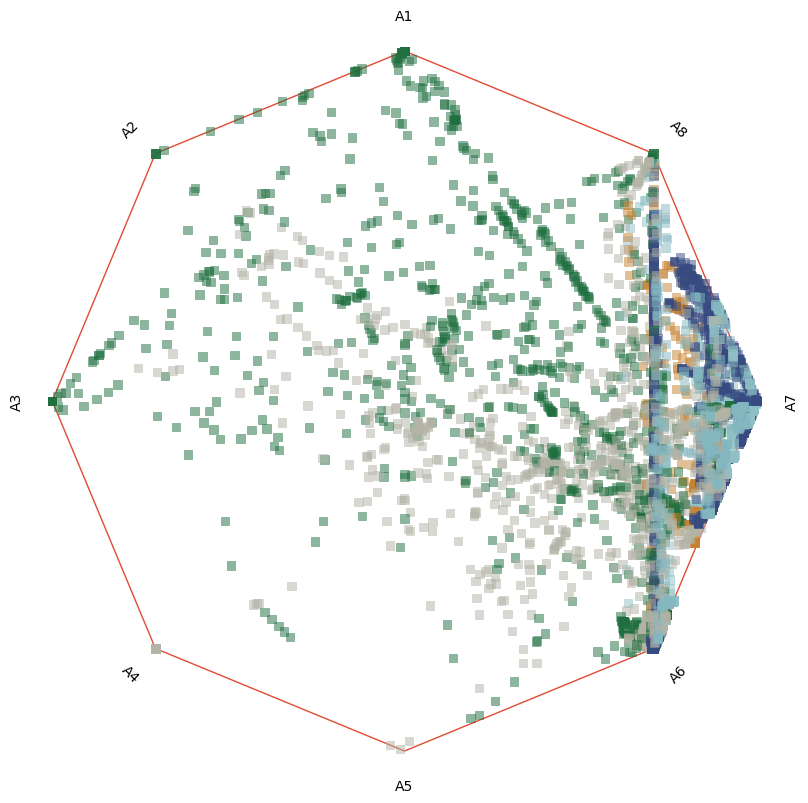

In [170]:
from archetypes import *

df_args = df_lower[['Region']].copy()
df_args['color'] = df_args['Region'].map(region_color)

plot_args = {'color': df_args['color']}

AA8.plot_simplex(AA8.alfa, plot_args)

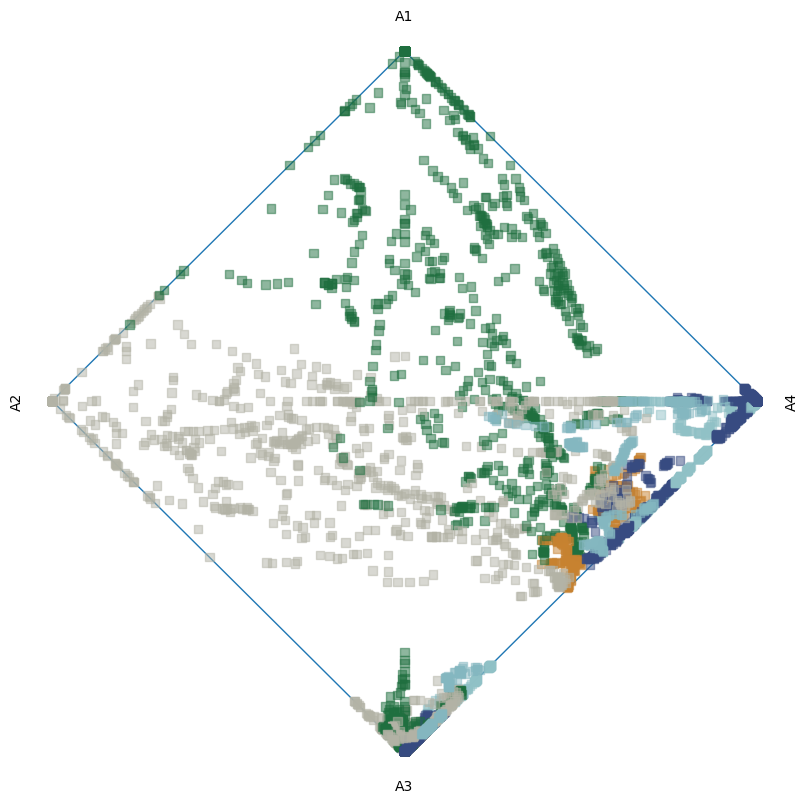

In [146]:
AA4.plot_simplex(AA4.alfa, plot_args)

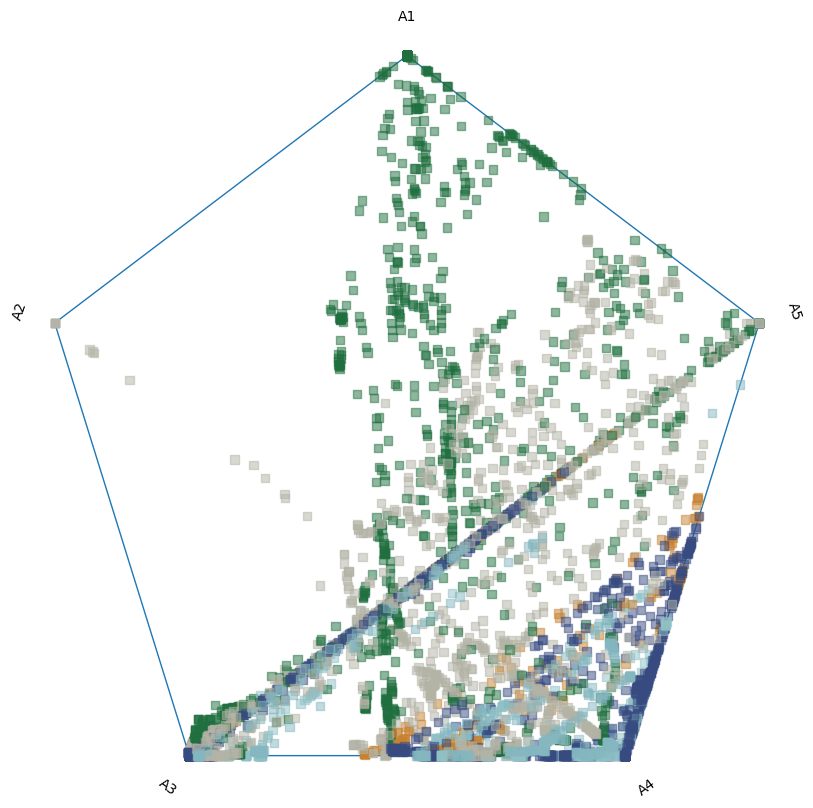

In [147]:
AA5.plot_simplex(AA5.alfa, plot_args)

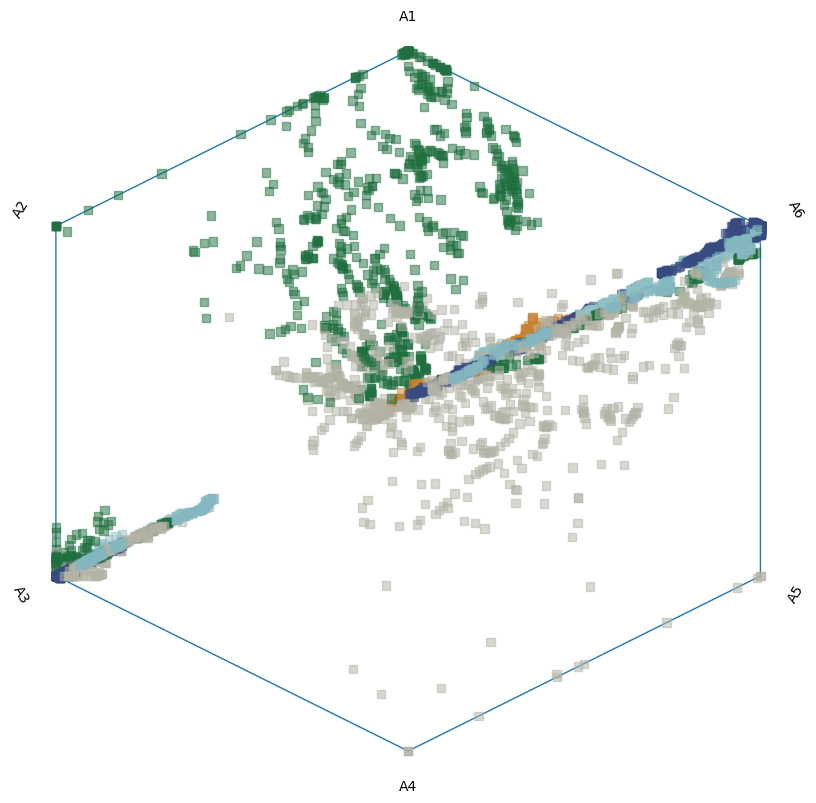

In [148]:
AA6.plot_simplex(AA6.alfa, plot_args)

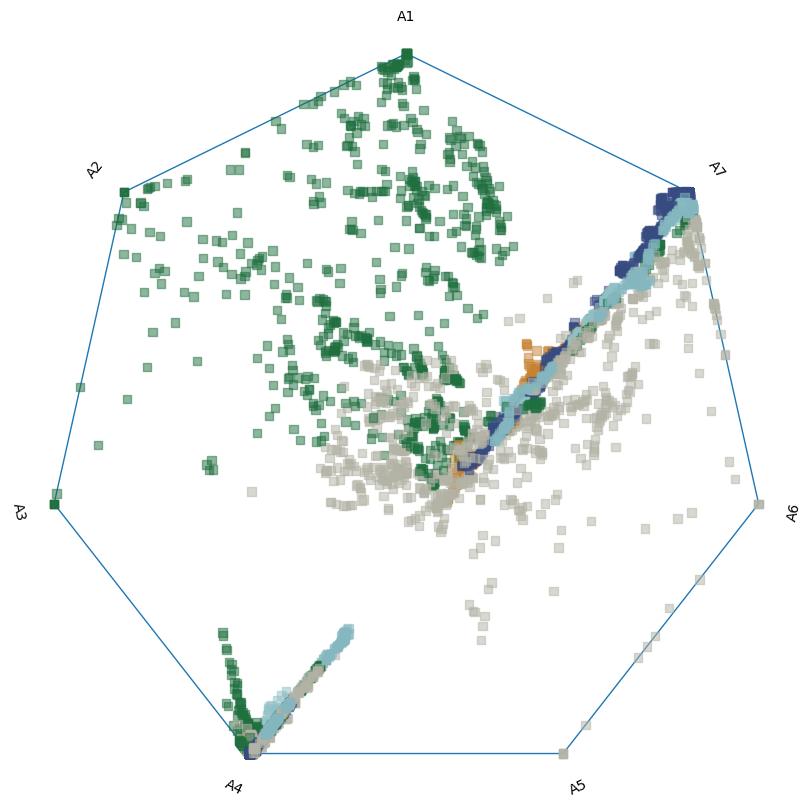

In [149]:
AA7.plot_simplex(AA7.alfa, plot_args)

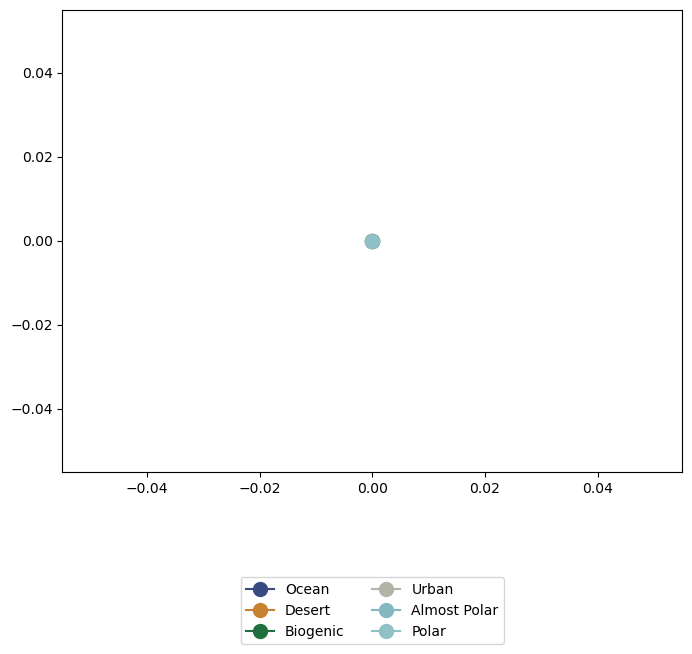

In [153]:
import matplotlib.pyplot as plt

# Assuming region_color is your dictionary

# Data
uniq_locations = list(region_color.keys())

# Plotting
plt.figure(figsize=(8, 6))
for location, color in region_color.items():
    plt.plot(0, 0, marker='o', color=color, markersize=10, label=f'{location}') #' - {color}')

plt.legend(loc='center', bbox_to_anchor=(0.5, -0.3), ncol=2)
plt.show()

In [151]:
plot_args

{'color': filename
 AmazonTwilight_L10_20180101_2215.txt    (0.12071162840208301, 0.4357915995132193, 0.24...
 AmazonTwilight_L10_20180101_2230.txt    (0.12071162840208301, 0.4357915995132193, 0.24...
 AmazonTwilight_L10_20180401_2130.txt    (0.12071162840208301, 0.4357915995132193, 0.24...
 AmazonTwilight_L10_20180402_1015.txt    (0.12071162840208301, 0.4357915995132193, 0.24...
 AmazonTwilight_L10_20180702_0945.txt    (0.12071162840208301, 0.4357915995132193, 0.24...
                                                               ...                        
 Utqiagvik_L23_20181001_1300.txt         (0.5184891135337089, 0.7194769933793438, 0.751...
 Utqiagvik_L23_20181001_1500.txt         (0.5184891135337089, 0.7194769933793438, 0.751...
 Utqiagvik_L23_20181001_1900.txt         (0.5184891135337089, 0.7194769933793438, 0.751...
 Utqiagvik_L23_20181001_1915.txt         (0.5184891135337089, 0.7194769933793438, 0.751...
 Utqiagvik_L23_20181001_1930.txt         (0.5184891135337089, 0.7194769

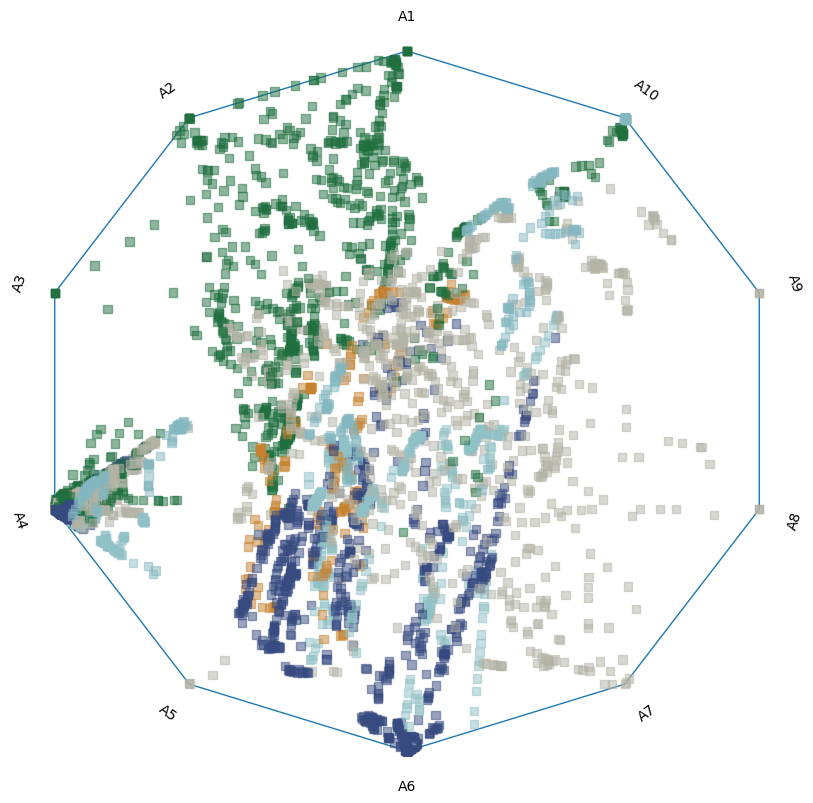

In [152]:
AA10 = ArchetypalAnalysis(n_archetypes = 10, 
                        tolerance = 0.001, 
                        max_iter = 200, 
                        random_state = 0, 
                        C = 0.0001, 
                        initialize = 'random',
                        redundancy_try = 30)
AA10.fit(X_scaled)
AA10.plot_simplex(AA10.alfa, plot_args)

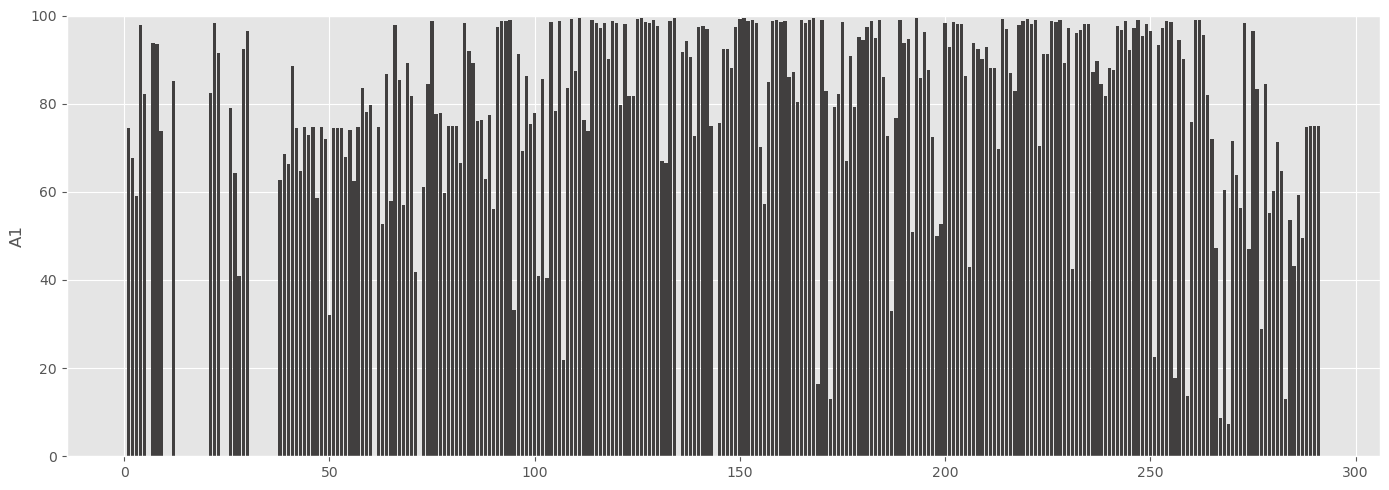

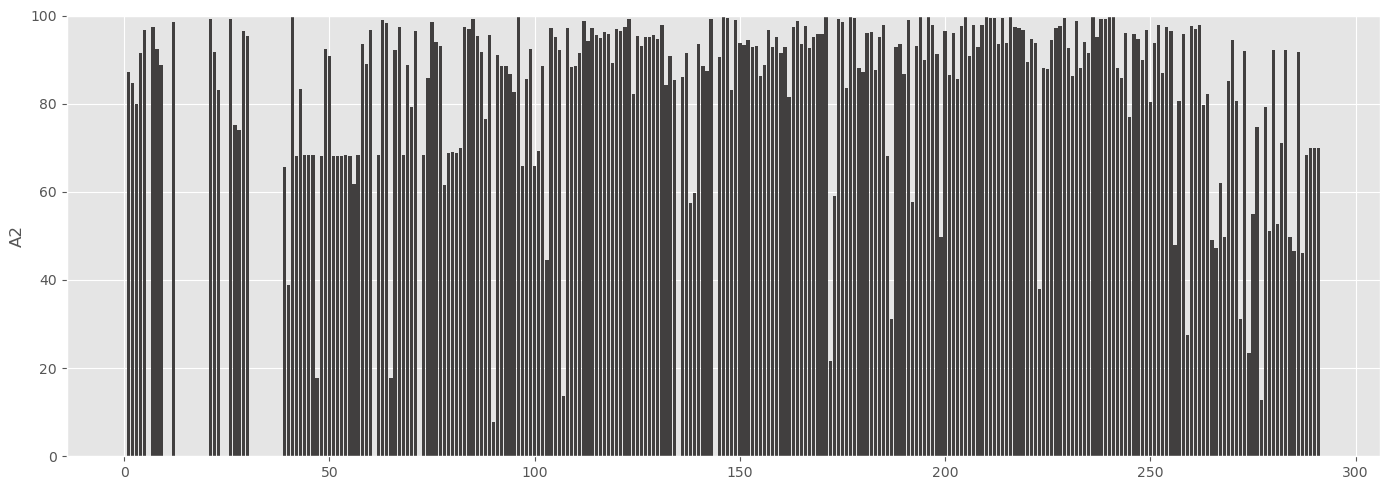

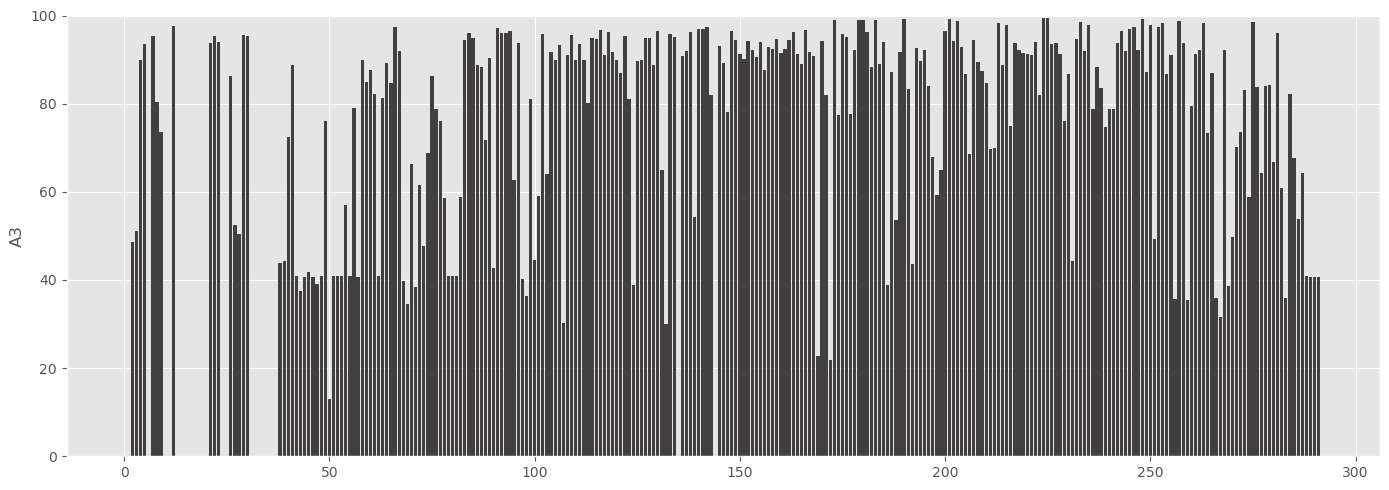

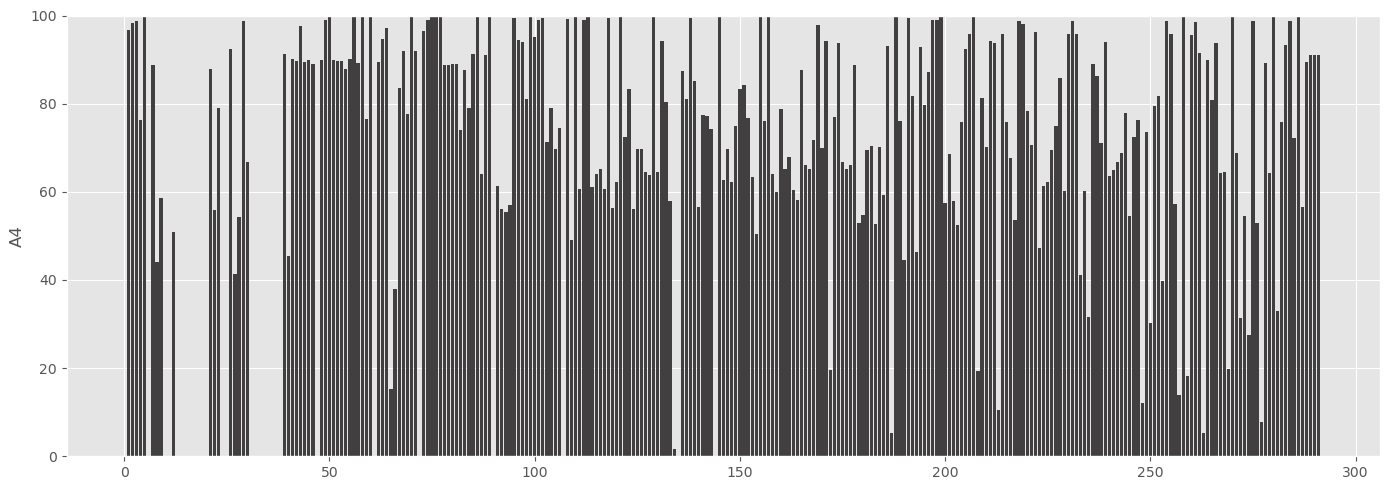

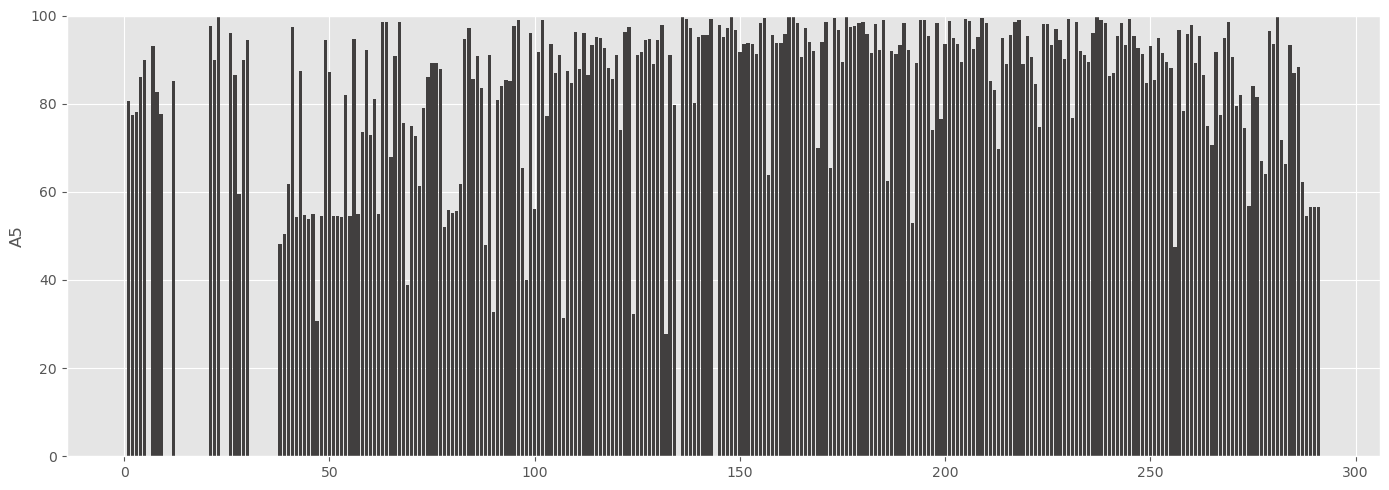

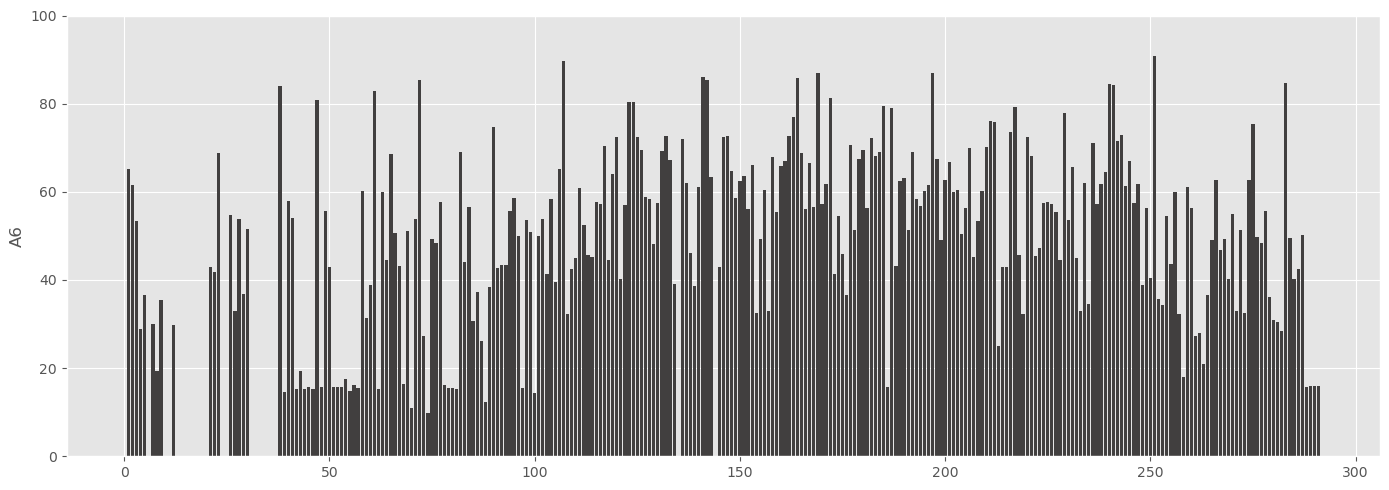

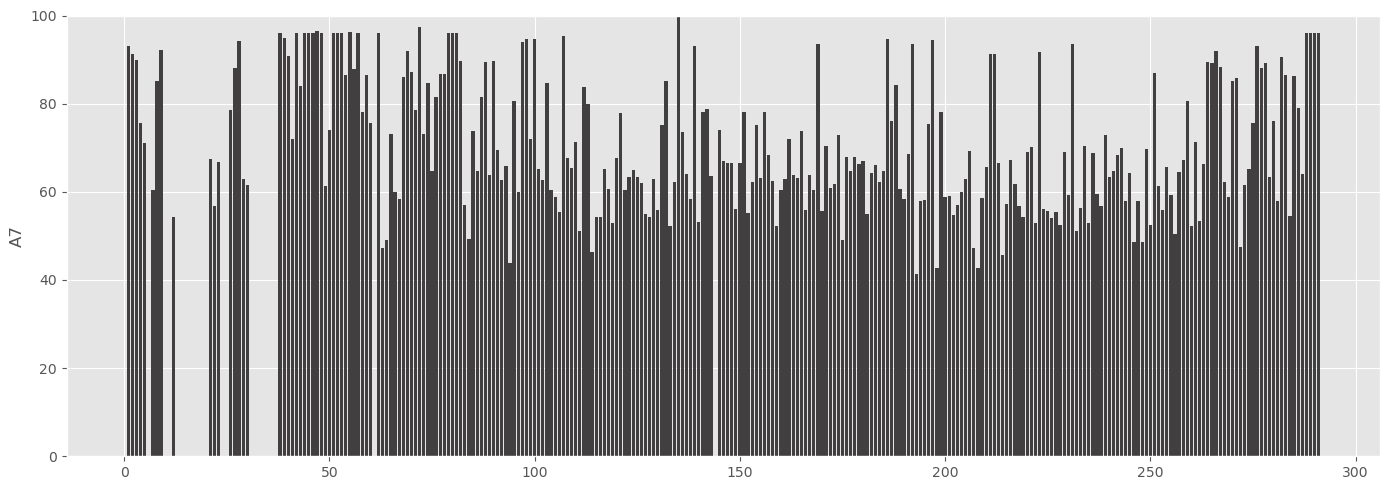

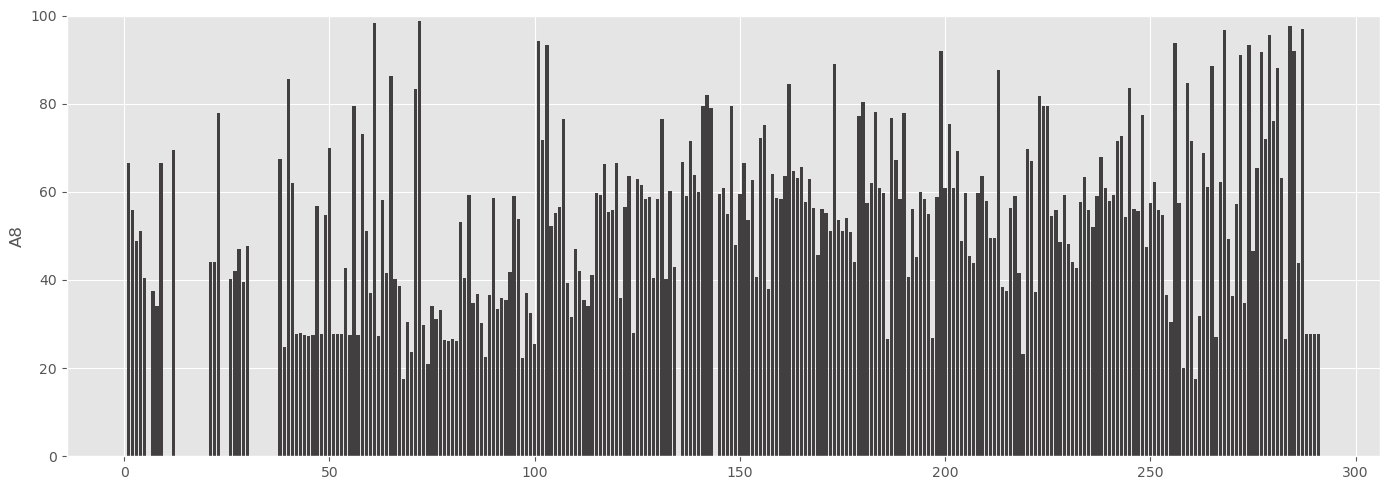

In [171]:
AA8.plot_profile()

# Conservation Laws

In [1]:
AA8.plot_profile()

NameError: name 'AA8' is not defined